In [10]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import torch
import torch.nn as nn	# 各种层类型的实现
import torch.nn.functional as F	# 各中层函数的实现，与层类型对应，如：卷积函数、池化函数、归一化函数等等
import torch.optim as optim	# 实现各种优化算法的包
from torchvision import datasets, transforms
import numpy as np

import argparse
import sys


import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt
from grid_data import GridData

from compute_mpe import CircuitMPE
import sys
sys.path.insert(0,'/root/gurobi903/linux64/lib/python3.6_utf32/gurobipy')
import gurobipy
cmpe = CircuitMPE('/root/PySDD/notebooks/syn200.vtree', '/root/PySDD/notebooks/syn200.sdd')
class para:
    def __init__(self):
        self.batch_size=16
        self.wmc=10
        self.solDim=200
        self.card=10
        self.test_batch_size=1000
        self.epochs=10
        self.lr=0.1
        self.momentum=0.5
        self.no_cuda='store_true'
        self.seed=1
        self.log_interval=10
        self.hidden_dim=10
args=para()
legalList={0: [24, 78], 1: [3, 29, 59, 83, 116], 2: [], 3: [1, 43, 64, 83, 90, 161], 4: [], 5: [], 6: [25, 151], 7: [12, 16, 19, 29, 36, 79, 118, 136, 166], 8: [], 9: [26, 30, 64], 10: [79, 109, 138, 181], 11: [], 12: [7, 17, 29, 31, 36, 79], 13: [197], 14: [], 15: [133, 148], 16: [7, 32], 17: [12, 31, 36, 82, 119], 18: [29, 182], 19: [7, 24, 36, 71, 85, 140, 183], 20: [29], 21: [46, 173, 193], 22: [], 23: [], 24: [0, 19, 30, 64], 25: [6, 54, 151], 26: [9, 40, 59, 64, 111, 145], 27: [69, 106], 28: [115], 29: [1, 7, 12, 18, 20, 43, 59, 83, 116, 136, 182, 185], 30: [9, 24, 156], 31: [12, 17, 164], 32: [16, 40, 64], 33: [94], 34: [], 35: [], 36: [7, 12, 17, 19, 82, 136], 37: [108, 124], 38: [121], 39: [], 40: [26, 32, 146], 41: [96], 42: [177], 43: [3, 29, 48, 83, 104, 128, 136, 182, 185], 44: [180], 45: [131, 137], 46: [21, 148, 178, 193], 47: [], 48: [43, 67, 104, 135], 49: [], 50: [], 51: [], 52: [], 53: [151], 54: [25, 136], 55: [129], 56: [137, 186], 57: [148], 58: [], 59: [1, 26, 29, 120, 185], 60: [143], 61: [], 62: [], 63: [67, 115, 155], 64: [3, 9, 24, 26, 32, 71], 65: [93, 97, 194], 66: [], 67: [48, 63, 135, 155], 68: [126], 69: [27], 70: [], 71: [19, 64, 156, 183], 72: [106, 123, 144, 194], 73: [94, 180, 196], 74: [], 75: [125], 76: [102], 77: [196], 78: [0, 127], 79: [7, 10, 12, 103], 80: [], 81: [125, 140], 82: [17, 36, 106, 112, 129], 83: [1, 3, 29, 43, 108, 116, 151, 182], 84: [89, 92, 157], 85: [19, 147, 195], 86: [117], 87: [111], 88: [158], 89: [84, 166], 90: [3], 91: [95], 92: [84, 149, 157], 93: [65], 94: [33, 73], 95: [91, 155], 96: [41], 97: [65, 100, 112, 123, 195], 98: [], 99: [], 100: [97, 101], 101: [100], 102: [76, 141], 103: [79, 122, 199], 104: [43, 48], 105: [], 106: [27, 72, 82, 123, 157, 188, 194], 107: [171], 108: [37, 83, 117], 109: [10, 181], 110: [146], 111: [26, 87, 130], 112: [82, 97, 145], 113: [145], 114: [], 115: [28, 63], 116: [1, 29, 83, 117], 117: [86, 108, 116], 118: [7, 122, 162, 167, 182], 119: [17, 122, 172], 120: [59], 121: [38, 130], 122: [103, 118, 119, 199], 123: [72, 97, 106, 129, 144, 157, 173, 194], 124: [37, 184, 187], 125: [75, 81, 140, 141, 154], 126: [68], 127: [78], 128: [43], 129: [55, 82, 123, 170, 194], 130: [111, 121], 131: [45], 132: [161], 133: [15, 155], 134: [195], 135: [48, 67, 155], 136: [7, 29, 36, 43, 54, 153], 137: [45, 56, 182], 138: [10], 139: [], 140: [19, 81, 125, 179, 183], 141: [102, 125], 142: [], 143: [60], 144: [72, 123, 194], 145: [26, 112, 113, 155], 146: [40, 110], 147: [85, 195], 148: [15, 46, 57, 188, 193], 149: [92, 157], 150: [189], 151: [6, 25, 53, 83, 159], 152: [], 153: [136, 155, 185], 154: [125, 183], 155: [63, 67, 95, 133, 135, 145, 153, 158, 178], 156: [30, 71], 157: [84, 92, 106, 123, 149], 158: [88, 155], 159: [151], 160: [193], 161: [3, 132], 162: [118, 167], 163: [], 164: [31], 165: [], 166: [7, 89], 167: [118, 162], 168: [], 169: [], 170: [129], 171: [107], 172: [119], 173: [21, 123], 174: [], 175: [], 176: [], 177: [42], 178: [46, 155], 179: [140], 180: [44, 73, 194, 196], 181: [10, 109], 182: [18, 29, 43, 83, 118, 137], 183: [19, 71, 140, 154], 184: [124], 185: [29, 43, 59, 153], 186: [56], 187: [124], 188: [106, 148], 189: [150], 190: [], 191: [], 192: [], 193: [21, 46, 148, 160], 194: [65, 72, 106, 123, 129, 144, 180, 195], 195: [85, 97, 134, 147, 194, 198], 196: [73, 77, 180], 197: [13], 198: [195], 199: [103, 122]}

def checkFea(x):
    cnt=0
    cntT=0
    for i in range(len(legalList.keys())):
        for j in legalList[i]:
            cntT+=1
            if x[j]+x[i]>1:
                cnt+=1
    return cnt/cntT/2+abs(x.sum()-args.card)/args.card/2
def CB(alpha,x,M):
    return alpha*np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(M)),x))
def solver(theta,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(theta), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    MODEL.optimize()
    return np.array(MODEL.x)
def solver_quad(Q,MODEL):

    import gurobipy
    import time
    s=time.time()
    # 创建模型
    variables=[]
    for i in range(args.solDim):
        variables.append(MODEL.addVar(vtype=gurobipy.GRB.BINARY, name='x'+'i'))
    # 更新变量环境
    MODEL.update()

    # 创建目标函数
    MODEL.setObjective(np.array(variables).dot(Q).dot(np.array(variables)), sense=gurobipy.GRB.MAXIMIZE)

    # 创建约束条件
    cnt=0
    for i in range(args.solDim):
        if len(legalList)>0:
            for j in legalList[i]:
                MODEL.addConstr(-variables[i]-variables[j] >= -1, name=str(cnt))
                cnt+=1
    MODEL.addConstr(sum(variables) == args.card, name=str(cnt))
    f=time.time()
    # 执行最优化
    
    print('??')
    MODEL.optimize()
    print('??')
    return np.array(MODEL.x)

In [11]:
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

def inv_sherman_morrison(u, A_inv):
    """Inverse of a matrix with rank 1 update.
    """
    Au = np.dot(A_inv, u)
    A_inv -= np.outer(Au, Au)/(1+np.dot(u.T, Au))
    return A_inv

class Model(nn.Module):
    """Template for fully connected neural network for scalar approximation.
    """
    def __init__(self, 
                 input_size=1, 
                 hidden_size=2,
                 n_layers=4,
                 activation='ReLU',
                 p=0.0,
                ):
        super(Model, self).__init__()
        
        self.n_layers = n_layers
        
        if self.n_layers == 1:
            self.layers = [nn.Linear(input_size, 1)]
        else:
            size  = [input_size] + [hidden_size,] * (self.n_layers-1) + [1]
            self.layers = [nn.Linear(size[i], size[i+1]) for i in range(self.n_layers)]
        self.layers = nn.ModuleList(self.layers)
        
        # dropout layer
        self.dropout = nn.Dropout(p=p)
        
        # activation function
        if activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'ReLU':
            self.activation = nn.ReLU()
        elif activation == 'LeakyReLU':
            self.activation = nn.LeakyReLU(negative_slope=0.1)
        else:
            raise Exception('{} not an available activation'.format(activation))
            
    def forward(self, x):
        for i in range(self.n_layers-1):
            x = self.dropout(self.activation(self.layers[i](x)))
        x = self.layers[-1](x)
        return x


In [12]:
import numpy as np
import abc
from tqdm import tqdm

class UCB(abc.ABC):
    """Base class for UBC methods.
    """
    def __init__(self,
                 bandit,
                 reg_factor=1.0,
                 confidence_scaling_factor=-1.0,
                 delta=0.1,
                 train_every=1,
                 throttle=int(1e2),
                ):
        # bandit object, contains features and generated rewards
        self.bandit = bandit
        # L2 regularization strength
        self.reg_factor = reg_factor
        # Confidence bound with probability 1-delta
        self.delta = delta
        # multiplier for the confidence bound (default is bandit reward noise std dev)
        if confidence_scaling_factor == -1.0:
            confidence_scaling_factor = bandit.noise_std
        self.confidence_scaling_factor = confidence_scaling_factor
        
        # train approximator only every few rounds
        self.train_every = train_every
        self.best_recommended_reward =-200
        self.best_recommended_action =np.array([1]*args.card+[0]*(self.bandit.n_features-args.card))
        self.rewards_list=[]
        self.best_sample_rewards_list=[]
        self.feasi=[]
        # throttle tqdm updates
        self.throttle = throttle
        self.solverSol=None
        self.reset()
        
    def reset_upper_confidence_bounds(self):
        """Initialize upper confidence bounds and related quantities.
        """
        self.exploration_bonus = np.empty((self.bandit.T, self.bandit.n_arms))
        self.mu_hat = np.empty((self.bandit.T, self.bandit.n_arms)) 
        self.meta_mu_hat = np.empty(( self.bandit.n_features)) 
        self.cross_mu_hat = np.empty(( self.bandit.n_features**2)) 
        self.upper_confidence_bounds = np.ones((self.bandit.T, self.bandit.n_arms))
        self.meta_values= np.ones((self.bandit.n_features))
        self.cross_values= np.ones((self.bandit.n_features**2))
        self.knn_metabest=-100
        self.best_rewards_oracle=-100
    def reset_regrets(self):
        """Initialize regrets.
        """
        self.regrets = np.empty(self.bandit.T)

    def reset_actions(self):
        """Initialize cache of actions.
        """
        self.actions = np.empty(self.bandit.T).astype('int')
    
    def reset_A_inv(self):
        """Initialize n_arms square matrices representing the inverses
        of exploration bonus matrices.
        """
        self.A_inv = np.array(
            [
                np.eye(self.approximator_dim)/self.reg_factor for _ in self.bandit.arms
            ]
        )
    def reset_grad_approx(self):
        """Initialize the gradient of the approximator w.r.t its parameters.
        """
        self.grad_approx = np.zeros((self.bandit.n_arms, self.approximator_dim))

    def sample_action(self):
        """Return the action to play based on current estimates
        """
        if self.iteration>=max(self.bandit.n_features*4,200):
            return np.argmax(self.upper_confidence_bounds[self.iteration]).astype('int')
        else:
            return np.random.choice(self.bandit.n_arms)
    @abc.abstractmethod
    def reset(self):
        """Initialize variables of interest.
        To be defined in children classes.
        """
        pass

    @property
    @abc.abstractmethod
    def approximator_dim(self):
        """Number of parameters used in the approximator.
        """
        pass
    
    @property
    @abc.abstractmethod
    def confidence_multiplier(self):
        """Multiplier for the confidence exploration bonus.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def update_confidence_bounds(self):
        """Update the confidence bounds for all arms at time t.
        To be defined in children classes.
        """
        pass

    @abc.abstractmethod
    def update_output_gradient(self):
        """Compute output gradient of the approximator w.r.t its parameters.
        """
        pass
    
    @abc.abstractmethod
    def train(self):
        """Update approximator.
        To be defined in children classes.
        """
        pass
    
    @abc.abstractmethod
    def predict(self):
        """Predict rewards based on an approximator.
        To be defined in children classes.
        """
        pass

    def update_confidence_bounds(self):
        """Update confidence bounds and related quantities for all arms.
        """
        
        if self.iteration>max(self.bandit.n_features*4,200):#self.bandit.n_features:
            self.bandit.features[self.iteration][2]=self.best_recommended_action
            self.bandit.features[self.iteration][0]=self.solverSol
            self.bandit.features[self.iteration][1]=self.solverSol_quad
            for j in range(3,self.bandit.n_arms//3):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//3,self.bandit.n_arms//2):
                tmp=[np.random.beta(min(1-0.1,max(0.1,mm)),1-min(1-0.1,max(0.1,mm))) for mm in self.solverSol_quad]#[self.meta_values[i]+2*np.sqrt(np.log(self.iteration+1)/self.cnt[i]/self.iteration) for i in range(self.bandit.n_features)]
                tmp2=sorted(tmp)[-args.card:] 
                self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            for j in range(n_arms//2,2*self.bandit.n_arms//3):
                tmp=self.bandit.features[self.iteration][j]+np.random.random()*(self.best_recommended_action-self.bandit.features[self.iteration][j])
                if self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][j]).to(self.device)).detach().squeeze()<self.model.forward(torch.FloatTensor(tmp).to(self.device)).detach().squeeze():
                    tmp2=sorted(tmp)[-args.card:] 
                    self.bandit.features[self.iteration][j]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            if np.random.random()>0.4:
                a=np.random.choice(self.bandit.n_arms)
                b=np.random.choice(self.bandit.n_arms)
                if a!=b:
                    if  self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][a]).to(self.device)).detach().squeeze()>self.model.forward(torch.FloatTensor(self.bandit.features[self.iteration][b]).to(self.device)).detach().squeeze():
                        tmp=self.bandit.features[self.iteration][b]+np.random.random()*(a-b)
                        tmp2=sorted(tmp)[-args.card:] 
                        self.bandit.features[self.iteration][b]= np.divide(np.array([1 if tmp[i] in tmp2 else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))

        self.update_output_gradient()
        # UCB exploration bonus
        self.exploration_bonus[self.iteration] = np.array(
            [
                500000*constraint(self.bandit.features[self.iteration][a])+self.confidence_multiplier * np.sqrt(np.dot(self.grad_approx[a], np.dot(self.A_inv[a], self.grad_approx[a].T))) for a in self.bandit.arms
            ]
        ) #500000*constraint(self.bandit.features[self.iteration][a])+
        # update reward prediction mu_hat
        self.predict()
        self.bandit.rewards[self.iteration]=np.array([self.bandit.h(self.bandit.features[self.iteration, k],self.iteration) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])
        self.bandit.rewards2[self.iteration]=np.array([self.bandit.hwithoutconstraints(self.bandit.features[self.iteration, k]) + self.bandit.noise_std*np.random.randn() for k in range(self.bandit.n_arms)])

        # estimated combined bound for reward
        self.meta_values=self.meta_mu_hat# + self.meta_exploration_bonus[self.iteration] 
        if self.iteration>=max(self.bandit.n_features*4,200):
            self.cross_values=self.cross_mu_hat
            for i in range(self.bandit.n_features):
                for j in range(self.bandit.n_features):
                    if i==j:
                        self.cross_values[i*self.bandit.n_features+j]=self.meta_mu_hat[i]
                    else:
                        self.cross_values[i*self.bandit.n_features+j]=(self.cross_mu_hat[i*self.bandit.n_features+j]-self.meta_mu_hat[i]-self.meta_mu_hat[j])/2
            self.cross_values=self.cross_values.reshape(self.bandit.n_features,self.bandit.n_features)
        with gurobipy.Env(empty=True) as env:
            env.setParam('OutputFlag', 0)
            env.setParam('IterationLimit',600)
            env.start()
            with gurobipy.Model(env=env) as m:
                self.solverSol=np.divide(solver(self.meta_values,m),np.sqrt(args.card))
        if self.iteration>=max(self.bandit.n_features*4,200):
            with gurobipy.Env(empty=True) as env:
                env.setParam('OutputFlag', 0)
                env.setParam('IterationLimit',600)
                env.start()
                with gurobipy.Model(env=env) as m:
                    self.solverSol_quad=np.divide(solver_quad(self.cross_values,m),np.sqrt(args.card))
                    print('solverSol_quad',self.bandit.hwithoutconstraints(self.solverSol_quad))
        tmp=sorted(self.meta_values )[-args.card:]   #后面记得加/改一下探索项！！！
        self.meta_values = np.array([1 if self.meta_values[i] in tmp else 0 for i in range(self.bandit.n_features)])
        if len(np.argwhere(self.meta_values==1)):
            metabest=np.argwhere(self.meta_values==1)[:args.card].reshape(args.card)
        else:
            metabest=list(range(self.bandit.n_features))
            np.random.shuffle(metabest)
            metabest=np.array(metabest[:args.card])
        knn_metabest={}
        import copy
        for i in range(10):
            tmp=metabest.copy()
            tmp[np.random.choice(range(args.card))]=np.random.choice(range(self.bandit.n_features))
            tmp=np.divide(np.array([1 if i in tmp else 0 for i in range(self.bandit.n_features)]),np.sqrt(args.card))
            tmpvalue=self.model.forward(
                    torch.FloatTensor(tmp).to(self.device)
                ).detach().squeeze()
            knn_metabest[tmpvalue]=tmp
        
        self.meta_values=np.divide(self.meta_values,np.sqrt(args.card))
        self.upper_confidence_bounds[self.iteration] = self.mu_hat[self.iteration] + self.exploration_bonus[self.iteration]
        self.knn_metabest=knn_metabest[max(knn_metabest.keys())]
        self.bandit.knn_metabestValue =self.bandit.h(self.knn_metabest,self.iteration)
        self.bandit.best_rewards_oracle =max( max(np.max(self.bandit.rewards, axis=1)),self.bandit.knn_metabestValue)
        self.best_rewards_oracle=max(max(self.best_rewards_oracle,self.bandit.best_rewards_oracle),self.bandit.hwithoutconstraints(self.knn_metabest))
        print('----------------',self.best_rewards_oracle,self.bandit.hwithoutconstraints(self.knn_metabest),checkFea(torch.from_numpy(self.knn_metabest)*np.sqrt(args.card)),self.bandit.hwithoutconstraints(self.solverSol),checkFea(np.sqrt(args.card)*torch.from_numpy(self.solverSol)))
    def update_A_inv(self):
        self.A_inv[self.action] = inv_sherman_morrison(
            self.grad_approx[self.action],
            self.A_inv[self.action]
        )
    def run(self):
        """Run an episode of bandit.
        """
        postfix = {
            'total regret': 0.0,
            '% optimal arm': 0.0,
        }
        with tqdm(total=self.bandit.T, postfix=postfix) as pbar:
            for t in range(self.bandit.T):
                # update confidence of all arms based on observed features at time t
                self.update_confidence_bounds()
                # pick action with the highest boosted estimated reward
                self.action = self.sample_action()
                self.actions[t] = self.action
                # update approximator
                if t % self.train_every == 0:
                    self.train()
                # update exploration indicator A_inv
                self.update_A_inv()
                # compute regret
                
                #print(t,self.action,self.bandit.best_rewards_oracle[t],self.bandit.rewards[t, self.action])
                print('hhhhh',self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]),np.sqrt(args.card)*sum(self.bandit.features[self.iteration][self.action]),checkFea(torch.from_numpy(self.bandit.features[self.iteration][self.action])*np.sqrt(args.card)))
                self.regrets[t] = self.best_rewards_oracle-self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                if self.best_recommended_reward<self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration):
                    self.best_recommended_reward=self.bandit.h(self.bandit.features[self.iteration][self.action],self.iteration)
                    self.best_recommended_action=self.bandit.features[self.iteration][self.action]
                self.best_sample_rewards_list.append( self.best_rewards_oracle)
                self.rewards_list.append(self.bandit.hwithoutconstraints(self.bandit.features[self.iteration][self.action]))
                self.feasi.append(checkFea(self.bandit.features[self.iteration][self.action]*np.sqrt(args.card)))
                # increment counter
                self.iteration += 1
                
                # log
                postfix['total regret'] += self.regrets[t]
                n_optimal_arm = np.sum(
                    self.actions[:self.iteration]==self.bandit.best_actions_oracle[:self.iteration]
                )
                postfix['% optimal arm'] = '{:.2%}'.format(n_optimal_arm / self.iteration)
                
                if t % self.throttle == 0:
                    pbar.set_postfix(postfix)
                    pbar.update(self.throttle)


In [13]:
import numpy as np
import itertools


class ContextualBandit():
    def __init__(self,
                 T,
                 n_arms,
                 n_features,
                 h,
                 hwithoutconstraints,
                 noise_std=1.0,
                ):
        # number of rounds
        self.T = T
        # number of arms
        self.n_arms = n_arms
        # number of features for each arm
        self.n_features = n_features
        # average reward function
        # h : R^d -> R
        self.h = h
        self.hwithoutconstraints=hwithoutconstraints
        self.knn_metabestValue=-100
        self.best_rewards_oracle = -100
        # standard deviation of Gaussian reward noise
        self.noise_std = noise_std
        # generate random features
        print('44-------------')
        self.reset()

    @property
    def arms(self):
        """Return [0, ...,n_arms-1]
        """
        return range(self.n_arms)
        
    def reset(self):
        """Generate new features and new rewards.
        """
        print('55-------------')
        self.reset_features()
        print('66-------------')
        self.reset_rewards()
        
    def reset_features(self):
        """Generate normalized random N(0,1) features.
        """
        x1,x2=[],[]
        for i in range(self.T):
            tmp1,tmp2=[],[]
            for j in range(self.n_arms):
                a=np.array([0]*(self.n_features-args.card)+[1]*args.card)
                np.random.shuffle(a)
                a=np.divide(a,np.sqrt(args.card))
                tmp1.append(a)
            for j in range(self.n_features):
                a=np.array([0.0]*j+[1.0]+[0.0]*(self.n_features-j-1))
                tmp2.append(a)
            x1.append(tmp1)
            x2.append(tmp2)
        x1,x2=np.array(x1),np.array(x2)
        #x /= np.repeat(np.linalg.norm(x, axis=-1, ord=2), self.n_features).reshape(self.T, self.n_arms, self.n_features)
        self.features = x1
        self.meta_features=x2
        self.cross_features=[]
        for i in range(self.n_features):
            for j in range(self.n_features):
                tmp=np.zeros(self.n_features)
                tmp[i]=1
                tmp[j]=1
                self.cross_features.append(tmp)
                
    def reset_rewards(self):
        """Generate rewards for each arm and each round,
        following the reward function h + Gaussian noise.
        """
        
        self.rewards = np.random.random([self.T, self.n_arms])
        self.rewards2 = np.random.random([self.T, self.n_arms])
        
        # to be used only to compute regret, NOT by the algorithm itself
        self.best_rewards_oracle =max( max(np.max(self.rewards, axis=1)),self.knn_metabestValue)
        self.best_actions_oracle = np.argmax(self.rewards, axis=1)


In [14]:
import numpy as np
import torch
import torch.nn as nn

class NeuralUCB(UCB):
    """Neural UCB.
    """
    def __init__(self,
                 bandit,
                 hidden_size=20,
                 n_layers=2,
                 reg_factor=1.0,
                 delta=0.01,
                 confidence_scaling_factor=-1.0,
                 training_window=100,
                 p=0.0,
                 learning_rate=0.01,
                 epochs=1,
                 train_every=1,
                 throttle=1,
                 use_cuda=False,
                ):

        # hidden size of the NN layers
        self.hidden_size = hidden_size
        # number of layers
        self.n_layers = n_layers
        
        # number of rewards in the training buffer
        self.training_window = training_window
        
        # NN parameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        self.use_cuda = use_cuda
        if self.use_cuda:
            raise Exception(
                'Not yet CUDA compatible : TODO for later (not necessary to obtain good results')
        self.device = torch.device('cuda' if torch.cuda.is_available() and self.use_cuda else 'cpu')
    
        # dropout rate
        self.p = p

        # neural network
        self.model = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.model2 = Model(input_size=bandit.n_features, 
                           hidden_size=self.hidden_size,
                           n_layers=self.n_layers,
                           p=self.p
                          ).to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.optimizer2 = torch.optim.Adam(self.model2.parameters(), lr=self.learning_rate)

        super().__init__(bandit, 
                         reg_factor=reg_factor,
                         confidence_scaling_factor=confidence_scaling_factor,
                         delta=delta,
                         throttle=throttle,
                         train_every=train_every,
                        )

    @property
    def approximator_dim(self):
        """Sum of the dimensions of all trainable layers in the network.
        """
        return sum(w.numel() for w in self.model.parameters() if w.requires_grad)
    
    @property
    def confidence_multiplier(self):
        """Constant equal to confidence_scaling_factor
        """
        return self.confidence_scaling_factor
    
    def update_output_gradient(self):
        """Get gradient of network prediction w.r.t network weights.
        """
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
            
            self.grad_approx[a] = torch.cat(
                [w.grad.detach().flatten() / np.sqrt(self.hidden_size) for w in self.model.parameters() if w.requires_grad]
            ).to(self.device)
        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model.zero_grad()
            y = self.model(x)
            y.backward()
        for a in self.bandit.arms:
            x = torch.FloatTensor(
                self.bandit.features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()

        for a in range(self.bandit.n_features):
            x = torch.FloatTensor(
                self.bandit.meta_features[self.iteration, a].reshape(1,-1)
            ).to(self.device)
            
            self.model2.zero_grad()
            y = self.model2(x)
            y.backward()
            
    def reset(self):
        """Reset the internal estimates.
        """
        self.reset_upper_confidence_bounds()
        self.reset_regrets()
        self.reset_actions()
        self.reset_A_inv()
        self.reset_grad_approx()
        self.iteration = 0

    def train(self):
        """Train neural approximator.
        """
        iterations_so_far = range(np.max([0, self.iteration-self.training_window]), self.iteration+1)
        actions_so_far = self.actions[np.max([0, self.iteration-self.training_window]):self.iteration+1]

        x_train = torch.FloatTensor(self.bandit.features[iterations_so_far, actions_so_far]).to(self.device)
        y_train = torch.FloatTensor(self.bandit.rewards[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        y_train2 = torch.FloatTensor(self.bandit.rewards2[iterations_so_far, actions_so_far]).squeeze().to(self.device)
        
        # train mode
        self.model.train()
        for _ in range(self.epochs):
            y_pred = self.model.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        self.model2.train()
        for _ in range(self.epochs):
            y_pred = self.model2.forward(x_train).squeeze()
            loss = nn.MSELoss()(y_train2, y_pred)
            self.optimizer2.zero_grad()
            loss.backward()
            self.optimizer2.step()
        
        
    def predict(self):
        """Predict reward.
        """
        # eval mode
        self.model.eval()
        self.mu_hat[self.iteration] = self.model.forward(
            torch.FloatTensor(self.bandit.features[self.iteration]).to(self.device)
        ).detach().squeeze()
        self.meta_mu_hat = self.model2.forward(
            torch.FloatTensor(self.bandit.meta_features[self.iteration]).to(self.device)
        ).detach().squeeze()
        if self.iteration>=max(self.bandit.n_features*4,200):
            self.cross_mu_hat= self.model2.forward(
                torch.FloatTensor(self.bandit.cross_features).to(self.device)
            ).detach().squeeze()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [16]:
T = int(12e2)
n_arms =5
n_features = 200
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 1

p = 0.2
hidden_size = 4#16
epochs = 100#100
train_every = 10#10
confidence_scaling_factor = 1.0
use_cuda = False

In [25]:
### mean reward function

a = np.random.random(200) #  np.load('rateListUsersYahoo.npy')[0]
a /= np.linalg.norm(a, ord=2)
Q=np.random.random([200,200]) #np.load('Q.npy')#Q=np.random.random([n_features,n_features])+100*np.diag(np.ones(n_features))
#h = lambda x:   100*a.dot(Q).dot(a)   #min(100*(np.dot(a, x)**(5)),10000)
#100*a.dot(Q).dot(a)
def h(x,iteration):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*(1/(1+np.exp(-iteration))-0.5)*torch.log(torch.mean(wmc)).float()+100*(x.dot(a))**1
def constraint(x):
    yu=torch.unbind(torch.from_numpy(x))
    xu = torch.unbind(torch.from_numpy(np.array([0.02]*n_features).astype(np.float32)))
    wmc = cmpe.get_torch_ac([[1.0 - ny,ny] for ny in yu + xu]) 
    return  50000*torch.log(torch.mean(wmc)).float()
hwithoutconstraints = lambda x:100*(x.dot(a))**1    #100*(x.dot(a))**3  、100*x.dot(Q).dot(x)

In [36]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action=solver(a,m)
hwithoutconstraints(action)/(np.sqrt(args.card))**1

35.62970424514912

In [27]:
with gurobipy.Env(empty=True) as env:
        env.setParam('OutputFlag', 0)
        env.setParam('IterationLimit',600)
        env.start()
        with gurobipy.Model(env=env) as m:
            action2=solver_quad(Q,m)
hwithoutconstraints(action2)/10

??
??


6.176475530444744

In [28]:
bandit = ContextualBandit(T, n_arms, n_features, h,hwithoutconstraints, noise_std=noise_std)

regrets = np.empty((n_sim, T))

for i in range(n_sim):
    bandit.reset_rewards()
    model = NeuralUCB(bandit,
                      hidden_size=hidden_size,
                      reg_factor=1.0,
                      delta=0.1,
                      confidence_scaling_factor=confidence_scaling_factor,
                      training_window=100,
                      p=p,
                      learning_rate=0.01,
                      epochs=epochs,
                      train_every=train_every,
                      use_cuda=use_cuda
                     )
        
    model.run()
    regrets[i] = np.cumsum(model.regrets)

44-------------
55-------------


  0%|          | 0/1200 [00:00<?, ?it/s, % optimal arm=0, total regret=0]

66-------------
---------------- 22.478591918945312 19.943771088370724 tensor(0.0022, dtype=torch.float64) 19.278282548498797 tensor(0., dtype=torch.float64)
hhhhh 21.036514351373054 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  0%|          | 1/1200 [00:02<57:19,  2.87s/it, total regret=1.44, % optimal arm=100.00%]

---------------- 24.91702463043755 24.91702463043755 tensor(0.0022, dtype=torch.float64) 22.352446809555644 tensor(0., dtype=torch.float64)
hhhhh 18.794733798485826 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 2/1200 [00:05<53:05,  2.66s/it, total regret=7.56, % optimal arm=50.00%] 

---------------- 24.91702463043755 19.78287036141306 tensor(0.0022, dtype=torch.float64) 17.943206589566657 tensor(0., dtype=torch.float64)
hhhhh 19.99456521034102 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 3/1200 [00:07<50:17,  2.52s/it, total regret=12.5, % optimal arm=33.33%]

---------------- 24.91702463043755 22.62558543983214 tensor(0.0022, dtype=torch.float64) 20.66542215823696 tensor(0., dtype=torch.float64)
hhhhh 23.751483371286408 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  0%|          | 4/1200 [00:09<47:09,  2.37s/it, total regret=4.78e+3, % optimal arm=25.00%]

---------------- 24.91702463043755 16.83379941087391 tensor(0., dtype=torch.float64) 17.487662539119185 tensor(0., dtype=torch.float64)
hhhhh 23.820920618740892 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 5/1200 [00:11<47:37,  2.39s/it, total regret=4.78e+3, % optimal arm=20.00%]

---------------- 24.91702463043755 19.39653949101805 tensor(0., dtype=torch.float64) 20.442795902593563 tensor(0., dtype=torch.float64)
hhhhh 19.923294493671612 10.000000000000002 tensor(0., dtype=torch.float64)


  0%|          | 6/1200 [00:13<46:20,  2.33s/it, total regret=4.79e+3, % optimal arm=16.67%]

---------------- 24.91702463043755 16.56039120575013 tensor(0.0022, dtype=torch.float64) 18.415030174388868 tensor(0., dtype=torch.float64)
hhhhh 15.032628559907014 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|          | 7/1200 [00:17<53:06,  2.67s/it, total regret=7.42e+3, % optimal arm=14.29%]

---------------- 24.91702463043755 24.352285686140856 tensor(0.0022, dtype=torch.float64) 22.394235864962823 tensor(0., dtype=torch.float64)
hhhhh 18.726583535058918 10.000000000000002 tensor(0.0067, dtype=torch.float64)


  1%|          | 8/1200 [00:20<57:26,  2.89s/it, total regret=1.53e+4, % optimal arm=12.50%]

---------------- 25.975797352947694 25.975797352947694 tensor(0.0022, dtype=torch.float64) 23.806553583633136 tensor(0., dtype=torch.float64)
hhhhh 21.37953731251974 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 9/1200 [00:23<55:27,  2.79s/it, total regret=1.53e+4, % optimal arm=22.22%]

---------------- 25.975797352947694 22.953814270354968 tensor(0., dtype=torch.float64) 22.67682482336177 tensor(0., dtype=torch.float64)
hhhhh 20.82380917678763 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 10/1200 [00:25<53:29,  2.70s/it, total regret=1.53e+4, % optimal arm=20.00%]

---------------- 25.975797352947694 19.803467548909175 tensor(0., dtype=torch.float64) 19.821608581155804 tensor(0., dtype=torch.float64)
hhhhh 20.601674948864762 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|          | 11/1200 [00:28<51:37,  2.61s/it, total regret=1.8e+4, % optimal arm=18.18%] 

---------------- tensor(27.8766) 27.87659958475308 tensor(0., dtype=torch.float64) 28.856484037711056 tensor(0., dtype=torch.float64)
hhhhh 17.762973150965305 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 12/1200 [00:30<51:15,  2.59s/it, total regret=1.8e+4, % optimal arm=25.00%]

---------------- tensor(27.8766) 18.430347944723756 tensor(0., dtype=torch.float64) 20.21447538355957 tensor(0., dtype=torch.float64)
hhhhh 16.84329183336237 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 13/1200 [00:33<49:26,  2.50s/it, total regret=1.8e+4, % optimal arm=23.08%]

---------------- tensor(27.8766) 21.743608846786085 tensor(0., dtype=torch.float64) 22.911743776847292 tensor(0., dtype=torch.float64)
hhhhh 16.67768717892269 10.000000000000002 tensor(0., dtype=torch.float64)


  1%|          | 14/1200 [00:35<48:03,  2.43s/it, total regret=1.8e+4, % optimal arm=21.43%]

---------------- tensor(27.8766) 24.434510976389575 tensor(0., dtype=torch.float64) 25.045270337117547 tensor(0., dtype=torch.float64)
hhhhh 17.53607148613382 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|▏         | 15/1200 [00:37<46:48,  2.37s/it, total regret=2.06e+4, % optimal arm=20.00%]

---------------- tensor(27.8766) 23.831731480059375 tensor(0.0022, dtype=torch.float64) 24.18837643225431 tensor(0., dtype=torch.float64)
hhhhh 18.148211148517795 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|▏         | 16/1200 [00:39<44:56,  2.28s/it, total regret=2.33e+4, % optimal arm=25.00%]

---------------- tensor(27.8766) 20.830511160226404 tensor(0., dtype=torch.float64) 22.741726475158178 tensor(0., dtype=torch.float64)
hhhhh 23.732459236729767 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  1%|▏         | 17/1200 [00:41<44:44,  2.27s/it, total regret=2.59e+4, % optimal arm=23.53%]

---------------- tensor(27.8766) 23.667221795072575 tensor(0., dtype=torch.float64) 21.826355076437867 tensor(0., dtype=torch.float64)
hhhhh 14.926451759093027 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 18/1200 [00:44<45:54,  2.33s/it, total regret=2.59e+4, % optimal arm=27.78%]

---------------- tensor(27.8766) 27.10789786740054 tensor(0., dtype=torch.float64) 27.22539703318073 tensor(0., dtype=torch.float64)
hhhhh 16.894694801672294 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 19/1200 [00:46<45:17,  2.30s/it, total regret=2.59e+4, % optimal arm=26.32%]

---------------- tensor(27.8766) 24.080406453256696 tensor(0., dtype=torch.float64) 24.775523980580022 tensor(0., dtype=torch.float64)
hhhhh 13.15968560127177 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 20/1200 [00:48<45:21,  2.31s/it, total regret=2.6e+4, % optimal arm=30.00%] 

---------------- tensor(27.8766) 20.85150964478589 tensor(0.0022, dtype=torch.float64) 21.530858012961783 tensor(0., dtype=torch.float64)
hhhhh 18.785659815049563 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 21/1200 [00:51<47:12,  2.40s/it, total regret=2.86e+4, % optimal arm=33.33%]

---------------- tensor(27.8766) 19.248955254220952 tensor(0.0022, dtype=torch.float64) 21.133458249643404 tensor(0., dtype=torch.float64)
hhhhh 19.288161425020682 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 22/1200 [00:53<46:36,  2.37s/it, total regret=2.86e+4, % optimal arm=31.82%]

---------------- tensor(27.8766) 21.33064310833316 tensor(0.0044, dtype=torch.float64) 21.7689200655312 tensor(0., dtype=torch.float64)
hhhhh 20.636714027612037 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 23/1200 [00:55<44:46,  2.28s/it, total regret=3.13e+4, % optimal arm=30.43%]

---------------- tensor(27.8766) 19.580683945459004 tensor(0., dtype=torch.float64) 20.924579683822373 tensor(0., dtype=torch.float64)
hhhhh 21.42744722141345 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 24/1200 [00:58<44:05,  2.25s/it, total regret=3.13e+4, % optimal arm=29.17%]

---------------- tensor(27.8766) 22.326374006488976 tensor(0.0022, dtype=torch.float64) 24.275874631210936 tensor(0., dtype=torch.float64)
hhhhh 22.225788835348055 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 25/1200 [01:00<44:20,  2.26s/it, total regret=3.13e+4, % optimal arm=28.00%]

---------------- tensor(27.8766) 23.644749221352395 tensor(0.0022, dtype=torch.float64) 27.218985743741243 tensor(0., dtype=torch.float64)
hhhhh 17.22750739855626 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▏         | 26/1200 [01:02<44:55,  2.30s/it, total regret=3.13e+4, % optimal arm=30.77%]

---------------- tensor(27.8766) 15.961091632632174 tensor(0., dtype=torch.float64) 17.700857039688493 tensor(0., dtype=torch.float64)
hhhhh 21.43889659274268 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  2%|▏         | 27/1200 [01:04<43:19,  2.22s/it, total regret=3.65e+4, % optimal arm=29.63%]

---------------- tensor(27.8766) 24.269879378934405 tensor(0., dtype=torch.float64) 24.032665018791963 tensor(0., dtype=torch.float64)
hhhhh 21.680028667719963 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 28/1200 [01:06<43:12,  2.21s/it, total regret=3.92e+4, % optimal arm=32.14%]

---------------- tensor(27.8766) 21.709276822639406 tensor(0.0022, dtype=torch.float64) 24.306010672965257 tensor(0., dtype=torch.float64)
hhhhh 11.341316163435708 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  2%|▏         | 29/1200 [01:09<46:14,  2.37s/it, total regret=4.18e+4, % optimal arm=31.03%]

---------------- tensor(27.8766) 24.583168521821555 tensor(0.0067, dtype=torch.float64) 22.77367773083378 tensor(0., dtype=torch.float64)
hhhhh 18.620912232952648 10.000000000000002 tensor(0., dtype=torch.float64)


  2%|▎         | 30/1200 [01:12<47:22,  2.43s/it, total regret=4.18e+4, % optimal arm=30.00%]

---------------- tensor(27.8766) 20.33564662093051 tensor(0., dtype=torch.float64) 19.40166922370042 tensor(0., dtype=torch.float64)
hhhhh 17.37924651637314 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 31/1200 [01:14<48:23,  2.48s/it, total regret=4.19e+4, % optimal arm=29.03%]

---------------- tensor(27.8766) 25.878927392663005 tensor(0.0022, dtype=torch.float64) 24.62991596598619 tensor(0., dtype=torch.float64)
hhhhh 17.753905247890458 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 32/1200 [01:16<45:23,  2.33s/it, total regret=4.19e+4, % optimal arm=28.12%]

---------------- tensor(27.8766) 24.140896879453916 tensor(0., dtype=torch.float64) 25.49935748747645 tensor(0., dtype=torch.float64)
hhhhh 15.55771458157189 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 33/1200 [01:19<44:46,  2.30s/it, total regret=4.19e+4, % optimal arm=27.27%]

---------------- tensor(27.8766) 26.15899650377194 tensor(0., dtype=torch.float64) 23.57126977223512 tensor(0., dtype=torch.float64)
hhhhh 21.063658893657884 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 34/1200 [01:21<45:20,  2.33s/it, total regret=4.45e+4, % optimal arm=26.47%]

---------------- tensor(28.9729) 28.972918160419027 tensor(0., dtype=torch.float64) 28.955627779898474 tensor(0., dtype=torch.float64)
hhhhh 19.781110897116243 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 35/1200 [01:23<45:20,  2.33s/it, total regret=4.45e+4, % optimal arm=25.71%]

---------------- tensor(28.9729) 26.60387938976443 tensor(0., dtype=torch.float64) 27.814523436610816 tensor(0., dtype=torch.float64)
hhhhh 22.43138163296341 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 36/1200 [01:26<46:43,  2.41s/it, total regret=4.45e+4, % optimal arm=27.78%]

---------------- tensor(28.9729) 23.164454313732836 tensor(0.0022, dtype=torch.float64) 26.44300467633922 tensor(0., dtype=torch.float64)
hhhhh 21.44503669042814 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 37/1200 [01:28<46:06,  2.38s/it, total regret=4.72e+4, % optimal arm=27.03%]

---------------- tensor(28.9729) 24.154854608975253 tensor(0., dtype=torch.float64) 24.212213179664897 tensor(0., dtype=torch.float64)
hhhhh 21.78312638156973 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 38/1200 [01:31<46:54,  2.42s/it, total regret=4.98e+4, % optimal arm=26.32%]

---------------- tensor(28.9729) 26.474810975018237 tensor(0., dtype=torch.float64) 23.625194616602055 tensor(0., dtype=torch.float64)
hhhhh 17.63759371238825 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 39/1200 [01:33<46:12,  2.39s/it, total regret=5.25e+4, % optimal arm=28.21%]

---------------- tensor(28.9729) 21.363084497898 tensor(0.0022, dtype=torch.float64) 25.37166847669755 tensor(0., dtype=torch.float64)
hhhhh 14.58234461751618 10.000000000000002 tensor(0., dtype=torch.float64)


  3%|▎         | 40/1200 [01:36<47:14,  2.44s/it, total regret=5.25e+4, % optimal arm=30.00%]

---------------- tensor(28.9729) 25.326037959177278 tensor(0., dtype=torch.float64) 22.8798296256075 tensor(0., dtype=torch.float64)
hhhhh 16.507070708163333 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  3%|▎         | 41/1200 [01:38<48:18,  2.50s/it, total regret=5.51e+4, % optimal arm=29.27%]

---------------- tensor(28.9729) 24.668624508679997 tensor(0.0089, dtype=torch.float64) 24.137180616096778 tensor(0., dtype=torch.float64)
hhhhh 20.84937938328583 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▎         | 42/1200 [01:41<47:00,  2.44s/it, total regret=5.51e+4, % optimal arm=28.57%]

---------------- tensor(28.9729) 23.580375640587484 tensor(0.0044, dtype=torch.float64) 26.390643777053523 tensor(0., dtype=torch.float64)
hhhhh 20.142823439626568 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  4%|▎         | 43/1200 [01:43<47:02,  2.44s/it, total regret=5.98e+4, % optimal arm=27.91%]

---------------- tensor(28.9729) 21.27059283680488 tensor(0.0022, dtype=torch.float64) 22.101113109172815 tensor(0., dtype=torch.float64)
hhhhh 24.585199289782544 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  4%|▎         | 44/1200 [01:45<44:37,  2.32s/it, total regret=6.24e+4, % optimal arm=27.27%]

---------------- tensor(28.9729) 21.57247886150197 tensor(0.0044, dtype=torch.float64) 24.358380076781852 tensor(0., dtype=torch.float64)
hhhhh 21.180624041917262 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  4%|▍         | 45/1200 [01:47<45:24,  2.36s/it, total regret=6.77e+4, % optimal arm=26.67%]

---------------- tensor(28.9729) 25.218090303912255 tensor(0.0089, dtype=torch.float64) 25.635888570503724 tensor(0., dtype=torch.float64)
hhhhh 25.021549179030977 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 46/1200 [01:50<45:36,  2.37s/it, total regret=6.77e+4, % optimal arm=26.09%]

---------------- tensor(28.9729) 24.89678508466241 tensor(0., dtype=torch.float64) 26.280767066649535 tensor(0., dtype=torch.float64)
hhhhh 20.169114174619455 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 47/1200 [01:52<45:13,  2.35s/it, total regret=6.77e+4, % optimal arm=25.53%]

---------------- tensor(28.9729) 22.915967935621776 tensor(0., dtype=torch.float64) 24.195833752844496 tensor(0., dtype=torch.float64)
hhhhh 23.556354034848653 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  4%|▍         | 48/1200 [01:55<45:07,  2.35s/it, total regret=7.03e+4, % optimal arm=25.00%]

---------------- tensor(28.9729) 28.916976238054858 tensor(0., dtype=torch.float64) 28.98490864139126 tensor(0., dtype=torch.float64)
hhhhh 16.047655042647644 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 49/1200 [01:57<45:21,  2.36s/it, total regret=7.03e+4, % optimal arm=24.49%]

---------------- tensor(28.9729) 26.751247119242294 tensor(0.0022, dtype=torch.float64) 26.993887963574238 tensor(0., dtype=torch.float64)
hhhhh 17.01725662200346 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 50/1200 [01:59<45:52,  2.39s/it, total regret=7.03e+4, % optimal arm=24.00%]

---------------- tensor(28.9729) 28.546898885090194 tensor(0.0044, dtype=torch.float64) 27.332614192128947 tensor(0., dtype=torch.float64)
hhhhh 21.767438498175498 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 51/1200 [02:02<47:11,  2.46s/it, total regret=7.04e+4, % optimal arm=23.53%]

---------------- tensor(28.9729) 28.83279842259373 tensor(0., dtype=torch.float64) 28.154962369094143 tensor(0., dtype=torch.float64)
hhhhh 22.398678338102187 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 52/1200 [02:05<48:01,  2.51s/it, total regret=7.04e+4, % optimal arm=23.08%]

---------------- tensor(28.9729) 25.693919275741354 tensor(0.0022, dtype=torch.float64) 25.132213937594027 tensor(0., dtype=torch.float64)
hhhhh 24.67364996133468 10.000000000000002 tensor(0., dtype=torch.float64)


  4%|▍         | 53/1200 [02:07<45:29,  2.38s/it, total regret=7.04e+4, % optimal arm=22.64%]

---------------- tensor(29.2983) 29.298332140439193 tensor(0., dtype=torch.float64) 30.204632875692937 tensor(0., dtype=torch.float64)
hhhhh 12.907987860018865 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  4%|▍         | 54/1200 [02:09<45:13,  2.37s/it, total regret=7.3e+4, % optimal arm=22.22%] 

---------------- tensor(29.2983) 27.622101139615257 tensor(0., dtype=torch.float64) 25.427752091838535 tensor(0., dtype=torch.float64)
hhhhh 21.22926654965128 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  5%|▍         | 55/1200 [02:12<45:59,  2.41s/it, total regret=7.57e+4, % optimal arm=21.82%]

---------------- tensor(30.9233) 30.923331532939415 tensor(0., dtype=torch.float64) 29.5234762091762 tensor(0., dtype=torch.float64)
hhhhh 20.563951283260977 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 56/1200 [02:15<52:24,  2.75s/it, total regret=7.57e+4, % optimal arm=21.43%]

---------------- tensor(30.9233) 30.249494976904117 tensor(0.0022, dtype=torch.float64) 27.614612538412576 tensor(0., dtype=torch.float64)
hhhhh 19.266421522991223 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 57/1200 [02:18<55:51,  2.93s/it, total regret=7.57e+4, % optimal arm=22.81%]

---------------- tensor(30.9233) 29.505188069895112 tensor(0.0022, dtype=torch.float64) 27.0879297628213 tensor(0., dtype=torch.float64)
hhhhh 18.298343028311102 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 58/1200 [02:21<54:06,  2.84s/it, total regret=7.57e+4, % optimal arm=22.41%]

---------------- tensor(30.9233) 25.66780897434569 tensor(0.0022, dtype=torch.float64) 28.96599477193552 tensor(0., dtype=torch.float64)
hhhhh 24.539833773080304 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▍         | 59/1200 [02:23<50:33,  2.66s/it, total regret=7.57e+4, % optimal arm=22.03%]

---------------- tensor(31.4654) 31.465435491308096 tensor(0., dtype=torch.float64) 31.720195786746388 tensor(0., dtype=torch.float64)
hhhhh 22.303651871407748 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 60/1200 [02:25<47:36,  2.51s/it, total regret=7.57e+4, % optimal arm=23.33%]

---------------- tensor(31.4654) 26.958413942925972 tensor(0., dtype=torch.float64) 26.612179161432074 tensor(0., dtype=torch.float64)
hhhhh 23.73439010106242 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 61/1200 [02:28<49:36,  2.61s/it, total regret=7.57e+4, % optimal arm=24.59%]

---------------- tensor(31.4654) 28.263768785777227 tensor(0., dtype=torch.float64) 29.326388001321714 tensor(0., dtype=torch.float64)
hhhhh 18.689921451427946 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 62/1200 [02:31<50:35,  2.67s/it, total regret=7.57e+4, % optimal arm=24.19%]

---------------- tensor(31.4654) 30.57764066348856 tensor(0., dtype=torch.float64) 31.871035051828656 tensor(0., dtype=torch.float64)
hhhhh 12.601956795869986 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  5%|▌         | 63/1200 [02:34<54:40,  2.89s/it, total regret=7.84e+4, % optimal arm=23.81%]

---------------- tensor(31.4654) 26.983254710328058 tensor(0., dtype=torch.float64) 29.712059182880157 tensor(0., dtype=torch.float64)
hhhhh 22.323392408991243 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 64/1200 [02:37<55:03,  2.91s/it, total regret=7.84e+4, % optimal arm=25.00%]

---------------- tensor(31.4654) 30.446128214222462 tensor(0., dtype=torch.float64) 30.271149369541067 tensor(0., dtype=torch.float64)
hhhhh 23.370363694210596 10.000000000000002 tensor(0., dtype=torch.float64)


  5%|▌         | 65/1200 [02:40<50:26,  2.67s/it, total regret=7.84e+4, % optimal arm=24.62%]

---------------- tensor(31.4654) 29.230629776645095 tensor(0.0022, dtype=torch.float64) 29.71943542677269 tensor(0., dtype=torch.float64)
hhhhh 22.755556269953612 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 66/1200 [02:42<47:26,  2.51s/it, total regret=7.84e+4, % optimal arm=24.24%]

---------------- tensor(31.4654) 30.486952246168148 tensor(0., dtype=torch.float64) 29.063325714585346 tensor(0., dtype=torch.float64)
hhhhh 26.141558799245118 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▌         | 67/1200 [02:44<47:20,  2.51s/it, total regret=8.1e+4, % optimal arm=23.88%] 

---------------- tensor(31.6696) 31.66959040922221 tensor(0., dtype=torch.float64) 31.360439396315865 tensor(0., dtype=torch.float64)
hhhhh 19.267845786768387 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▌         | 68/1200 [02:47<46:18,  2.45s/it, total regret=8.37e+4, % optimal arm=23.53%]

---------------- tensor(31.6696) 29.138480730444527 tensor(0., dtype=torch.float64) 29.13082140234595 tensor(0., dtype=torch.float64)
hhhhh 16.106296538643676 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 69/1200 [02:49<45:20,  2.41s/it, total regret=8.37e+4, % optimal arm=23.19%]

---------------- tensor(31.6696) 30.849354744894946 tensor(0.0022, dtype=torch.float64) 30.805075700897294 tensor(0., dtype=torch.float64)
hhhhh 21.354637094948256 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▌         | 70/1200 [02:51<44:52,  2.38s/it, total regret=8.64e+4, % optimal arm=24.29%]

---------------- tensor(31.6696) 29.09089086956244 tensor(0.0022, dtype=torch.float64) 29.818666771458417 tensor(0., dtype=torch.float64)
hhhhh 15.212995914835231 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▌         | 71/1200 [02:54<46:33,  2.47s/it, total regret=8.9e+4, % optimal arm=23.94%] 

---------------- tensor(31.6696) 30.59562244555824 tensor(0., dtype=torch.float64) 30.260779131909736 tensor(0., dtype=torch.float64)
hhhhh 18.582085904672045 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▌         | 72/1200 [02:56<44:00,  2.34s/it, total regret=9.16e+4, % optimal arm=23.61%]

---------------- tensor(31.6696) 30.388927093427743 tensor(0., dtype=torch.float64) 29.603528469936887 tensor(0., dtype=torch.float64)
hhhhh 21.08310066461341 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 73/1200 [02:58<43:35,  2.32s/it, total regret=9.17e+4, % optimal arm=23.29%]

---------------- tensor(31.6696) 29.88340164479439 tensor(0., dtype=torch.float64) 29.199076430724 tensor(0., dtype=torch.float64)
hhhhh 24.018645475888555 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▌         | 74/1200 [03:00<42:32,  2.27s/it, total regret=9.17e+4, % optimal arm=22.97%]

---------------- tensor(31.6696) 24.332835025758637 tensor(0., dtype=torch.float64) 26.10108912281835 tensor(0., dtype=torch.float64)
hhhhh 13.615798420998775 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▋         | 75/1200 [03:03<42:36,  2.27s/it, total regret=9.17e+4, % optimal arm=22.67%]

---------------- tensor(31.6696) 27.017011186097896 tensor(0., dtype=torch.float64) 27.017011186097896 tensor(0., dtype=torch.float64)
hhhhh 25.216871747200877 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▋         | 76/1200 [03:05<41:59,  2.24s/it, total regret=9.43e+4, % optimal arm=23.68%]

---------------- tensor(31.6696) 26.62899725005678 tensor(0.0022, dtype=torch.float64) 27.478533515170323 tensor(0., dtype=torch.float64)
hhhhh 16.643954909571537 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  6%|▋         | 77/1200 [03:07<43:15,  2.31s/it, total regret=9.7e+4, % optimal arm=23.38%] 

---------------- tensor(31.6696) 30.047282818771322 tensor(0., dtype=torch.float64) 31.425434388383195 tensor(0., dtype=torch.float64)
hhhhh 20.549967975850823 10.000000000000002 tensor(0., dtype=torch.float64)


  6%|▋         | 78/1200 [03:09<42:02,  2.25s/it, total regret=9.7e+4, % optimal arm=23.08%]

---------------- tensor(31.6696) 27.503428817264226 tensor(0., dtype=torch.float64) 28.567813330324203 tensor(0., dtype=torch.float64)
hhhhh 22.142817352027585 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 79/1200 [03:12<41:56,  2.25s/it, total regret=9.7e+4, % optimal arm=22.78%]

---------------- tensor(31.6696) 28.836678718000208 tensor(0., dtype=torch.float64) 29.08113488902093 tensor(0., dtype=torch.float64)
hhhhh 22.110150579542033 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 80/1200 [03:14<42:18,  2.27s/it, total regret=9.7e+4, % optimal arm=22.50%]

---------------- tensor(31.6696) 27.268741652035782 tensor(0., dtype=torch.float64) 27.649247381324116 tensor(0., dtype=torch.float64)
hhhhh 17.377841021753664 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  7%|▋         | 81/1200 [03:16<44:14,  2.37s/it, total regret=9.97e+4, % optimal arm=22.22%]

---------------- tensor(31.6696) 29.45426529906861 tensor(0.0022, dtype=torch.float64) 29.695549553211947 tensor(0., dtype=torch.float64)
hhhhh 22.863613881670698 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 82/1200 [03:19<43:29,  2.33s/it, total regret=9.97e+4, % optimal arm=21.95%]

---------------- tensor(31.6696) 28.260534186411334 tensor(0., dtype=torch.float64) 28.3883455626746 tensor(0., dtype=torch.float64)
hhhhh 27.05678712565774 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 83/1200 [03:21<44:34,  2.39s/it, total regret=9.97e+4, % optimal arm=21.69%]

---------------- tensor(31.6696) 30.31828270501955 tensor(0., dtype=torch.float64) 28.230330211514126 tensor(0., dtype=torch.float64)
hhhhh 22.857809093164178 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  7%|▋         | 84/1200 [03:24<44:04,  2.37s/it, total regret=1.02e+5, % optimal arm=21.43%]

---------------- tensor(31.6696) 27.51669242284724 tensor(0.0022, dtype=torch.float64) 27.786703989427323 tensor(0., dtype=torch.float64)
hhhhh 19.959665604935154 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  7%|▋         | 85/1200 [03:26<42:50,  2.30s/it, total regret=1.08e+5, % optimal arm=21.18%]

---------------- tensor(31.6696) 27.9539840096971 tensor(0.0022, dtype=torch.float64) 28.39901208279489 tensor(0., dtype=torch.float64)
hhhhh 15.677095861759982 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  7%|▋         | 86/1200 [03:28<42:11,  2.27s/it, total regret=1.1e+5, % optimal arm=20.93%] 

---------------- tensor(31.6696) 30.431893771410113 tensor(0., dtype=torch.float64) 29.559374156820716 tensor(0., dtype=torch.float64)
hhhhh 24.808061760929085 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 87/1200 [03:30<43:00,  2.32s/it, total regret=1.1e+5, % optimal arm=20.69%]

---------------- tensor(31.6696) 27.064818307899667 tensor(0., dtype=torch.float64) 27.43412127698855 tensor(0., dtype=torch.float64)
hhhhh 17.305255116729988 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 88/1200 [03:33<42:28,  2.29s/it, total regret=1.1e+5, % optimal arm=21.59%]

---------------- tensor(31.6696) 28.43944228068852 tensor(0., dtype=torch.float64) 27.475612189241023 tensor(0., dtype=torch.float64)
hhhhh 16.94688496519989 10.000000000000002 tensor(0., dtype=torch.float64)


  7%|▋         | 89/1200 [03:35<42:44,  2.31s/it, total regret=1.1e+5, % optimal arm=21.35%]

---------------- tensor(31.6696) 30.184993977931402 tensor(0., dtype=torch.float64) 30.319331222910833 tensor(0., dtype=torch.float64)
hhhhh 17.40262169768254 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 90/1200 [03:37<41:52,  2.26s/it, total regret=1.13e+5, % optimal arm=21.11%]

---------------- tensor(31.6696) 29.42497460048459 tensor(0.0022, dtype=torch.float64) 28.27534118437316 tensor(0., dtype=torch.float64)
hhhhh 21.425360114931806 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 91/1200 [03:39<42:12,  2.28s/it, total regret=1.16e+5, % optimal arm=20.88%]

---------------- tensor(31.6696) 29.40296292016491 tensor(0., dtype=torch.float64) 28.695626507428805 tensor(0., dtype=torch.float64)
hhhhh 20.78858008370588 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 92/1200 [03:42<41:06,  2.23s/it, total regret=1.16e+5, % optimal arm=20.65%]

---------------- tensor(31.6696) 25.58700882910089 tensor(0., dtype=torch.float64) 25.653913960938766 tensor(0., dtype=torch.float64)
hhhhh 21.329703881539526 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 93/1200 [03:44<40:41,  2.21s/it, total regret=1.16e+5, % optimal arm=20.43%]

---------------- tensor(31.6696) 25.113436030442692 tensor(0.0022, dtype=torch.float64) 26.29488131380116 tensor(0., dtype=torch.float64)
hhhhh 25.66848465782035 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  8%|▊         | 94/1200 [03:46<42:26,  2.30s/it, total regret=1.18e+5, % optimal arm=20.21%]

---------------- tensor(31.6696) 26.534323966516105 tensor(0., dtype=torch.float64) 26.577581034830335 tensor(0., dtype=torch.float64)
hhhhh 16.442531241948437 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 95/1200 [03:48<41:49,  2.27s/it, total regret=1.18e+5, % optimal arm=20.00%]

---------------- tensor(31.6696) 30.108714393388926 tensor(0., dtype=torch.float64) 29.134309600650287 tensor(0., dtype=torch.float64)
hhhhh 23.269140100133047 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 96/1200 [03:51<44:53,  2.44s/it, total regret=1.18e+5, % optimal arm=20.83%]

---------------- tensor(31.6696) 27.93260504052014 tensor(0., dtype=torch.float64) 29.315605532568828 tensor(0., dtype=torch.float64)
hhhhh 15.765472508465644 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 97/1200 [03:53<43:40,  2.38s/it, total regret=1.18e+5, % optimal arm=21.65%]

---------------- tensor(31.6696) 26.057279230858633 tensor(0., dtype=torch.float64) 27.412189752885595 tensor(0., dtype=torch.float64)
hhhhh 19.745288730600087 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 98/1200 [03:56<43:30,  2.37s/it, total regret=1.18e+5, % optimal arm=21.43%]

---------------- tensor(31.6696) 27.60580650467579 tensor(0., dtype=torch.float64) 27.726379926354184 tensor(0., dtype=torch.float64)
hhhhh 23.05705451502511 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 99/1200 [03:58<43:18,  2.36s/it, total regret=1.18e+5, % optimal arm=21.21%]

---------------- tensor(31.6696) 27.522719891144952 tensor(0., dtype=torch.float64) 27.76682148719359 tensor(0., dtype=torch.float64)
hhhhh 18.002003191685226 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 100/1200 [04:01<43:51,  2.39s/it, total regret=1.18e+5, % optimal arm=22.00%]

---------------- tensor(31.6696) 27.90980037608124 tensor(0., dtype=torch.float64) 27.90980037608124 tensor(0., dtype=torch.float64)
hhhhh 22.837539689961268 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 101/1200 [04:03<45:38,  2.49s/it, total regret=1.18e+5, % optimal arm=21.78%]

---------------- tensor(31.6696) 28.203360173261544 tensor(0., dtype=torch.float64) 27.308631290616088 tensor(0., dtype=torch.float64)
hhhhh 14.63561709785235 10.000000000000002 tensor(0., dtype=torch.float64)


  8%|▊         | 102/1200 [04:06<45:28,  2.49s/it, total regret=1.18e+5, % optimal arm=21.57%]

---------------- tensor(31.6696) 28.324900832353844 tensor(0., dtype=torch.float64) 28.422127315430206 tensor(0., dtype=torch.float64)
hhhhh 22.597319598798837 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▊         | 103/1200 [04:09<48:38,  2.66s/it, total regret=1.18e+5, % optimal arm=21.36%]

---------------- tensor(31.6696) 24.948555259951018 tensor(0.0022, dtype=torch.float64) 24.967135426626253 tensor(0., dtype=torch.float64)
hhhhh 18.118711332792554 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▊         | 104/1200 [04:11<45:59,  2.52s/it, total regret=1.18e+5, % optimal arm=21.15%]

---------------- tensor(31.6696) 27.66411928037586 tensor(0., dtype=torch.float64) 27.713218379926445 tensor(0., dtype=torch.float64)
hhhhh 23.477255839509063 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 105/1200 [04:13<43:34,  2.39s/it, total regret=1.21e+5, % optimal arm=20.95%]

---------------- tensor(31.6696) 28.61002064986683 tensor(0., dtype=torch.float64) 28.587457916589663 tensor(0., dtype=torch.float64)
hhhhh 25.374832991790807 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 106/1200 [04:16<44:44,  2.45s/it, total regret=1.21e+5, % optimal arm=20.75%]

---------------- tensor(31.6696) 27.153500545507818 tensor(0., dtype=torch.float64) 25.982929283204125 tensor(0., dtype=torch.float64)
hhhhh 21.38056764312103 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 107/1200 [04:18<44:53,  2.46s/it, total regret=1.21e+5, % optimal arm=20.56%]

---------------- tensor(31.6696) 28.64556094343469 tensor(0., dtype=torch.float64) 28.695175694752017 tensor(0., dtype=torch.float64)
hhhhh 15.516338919247103 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 108/1200 [04:21<45:24,  2.50s/it, total regret=1.21e+5, % optimal arm=21.30%]

---------------- tensor(31.6696) 24.009068750279695 tensor(0., dtype=torch.float64) 25.832338884398336 tensor(0., dtype=torch.float64)
hhhhh 19.38385741309748 10.000000000000002 tensor(0., dtype=torch.float64)


  9%|▉         | 109/1200 [04:23<45:17,  2.49s/it, total regret=1.21e+5, % optimal arm=21.10%]

---------------- tensor(31.6696) 28.484784855160616 tensor(0., dtype=torch.float64) 28.057697008534095 tensor(0., dtype=torch.float64)
hhhhh 16.910560462698992 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 110/1200 [04:26<45:04,  2.48s/it, total regret=1.24e+5, % optimal arm=20.91%]

---------------- tensor(31.6696) 27.8843394521364 tensor(0.0022, dtype=torch.float64) 27.56203211231421 tensor(0., dtype=torch.float64)
hhhhh 17.30295303311551 10.000000000000002 tensor(0.0044, dtype=torch.float64)


  9%|▉         | 111/1200 [04:29<46:27,  2.56s/it, total regret=1.28e+5, % optimal arm=20.72%]

---------------- tensor(31.6696) 27.536291981692333 tensor(0., dtype=torch.float64) 27.342047271257513 tensor(0., dtype=torch.float64)
hhhhh 20.062177132525516 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 112/1200 [04:31<46:21,  2.56s/it, total regret=1.31e+5, % optimal arm=21.43%]

---------------- tensor(31.6696) 26.38976082613158 tensor(0., dtype=torch.float64) 26.52359865658495 tensor(0., dtype=torch.float64)
hhhhh 21.131971416222328 10.000000000000002 tensor(0.0022, dtype=torch.float64)


  9%|▉         | 113/1200 [04:34<46:38,  2.57s/it, total regret=1.34e+5, % optimal arm=22.12%]

---------------- tensor(31.6696) 27.01281950434805 tensor(0.0022, dtype=torch.float64) 28.747115671330082 tensor(0., dtype=torch.float64)
hhhhh 22.844674776102732 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 114/1200 [04:36<45:20,  2.51s/it, total regret=1.34e+5, % optimal arm=21.93%]

---------------- tensor(31.6696) 27.03333832753252 tensor(0., dtype=torch.float64) 25.74039924945363 tensor(0., dtype=torch.float64)
hhhhh 22.509824659300943 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 115/1200 [04:38<45:01,  2.49s/it, total regret=1.34e+5, % optimal arm=21.74%]

---------------- tensor(31.6696) 25.86613494839994 tensor(0., dtype=torch.float64) 24.87680805508275 tensor(0., dtype=torch.float64)
hhhhh 21.857436586923846 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|▉         | 116/1200 [04:41<44:19,  2.45s/it, total regret=1.36e+5, % optimal arm=21.55%]

---------------- tensor(31.6696) 28.376317547385337 tensor(0., dtype=torch.float64) 27.239910448408626 tensor(0., dtype=torch.float64)
hhhhh 18.266261590555377 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|▉         | 117/1200 [04:43<42:46,  2.37s/it, total regret=1.39e+5, % optimal arm=22.22%]

---------------- tensor(31.6696) 27.496026540043616 tensor(0., dtype=torch.float64) 28.15425515536944 tensor(0., dtype=torch.float64)
hhhhh 18.908683150387724 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 118/1200 [04:45<43:01,  2.39s/it, total regret=1.39e+5, % optimal arm=22.88%]

---------------- tensor(31.6696) 26.83423586265222 tensor(0., dtype=torch.float64) 27.182735766920914 tensor(0., dtype=torch.float64)
hhhhh 20.688002828301833 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|▉         | 119/1200 [04:48<43:51,  2.43s/it, total regret=1.39e+5, % optimal arm=22.69%]

---------------- tensor(31.6696) 27.185891178865297 tensor(0., dtype=torch.float64) 26.38003956435968 tensor(0., dtype=torch.float64)
hhhhh 18.998457937238868 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|█         | 120/1200 [04:50<42:17,  2.35s/it, total regret=1.42e+5, % optimal arm=22.50%]

---------------- tensor(31.6696) 30.56563269288916 tensor(0.0022, dtype=torch.float64) 28.859637431196578 tensor(0., dtype=torch.float64)
hhhhh 17.779843647798703 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|█         | 121/1200 [04:53<45:15,  2.52s/it, total regret=1.44e+5, % optimal arm=22.31%]

---------------- tensor(31.6696) 30.762784708785496 tensor(0., dtype=torch.float64) 29.989846245383116 tensor(0., dtype=torch.float64)
hhhhh 17.311896708275437 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 10%|█         | 122/1200 [04:55<44:48,  2.49s/it, total regret=1.5e+5, % optimal arm=22.13%] 

---------------- tensor(31.6696) 26.193684121447575 tensor(0., dtype=torch.float64) 27.227844800827523 tensor(0., dtype=torch.float64)
hhhhh 20.99724399670158 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 123/1200 [04:58<43:13,  2.41s/it, total regret=1.5e+5, % optimal arm=21.95%]

---------------- tensor(31.6696) 26.312351458232918 tensor(0., dtype=torch.float64) 26.848613644364583 tensor(0., dtype=torch.float64)
hhhhh 16.84654649608542 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 124/1200 [05:00<42:46,  2.38s/it, total regret=1.5e+5, % optimal arm=21.77%]

---------------- tensor(31.6696) 29.625010467220342 tensor(0., dtype=torch.float64) 29.534343676458285 tensor(0., dtype=torch.float64)
hhhhh 17.764360201940864 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 10%|█         | 125/1200 [05:02<41:34,  2.32s/it, total regret=1.52e+5, % optimal arm=21.60%]

---------------- tensor(31.6696) 30.166814079795863 tensor(0., dtype=torch.float64) 29.94332624637706 tensor(0., dtype=torch.float64)
hhhhh 21.72223885755756 10.000000000000002 tensor(0., dtype=torch.float64)


 10%|█         | 126/1200 [05:05<43:15,  2.42s/it, total regret=1.52e+5, % optimal arm=21.43%]

---------------- tensor(31.6696) 29.022124414377533 tensor(0., dtype=torch.float64) 29.498559829850258 tensor(0., dtype=torch.float64)
hhhhh 25.594270153692044 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 127/1200 [05:08<45:14,  2.53s/it, total regret=1.52e+5, % optimal arm=21.26%]

---------------- tensor(31.6696) 29.094367296480257 tensor(0., dtype=torch.float64) 28.814862419103154 tensor(0., dtype=torch.float64)
hhhhh 13.64919614282738 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 128/1200 [05:10<43:22,  2.43s/it, total regret=1.52e+5, % optimal arm=21.09%]

---------------- tensor(31.6696) 30.042103241087176 tensor(0., dtype=torch.float64) 29.48231793509389 tensor(0., dtype=torch.float64)
hhhhh 20.863731028476398 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 11%|█         | 129/1200 [05:12<42:27,  2.38s/it, total regret=1.55e+5, % optimal arm=20.93%]

---------------- tensor(31.6696) 29.426009026510734 tensor(0., dtype=torch.float64) 30.023958833776504 tensor(0., dtype=torch.float64)
hhhhh 16.85028968431365 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 130/1200 [05:14<41:33,  2.33s/it, total regret=1.55e+5, % optimal arm=20.77%]

---------------- tensor(31.6696) 27.982098123676735 tensor(0.0022, dtype=torch.float64) 26.434732853534875 tensor(0., dtype=torch.float64)
hhhhh 23.33544544582284 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 131/1200 [05:17<42:18,  2.37s/it, total regret=1.55e+5, % optimal arm=20.61%]

---------------- tensor(31.6696) 28.083004344289026 tensor(0., dtype=torch.float64) 28.71593177870619 tensor(0., dtype=torch.float64)
hhhhh 19.349104550897792 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 132/1200 [05:19<41:40,  2.34s/it, total regret=1.55e+5, % optimal arm=20.45%]

---------------- tensor(31.6696) 28.77741089449872 tensor(0.0022, dtype=torch.float64) 28.452015493273557 tensor(0., dtype=torch.float64)
hhhhh 19.234207776367413 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█         | 133/1200 [05:21<41:24,  2.33s/it, total regret=1.55e+5, % optimal arm=20.30%]

---------------- tensor(31.6696) 27.35808965510891 tensor(0.0022, dtype=torch.float64) 28.760840397788613 tensor(0., dtype=torch.float64)
hhhhh 20.386868431293625 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 11%|█         | 134/1200 [05:24<45:39,  2.57s/it, total regret=1.58e+5, % optimal arm=20.15%]

---------------- tensor(31.6696) 30.906830793512167 tensor(0., dtype=torch.float64) 30.140968554985264 tensor(0., dtype=torch.float64)
hhhhh 25.9113522025609 10.000000000000002 tensor(0., dtype=torch.float64)


 11%|█▏        | 135/1200 [05:27<45:19,  2.55s/it, total regret=1.58e+5, % optimal arm=20.74%]

---------------- tensor(31.6696) 28.97509627132712 tensor(0., dtype=torch.float64) 28.703890819975598 tensor(0., dtype=torch.float64)
hhhhh 17.73522796406524 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 11%|█▏        | 136/1200 [05:29<44:41,  2.52s/it, total regret=1.63e+5, % optimal arm=20.59%]

---------------- tensor(31.6696) 29.80518439911128 tensor(0., dtype=torch.float64) 30.951031942254097 tensor(0., dtype=torch.float64)
hhhhh 18.68111053854159 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 11%|█▏        | 137/1200 [05:32<43:02,  2.43s/it, total regret=1.65e+5, % optimal arm=20.44%]

---------------- tensor(31.6696) 30.411934009229824 tensor(0.0022, dtype=torch.float64) 31.210334757527498 tensor(0., dtype=torch.float64)
hhhhh 26.324704733206616 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 12%|█▏        | 138/1200 [05:34<43:35,  2.46s/it, total regret=1.71e+5, % optimal arm=20.29%]

---------------- tensor(31.6696) 29.764865424433307 tensor(0.0044, dtype=torch.float64) 28.76040361109588 tensor(0., dtype=torch.float64)
hhhhh 12.317846511775068 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 139/1200 [05:37<43:24,  2.45s/it, total regret=1.71e+5, % optimal arm=20.14%]

---------------- tensor(31.6696) 28.76766139955978 tensor(0.0022, dtype=torch.float64) 28.02964695859458 tensor(0., dtype=torch.float64)
hhhhh 19.615579801769695 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 140/1200 [05:39<43:25,  2.46s/it, total regret=1.71e+5, % optimal arm=20.00%]

---------------- tensor(31.6696) 30.077174494665975 tensor(0., dtype=torch.float64) 29.21481423912317 tensor(0., dtype=torch.float64)
hhhhh 22.028553774276883 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 141/1200 [05:42<45:21,  2.57s/it, total regret=1.71e+5, % optimal arm=20.57%]

---------------- tensor(31.6696) 31.25917548353927 tensor(0., dtype=torch.float64) 31.677397309644668 tensor(0., dtype=torch.float64)
hhhhh 25.231477518717927 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 142/1200 [05:44<44:03,  2.50s/it, total regret=1.71e+5, % optimal arm=20.42%]

---------------- tensor(31.6696) 31.499457222389932 tensor(0.0022, dtype=torch.float64) 30.02418253434905 tensor(0., dtype=torch.float64)
hhhhh 23.28114290693203 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 143/1200 [05:46<42:29,  2.41s/it, total regret=1.71e+5, % optimal arm=20.98%]

---------------- tensor(31.6696) 29.901526270718666 tensor(0., dtype=torch.float64) 30.054788664866443 tensor(0., dtype=torch.float64)
hhhhh 22.26055140637596 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 144/1200 [05:49<42:22,  2.41s/it, total regret=1.71e+5, % optimal arm=21.53%]

---------------- tensor(31.6696) 28.686810425339864 tensor(0.0022, dtype=torch.float64) 28.54954788021935 tensor(0., dtype=torch.float64)
hhhhh 17.321908537328035 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 12%|█▏        | 145/1200 [05:51<41:39,  2.37s/it, total regret=1.73e+5, % optimal arm=21.38%]

---------------- tensor(31.6696) 29.902507279377133 tensor(0., dtype=torch.float64) 29.820680706457374 tensor(0., dtype=torch.float64)
hhhhh 25.92101621193898 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 146/1200 [05:53<41:02,  2.34s/it, total regret=1.73e+5, % optimal arm=21.23%]

---------------- tensor(31.6696) 31.417386883853798 tensor(0.0022, dtype=torch.float64) 31.212371817588995 tensor(0., dtype=torch.float64)
hhhhh 19.819997606262184 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 12%|█▏        | 147/1200 [05:56<41:36,  2.37s/it, total regret=1.76e+5, % optimal arm=21.09%]

---------------- tensor(31.6696) 30.27915063429374 tensor(0.0022, dtype=torch.float64) 29.838009667582494 tensor(0., dtype=torch.float64)
hhhhh 17.712604416108334 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 148/1200 [05:58<40:38,  2.32s/it, total regret=1.76e+5, % optimal arm=20.95%]

---------------- tensor(31.6696) 30.25781993921759 tensor(0., dtype=torch.float64) 30.335129509977477 tensor(0., dtype=torch.float64)
hhhhh 19.271059545467782 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▏        | 149/1200 [06:00<40:11,  2.29s/it, total regret=1.76e+5, % optimal arm=20.81%]

---------------- tensor(31.6696) 28.1362545778155 tensor(0., dtype=torch.float64) 30.34025835940036 tensor(0., dtype=torch.float64)
hhhhh 21.680568746712684 10.000000000000002 tensor(0., dtype=torch.float64)


 12%|█▎        | 150/1200 [06:03<40:34,  2.32s/it, total regret=1.76e+5, % optimal arm=20.67%]

---------------- tensor(31.6696) 28.545250862685762 tensor(0., dtype=torch.float64) 28.522688129408596 tensor(0., dtype=torch.float64)
hhhhh 19.02827398660132 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 13%|█▎        | 151/1200 [06:05<42:23,  2.43s/it, total regret=1.81e+5, % optimal arm=20.53%]

---------------- 32.87408828279004 32.87408828279004 tensor(0.0022, dtype=torch.float64) 31.335657617930806 tensor(0., dtype=torch.float64)
hhhhh 20.621704078851145 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 152/1200 [06:08<43:20,  2.48s/it, total regret=1.81e+5, % optimal arm=20.39%]

---------------- 32.87408828279004 30.147426902172334 tensor(0., dtype=torch.float64) 31.300820753054275 tensor(0., dtype=torch.float64)
hhhhh 20.58712415709339 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 153/1200 [06:10<43:06,  2.47s/it, total regret=1.81e+5, % optimal arm=20.26%]

---------------- 32.87408828279004 30.756387081452335 tensor(0.0022, dtype=torch.float64) 30.0884116035487 tensor(0., dtype=torch.float64)
hhhhh 15.62261233868673 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 13%|█▎        | 154/1200 [06:13<44:13,  2.54s/it, total regret=1.83e+5, % optimal arm=20.13%]

---------------- 32.87408828279004 31.17455284143719 tensor(0.0022, dtype=torch.float64) 31.64168871938425 tensor(0., dtype=torch.float64)
hhhhh 15.32475706631636 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 155/1200 [06:15<43:19,  2.49s/it, total regret=1.83e+5, % optimal arm=20.00%]

---------------- 32.87408828279004 30.479381830265183 tensor(0., dtype=torch.float64) 30.388801068126043 tensor(0., dtype=torch.float64)
hhhhh 22.81139925341746 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 156/1200 [06:18<45:06,  2.59s/it, total regret=1.83e+5, % optimal arm=19.87%]

---------------- 32.87408828279004 30.92010284954087 tensor(0.0022, dtype=torch.float64) 30.662452774168074 tensor(0., dtype=torch.float64)
hhhhh 23.2253125387601 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 157/1200 [06:21<44:46,  2.58s/it, total regret=1.84e+5, % optimal arm=20.38%]

---------------- 32.87408828279004 29.529434695796038 tensor(0., dtype=torch.float64) 29.936113818819642 tensor(0., dtype=torch.float64)
hhhhh 20.15520659638741 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 13%|█▎        | 158/1200 [06:23<44:15,  2.55s/it, total regret=1.89e+5, % optimal arm=20.89%]

---------------- 32.87408828279004 31.380356601602564 tensor(0.0022, dtype=torch.float64) 30.5301085674403 tensor(0., dtype=torch.float64)
hhhhh 20.514885408206347 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 13%|█▎        | 159/1200 [06:26<42:35,  2.45s/it, total regret=1.93e+5, % optimal arm=21.38%]

---------------- 32.87408828279004 30.98342227591021 tensor(0., dtype=torch.float64) 30.47906763190681 tensor(0., dtype=torch.float64)
hhhhh 15.524539658452168 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 160/1200 [06:28<42:51,  2.47s/it, total regret=1.93e+5, % optimal arm=21.25%]

---------------- 32.87408828279004 30.51043024466477 tensor(0., dtype=torch.float64) 29.64804495748699 tensor(0., dtype=torch.float64)
hhhhh 15.99535101694111 10.000000000000002 tensor(0., dtype=torch.float64)


 13%|█▎        | 161/1200 [06:31<45:30,  2.63s/it, total regret=1.93e+5, % optimal arm=21.12%]

---------------- 32.87408828279004 29.93223771848034 tensor(0., dtype=torch.float64) 28.604128953356028 tensor(0., dtype=torch.float64)
hhhhh 20.688133019979194 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▎        | 162/1200 [06:34<45:08,  2.61s/it, total regret=1.93e+5, % optimal arm=21.60%]

---------------- 32.87408828279004 29.309190267332387 tensor(0., dtype=torch.float64) 30.52982609744938 tensor(0., dtype=torch.float64)
hhhhh 16.374749420852844 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▎        | 163/1200 [06:36<42:43,  2.47s/it, total regret=1.93e+5, % optimal arm=21.47%]

---------------- 32.87408828279004 30.28389644198549 tensor(0., dtype=torch.float64) 30.881846249251264 tensor(0., dtype=torch.float64)
hhhhh 18.261439094499657 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▎        | 164/1200 [06:39<44:43,  2.59s/it, total regret=1.93e+5, % optimal arm=21.34%]

---------------- 32.87408828279004 32.44210896622718 tensor(0.0022, dtype=torch.float64) 32.21721072214725 tensor(0., dtype=torch.float64)
hhhhh 13.552049079731626 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▍        | 165/1200 [06:41<41:28,  2.40s/it, total regret=1.96e+5, % optimal arm=21.21%]

---------------- 32.87408828279004 30.193480729078154 tensor(0., dtype=torch.float64) 31.473166102674337 tensor(0., dtype=torch.float64)
hhhhh 17.827025870419586 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 166/1200 [06:43<40:45,  2.36s/it, total regret=1.96e+5, % optimal arm=21.08%]

---------------- 32.87408828279004 30.25886465295708 tensor(0., dtype=torch.float64) 30.338301027293923 tensor(0., dtype=torch.float64)
hhhhh 17.961545536995725 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 167/1200 [06:45<40:08,  2.33s/it, total regret=1.96e+5, % optimal arm=20.96%]

---------------- 32.87408828279004 31.806307384029708 tensor(0., dtype=torch.float64) 31.395771515171493 tensor(0., dtype=torch.float64)
hhhhh 17.042360292674267 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 168/1200 [06:48<40:19,  2.34s/it, total regret=1.96e+5, % optimal arm=21.43%]

---------------- 32.87408828279004 31.21169355140598 tensor(0., dtype=torch.float64) 31.190155199841698 tensor(0., dtype=torch.float64)
hhhhh 20.32008618278936 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▍        | 169/1200 [06:50<40:17,  2.35s/it, total regret=1.99e+5, % optimal arm=21.30%]

---------------- 32.87408828279004 31.573543812751005 tensor(0., dtype=torch.float64) 31.491460276268214 tensor(0., dtype=torch.float64)
hhhhh 15.872801496324215 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 170/1200 [06:52<39:56,  2.33s/it, total regret=1.99e+5, % optimal arm=21.18%]

---------------- 32.87408828279004 31.125041024288404 tensor(0.0044, dtype=torch.float64) 30.17599890999288 tensor(0., dtype=torch.float64)
hhhhh 21.88200261021326 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▍        | 171/1200 [06:55<41:21,  2.41s/it, total regret=2.01e+5, % optimal arm=21.64%]

---------------- 32.87408828279004 27.655902532105276 tensor(0., dtype=torch.float64) 27.386517288474092 tensor(0., dtype=torch.float64)
hhhhh 22.90680682618389 10.000000000000002 tensor(0., dtype=torch.float64)


 14%|█▍        | 172/1200 [06:58<44:02,  2.57s/it, total regret=2.01e+5, % optimal arm=21.51%]

---------------- 32.87408828279004 32.30294664815186 tensor(0., dtype=torch.float64) 31.0197516428544 tensor(0., dtype=torch.float64)
hhhhh 21.932975338086795 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 14%|█▍        | 173/1200 [07:01<45:29,  2.66s/it, total regret=2.06e+5, % optimal arm=21.39%]

---------------- 32.87408828279004 31.828174828340416 tensor(0., dtype=torch.float64) 31.604353559514543 tensor(0., dtype=torch.float64)
hhhhh 19.234236251161203 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 14%|█▍        | 174/1200 [07:03<42:58,  2.51s/it, total regret=2.09e+5, % optimal arm=21.26%]

---------------- 32.87408828279004 30.96414780692841 tensor(0., dtype=torch.float64) 31.883805762184323 tensor(0., dtype=torch.float64)
hhhhh 18.636862340624305 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 15%|█▍        | 175/1200 [07:05<43:17,  2.53s/it, total regret=2.11e+5, % optimal arm=21.71%]

---------------- 32.87408828279004 32.395848303343286 tensor(0., dtype=torch.float64) 32.41545574151704 tensor(0., dtype=torch.float64)
hhhhh 20.45525703193678 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 15%|█▍        | 176/1200 [07:08<42:18,  2.48s/it, total regret=2.14e+5, % optimal arm=21.59%]

---------------- 32.87408828279004 27.998439337126722 tensor(0., dtype=torch.float64) 29.565736355226818 tensor(0., dtype=torch.float64)
hhhhh 19.129946642950646 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 177/1200 [07:10<40:42,  2.39s/it, total regret=2.14e+5, % optimal arm=21.47%]

---------------- 32.87408828279004 28.45265321044105 tensor(0., dtype=torch.float64) 28.910135662380227 tensor(0., dtype=torch.float64)
hhhhh 21.351374780401216 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 178/1200 [07:12<39:43,  2.33s/it, total regret=2.14e+5, % optimal arm=21.35%]

---------------- 32.87408828279004 31.432009550766942 tensor(0., dtype=torch.float64) 31.085142238299717 tensor(0., dtype=torch.float64)
hhhhh 20.43650411815449 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▍        | 179/1200 [07:15<40:29,  2.38s/it, total regret=2.14e+5, % optimal arm=21.23%]

---------------- 32.87408828279004 30.308654197287478 tensor(0., dtype=torch.float64) 30.41337719606563 tensor(0., dtype=torch.float64)
hhhhh 20.60951532707074 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 15%|█▌        | 180/1200 [07:17<41:10,  2.42s/it, total regret=2.17e+5, % optimal arm=21.11%]

---------------- 32.87408828279004 31.554848184445323 tensor(0., dtype=torch.float64) 31.73072299378859 tensor(0., dtype=torch.float64)
hhhhh 19.61820993423969 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 181/1200 [07:20<42:01,  2.47s/it, total regret=2.17e+5, % optimal arm=20.99%]

---------------- 32.87408828279004 30.656812025994412 tensor(0., dtype=torch.float64) 30.412695212103834 tensor(0., dtype=torch.float64)
hhhhh 20.63615033729655 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 182/1200 [07:22<41:52,  2.47s/it, total regret=2.17e+5, % optimal arm=21.43%]

---------------- 32.87408828279004 27.414922731648485 tensor(0., dtype=torch.float64) 26.93318050284057 tensor(0., dtype=torch.float64)
hhhhh 22.93898591233243 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 183/1200 [07:24<41:26,  2.45s/it, total regret=2.17e+5, % optimal arm=21.31%]

---------------- 32.87408828279004 30.103219214910897 tensor(0., dtype=torch.float64) 29.983759524493376 tensor(0., dtype=torch.float64)
hhhhh 21.877745509862994 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 15%|█▌        | 184/1200 [07:27<40:55,  2.42s/it, total regret=2.24e+5, % optimal arm=21.20%]

---------------- 32.87408828279004 30.951640113314483 tensor(0.0022, dtype=torch.float64) 30.346241404166545 tensor(0., dtype=torch.float64)
hhhhh 19.939730094601273 10.000000000000002 tensor(0., dtype=torch.float64)


 15%|█▌        | 185/1200 [07:29<41:15,  2.44s/it, total regret=2.24e+5, % optimal arm=21.08%]

---------------- 32.87408828279004 29.81774781237102 tensor(0.0022, dtype=torch.float64) 29.178296600777426 tensor(0., dtype=torch.float64)
hhhhh 21.236830534079097 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▌        | 186/1200 [07:32<40:15,  2.38s/it, total regret=2.27e+5, % optimal arm=20.97%]

---------------- 32.87408828279004 29.830201745643414 tensor(0., dtype=torch.float64) 29.786944677329185 tensor(0., dtype=torch.float64)
hhhhh 15.612139552016002 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 16%|█▌        | 187/1200 [07:34<41:15,  2.44s/it, total regret=2.32e+5, % optimal arm=20.86%]

---------------- 32.87408828279004 29.03385175738401 tensor(0.0022, dtype=torch.float64) 30.043606510350234 tensor(0., dtype=torch.float64)
hhhhh 24.440127322908882 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 188/1200 [07:36<39:48,  2.36s/it, total regret=2.32e+5, % optimal arm=20.74%]

---------------- 32.87408828279004 30.489253547060557 tensor(0., dtype=torch.float64) 30.25804807163092 tensor(0., dtype=torch.float64)
hhhhh 16.806608762487755 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 189/1200 [07:39<40:30,  2.40s/it, total regret=2.32e+5, % optimal arm=20.63%]

---------------- 32.87408828279004 29.498178890021947 tensor(0., dtype=torch.float64) 29.498178890021947 tensor(0., dtype=torch.float64)
hhhhh 11.129766907365834 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▌        | 190/1200 [07:41<41:39,  2.47s/it, total regret=2.35e+5, % optimal arm=20.53%]

---------------- 32.87408828279004 30.032341072372592 tensor(0.0044, dtype=torch.float64) 29.50174143543783 tensor(0., dtype=torch.float64)
hhhhh 20.101153569443788 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▌        | 191/1200 [07:44<42:51,  2.55s/it, total regret=2.37e+5, % optimal arm=20.42%]

---------------- 32.87408828279004 29.409853844900535 tensor(0., dtype=torch.float64) 28.822385138102526 tensor(0., dtype=torch.float64)
hhhhh 20.11583153193418 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▌        | 192/1200 [07:46<41:14,  2.46s/it, total regret=2.37e+5, % optimal arm=20.31%]

---------------- 32.87408828279004 31.907740148991948 tensor(0.0022, dtype=torch.float64) 30.19281162945166 tensor(0., dtype=torch.float64)
hhhhh 23.473440043080416 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▌        | 193/1200 [07:49<39:59,  2.38s/it, total regret=2.4e+5, % optimal arm=20.21%] 

---------------- 32.87408828279004 31.222804696230376 tensor(0., dtype=torch.float64) 30.718450052226977 tensor(0., dtype=torch.float64)
hhhhh 21.72401296658233 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 16%|█▌        | 194/1200 [07:51<39:41,  2.37s/it, total regret=2.43e+5, % optimal arm=20.10%]

---------------- 32.87408828279004 31.235972175696748 tensor(0.0022, dtype=torch.float64) 31.475743343063435 tensor(0., dtype=torch.float64)
hhhhh 24.136286082579968 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▋        | 195/1200 [07:54<41:34,  2.48s/it, total regret=2.43e+5, % optimal arm=20.00%]

---------------- 32.87408828279004 31.44161917379609 tensor(0., dtype=torch.float64) 30.828299177552694 tensor(0., dtype=torch.float64)
hhhhh 17.033356036071464 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▋        | 196/1200 [07:56<40:48,  2.44s/it, total regret=2.43e+5, % optimal arm=19.90%]

---------------- 32.87408828279004 29.910454917080433 tensor(0., dtype=torch.float64) 30.80755013905918 tensor(0., dtype=torch.float64)
hhhhh 24.78727790405636 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▋        | 197/1200 [07:58<40:23,  2.42s/it, total regret=2.43e+5, % optimal arm=19.80%]

---------------- 32.87408828279004 30.768295871729435 tensor(0., dtype=torch.float64) 30.55018879137635 tensor(0., dtype=torch.float64)
hhhhh 20.337423616454206 10.000000000000002 tensor(0., dtype=torch.float64)


 16%|█▋        | 198/1200 [08:01<40:50,  2.45s/it, total regret=2.43e+5, % optimal arm=19.70%]

---------------- 32.87408828279004 29.496416300195115 tensor(0., dtype=torch.float64) 29.28464308177221 tensor(0., dtype=torch.float64)
hhhhh 22.230136101670794 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 199/1200 [08:04<41:20,  2.48s/it, total regret=2.43e+5, % optimal arm=20.10%]

---------------- 32.87408828279004 31.56540645009699 tensor(0.0022, dtype=torch.float64) 30.784422088065167 tensor(0., dtype=torch.float64)
hhhhh 17.794258477298293 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 200/1200 [08:06<40:57,  2.46s/it, total regret=2.43e+5, % optimal arm=20.50%]

---------------- 32.87408828279004 29.98715108094504 tensor(0.0044, dtype=torch.float64) 29.82675537773129 tensor(0., dtype=torch.float64)
hhhhh 20.1887778387034 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 17%|█▋        | 201/1200 [08:09<42:48,  2.57s/it, total regret=2.45e+5, % optimal arm=20.40%]

---------------- 32.87408828279004 30.74632026074311 tensor(0., dtype=torch.float64) 31.85762679825474 tensor(0., dtype=torch.float64)
hhhhh 20.291664289343462 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 17%|█▋        | 202/1200 [08:11<42:08,  2.53s/it, total regret=2.48e+5, % optimal arm=20.30%]

---------------- 32.87408828279004 29.74348065978269 tensor(0., dtype=torch.float64) 29.938553246559202 tensor(0., dtype=torch.float64)
hhhhh 16.571251640176392 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 203/1200 [08:14<41:42,  2.51s/it, total regret=2.48e+5, % optimal arm=20.20%]

---------------- 32.87408828279004 30.43611112483014 tensor(0.0022, dtype=torch.float64) 31.173281512491425 tensor(0., dtype=torch.float64)
hhhhh 20.859489616595976 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 204/1200 [08:16<41:16,  2.49s/it, total regret=2.48e+5, % optimal arm=20.59%]

---------------- 32.87408828279004 30.46526971809746 tensor(0., dtype=torch.float64) 30.68234879706434 tensor(0., dtype=torch.float64)
hhhhh 16.74842647495951 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 205/1200 [08:18<40:04,  2.42s/it, total regret=2.48e+5, % optimal arm=20.49%]

---------------- 32.87408828279004 30.008387328324787 tensor(0.0022, dtype=torch.float64) 29.651333045501026 tensor(0., dtype=torch.float64)
hhhhh 16.538681213149736 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 206/1200 [08:21<40:41,  2.46s/it, total regret=2.48e+5, % optimal arm=20.87%]

---------------- 32.87408828279004 32.05220596448624 tensor(0., dtype=torch.float64) 32.109690327464286 tensor(0., dtype=torch.float64)
hhhhh 22.282781780747506 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 207/1200 [08:24<41:32,  2.51s/it, total regret=2.48e+5, % optimal arm=20.77%]

---------------- 32.87408828279004 31.525402827150632 tensor(0.0022, dtype=torch.float64) 31.546352954222655 tensor(0., dtype=torch.float64)
hhhhh 21.647927626684712 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 17%|█▋        | 208/1200 [08:26<41:03,  2.48s/it, total regret=2.51e+5, % optimal arm=20.67%]

---------------- 32.87408828279004 30.525254946832813 tensor(0.0022, dtype=torch.float64) 30.11528404157765 tensor(0., dtype=torch.float64)
hhhhh 22.658428990214542 10.000000000000002 tensor(0., dtype=torch.float64)


 17%|█▋        | 209/1200 [08:28<41:02,  2.48s/it, total regret=2.51e+5, % optimal arm=20.57%]

---------------- 32.87408828279004 30.936408336662286 tensor(0.0022, dtype=torch.float64) 30.76009248692739 tensor(0., dtype=torch.float64)
hhhhh 20.24774006707413 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 210/1200 [08:31<41:24,  2.51s/it, total regret=2.53e+5, % optimal arm=20.48%]

---------------- 32.87408828279004 29.545092267591635 tensor(0.0022, dtype=torch.float64) 28.13216638730871 tensor(0., dtype=torch.float64)
hhhhh 17.08817153189877 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 211/1200 [08:34<41:55,  2.54s/it, total regret=2.56e+5, % optimal arm=20.38%]

---------------- 32.91179995541712 32.91179995541712 tensor(0.0022, dtype=torch.float64) 32.55066643771519 tensor(0., dtype=torch.float64)
hhhhh 19.525769830864892 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 212/1200 [08:36<41:27,  2.52s/it, total regret=2.56e+5, % optimal arm=20.28%]

---------------- 32.91179995541712 29.186772592579977 tensor(0., dtype=torch.float64) 30.480351292488244 tensor(0., dtype=torch.float64)
hhhhh 22.44268162649141 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 213/1200 [08:38<40:07,  2.44s/it, total regret=2.56e+5, % optimal arm=20.19%]

---------------- 32.91179995541712 32.85556766230149 tensor(0.0044, dtype=torch.float64) 31.232540481881177 tensor(0., dtype=torch.float64)
hhhhh 17.412262599957685 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 214/1200 [08:40<38:05,  2.32s/it, total regret=2.59e+5, % optimal arm=20.56%]

---------------- 32.91179995541712 32.20387695512726 tensor(0.0044, dtype=torch.float64) 31.94563945809776 tensor(0., dtype=torch.float64)
hhhhh 11.565738084525655 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 215/1200 [08:43<38:53,  2.37s/it, total regret=2.59e+5, % optimal arm=20.47%]

---------------- 32.91179995541712 31.29697068946269 tensor(0., dtype=torch.float64) 31.66963618883688 tensor(0., dtype=torch.float64)
hhhhh 20.599658887322736 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 216/1200 [08:45<38:05,  2.32s/it, total regret=2.61e+5, % optimal arm=20.83%]

---------------- 32.91179995541712 29.841547173527495 tensor(0., dtype=torch.float64) 29.953753399678888 tensor(0., dtype=torch.float64)
hhhhh 15.317664989920814 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 217/1200 [08:47<37:43,  2.30s/it, total regret=2.61e+5, % optimal arm=20.74%]

---------------- 32.91179995541712 29.59752989047927 tensor(0., dtype=torch.float64) 29.59752989047927 tensor(0., dtype=torch.float64)
hhhhh 21.535061925841102 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 18%|█▊        | 218/1200 [08:50<38:29,  2.35s/it, total regret=2.68e+5, % optimal arm=21.10%]

---------------- 32.91179995541712 30.845607222322695 tensor(0., dtype=torch.float64) 31.545524357471855 tensor(0., dtype=torch.float64)
hhhhh 14.389218876431547 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 219/1200 [08:52<38:51,  2.38s/it, total regret=2.68e+5, % optimal arm=21.46%]

---------------- 32.91179995541712 32.014097292480145 tensor(0.0022, dtype=torch.float64) 31.325342612998337 tensor(0., dtype=torch.float64)
hhhhh 13.207093940937535 10.000000000000002 tensor(0., dtype=torch.float64)


 18%|█▊        | 220/1200 [08:55<38:28,  2.36s/it, total regret=2.68e+5, % optimal arm=21.36%]

---------------- 32.91179995541712 32.132514100791624 tensor(0., dtype=torch.float64) 33.726001506931716 tensor(0., dtype=torch.float64)
hhhhh 18.565060519430588 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 221/1200 [08:57<39:03,  2.39s/it, total regret=2.71e+5, % optimal arm=21.27%]

---------------- 32.91179995541712 31.41459405423872 tensor(0., dtype=torch.float64) 31.098089451036003 tensor(0., dtype=torch.float64)
hhhhh 14.065370541656014 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 18%|█▊        | 222/1200 [09:00<43:44,  2.68s/it, total regret=2.73e+5, % optimal arm=21.62%]

---------------- 32.91179995541712 31.38889277454212 tensor(0., dtype=torch.float64) 31.453982088211234 tensor(0., dtype=torch.float64)
hhhhh 18.262769708733938 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▊        | 223/1200 [09:03<43:10,  2.65s/it, total regret=2.73e+5, % optimal arm=21.97%]

---------------- 33.17133676662371 33.17133676662371 tensor(0.0022, dtype=torch.float64) 32.22798801597463 tensor(0., dtype=torch.float64)
hhhhh 24.378544453603272 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▊        | 224/1200 [09:06<43:14,  2.66s/it, total regret=2.73e+5, % optimal arm=21.88%]

---------------- 33.17133676662371 31.66784899278682 tensor(0.0022, dtype=torch.float64) 31.939965574195444 tensor(0., dtype=torch.float64)
hhhhh 13.414267792321361 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 225/1200 [09:09<46:07,  2.84s/it, total regret=2.74e+5, % optimal arm=21.78%]

---------------- 33.17133676662371 32.430594100263804 tensor(0., dtype=torch.float64) 32.73008745368472 tensor(0., dtype=torch.float64)
hhhhh 22.61540434621884 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 19%|█▉        | 226/1200 [09:11<44:18,  2.73s/it, total regret=2.78e+5, % optimal arm=21.68%]

---------------- 33.17133676662371 32.84139861209731 tensor(0.0022, dtype=torch.float64) 32.13087240175488 tensor(0., dtype=torch.float64)
hhhhh 25.8987203437398 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 227/1200 [09:14<43:08,  2.66s/it, total regret=2.78e+5, % optimal arm=21.59%]

---------------- 33.17133676662371 32.762807697843996 tensor(0., dtype=torch.float64) 32.13463128571078 tensor(0., dtype=torch.float64)
hhhhh 17.52833249180305 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 228/1200 [09:16<42:27,  2.62s/it, total regret=2.78e+5, % optimal arm=21.49%]

---------------- 33.57959389169763 33.57959389169763 tensor(0.0022, dtype=torch.float64) 33.09130816448268 tensor(0., dtype=torch.float64)
hhhhh 19.45445037475287 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 229/1200 [09:19<41:03,  2.54s/it, total regret=2.78e+5, % optimal arm=21.40%]

---------------- 33.57959389169763 31.204710640390143 tensor(0.0022, dtype=torch.float64) 29.32407811182447 tensor(0., dtype=torch.float64)
hhhhh 24.06105641493748 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 230/1200 [09:21<38:46,  2.40s/it, total regret=2.78e+5, % optimal arm=21.74%]

---------------- 33.57959389169763 28.883770387117014 tensor(0., dtype=torch.float64) 30.594216463677444 tensor(0., dtype=torch.float64)
hhhhh 23.456515683074645 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 231/1200 [09:23<38:26,  2.38s/it, total regret=2.78e+5, % optimal arm=21.65%]

---------------- 33.57959389169763 32.158578537593264 tensor(0., dtype=torch.float64) 31.509898213946535 tensor(0., dtype=torch.float64)
hhhhh 21.359804003927383 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 232/1200 [09:25<37:57,  2.35s/it, total regret=2.78e+5, % optimal arm=21.55%]

---------------- 33.57959389169763 32.8218923098055 tensor(0., dtype=torch.float64) 33.06372240638357 tensor(0., dtype=torch.float64)
hhhhh 15.515830559740055 10.000000000000002 tensor(0., dtype=torch.float64)


 19%|█▉        | 233/1200 [09:28<37:54,  2.35s/it, total regret=2.78e+5, % optimal arm=21.46%]

---------------- 33.57959389169763 31.982243809330974 tensor(0.0022, dtype=torch.float64) 32.13585755215344 tensor(0., dtype=torch.float64)
hhhhh 15.224962425253791 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 234/1200 [09:30<38:28,  2.39s/it, total regret=2.78e+5, % optimal arm=21.79%]

---------------- 33.57959389169763 31.678136773002585 tensor(0., dtype=torch.float64) 32.64147124922842 tensor(0., dtype=torch.float64)
hhhhh 21.9385601968016 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 235/1200 [09:32<36:30,  2.27s/it, total regret=2.78e+5, % optimal arm=21.70%]

---------------- 33.57959389169763 33.55830787610861 tensor(0.0022, dtype=torch.float64) 32.714765985913786 tensor(0., dtype=torch.float64)
hhhhh 17.28121136371939 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 236/1200 [09:35<36:38,  2.28s/it, total regret=2.78e+5, % optimal arm=21.61%]

---------------- 33.57959389169763 32.737344268335 tensor(0., dtype=torch.float64) 32.75264547497274 tensor(0., dtype=torch.float64)
hhhhh 18.777054658630526 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 237/1200 [09:37<35:35,  2.22s/it, total regret=2.78e+5, % optimal arm=21.52%]

---------------- 33.57959389169763 31.06286494937776 tensor(0., dtype=torch.float64) 31.318423703400416 tensor(0., dtype=torch.float64)
hhhhh 19.837319164839716 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|█▉        | 238/1200 [09:39<35:56,  2.24s/it, total regret=2.78e+5, % optimal arm=21.43%]

---------------- 33.57959389169763 32.236016778619515 tensor(0., dtype=torch.float64) 32.52173240269487 tensor(0., dtype=torch.float64)
hhhhh 20.74542847356814 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|█▉        | 239/1200 [09:42<37:39,  2.35s/it, total regret=2.81e+5, % optimal arm=21.34%]

---------------- 33.57959389169763 32.595829874785565 tensor(0., dtype=torch.float64) 31.900103576286114 tensor(0., dtype=torch.float64)
hhhhh 17.875607428309127 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 240/1200 [09:44<39:53,  2.49s/it, total regret=2.81e+5, % optimal arm=21.25%]

---------------- 33.57959389169763 31.87209132929285 tensor(0., dtype=torch.float64) 32.46241736600719 tensor(0., dtype=torch.float64)
hhhhh 16.629167258637725 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|██        | 241/1200 [09:47<41:09,  2.57s/it, total regret=2.84e+5, % optimal arm=21.16%]

---------------- 33.57959389169763 32.51278163717925 tensor(0., dtype=torch.float64) 32.94493632503515 tensor(0., dtype=torch.float64)
hhhhh 21.41373806663818 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 20%|██        | 242/1200 [09:50<41:22,  2.59s/it, total regret=2.86e+5, % optimal arm=21.07%]

---------------- 33.57959389169763 31.793696551718085 tensor(0., dtype=torch.float64) 32.384908344379426 tensor(0., dtype=torch.float64)
hhhhh 22.419451340606958 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 243/1200 [09:52<39:44,  2.49s/it, total regret=2.86e+5, % optimal arm=20.99%]

---------------- tensor(33.9143) 33.91429601784923 tensor(0., dtype=torch.float64) 33.897746041117095 tensor(0., dtype=torch.float64)
hhhhh 25.254942301241606 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 244/1200 [09:55<39:55,  2.51s/it, total regret=2.86e+5, % optimal arm=21.31%]

---------------- tensor(33.9143) 32.00684850439008 tensor(0.0022, dtype=torch.float64) 31.788878553680426 tensor(0., dtype=torch.float64)
hhhhh 16.83338012756276 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 245/1200 [09:57<39:56,  2.51s/it, total regret=2.86e+5, % optimal arm=21.22%]

---------------- tensor(33.9143) 31.8301331066426 tensor(0.0022, dtype=torch.float64) 32.23087545034283 tensor(0., dtype=torch.float64)
hhhhh 20.804670238910898 10.000000000000002 tensor(0., dtype=torch.float64)


 20%|██        | 246/1200 [10:00<40:04,  2.52s/it, total regret=2.86e+5, % optimal arm=21.14%]

---------------- tensor(33.9143) 31.816690891473804 tensor(0., dtype=torch.float64) 31.785264404805748 tensor(0., dtype=torch.float64)
hhhhh 18.27392555014116 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 247/1200 [10:02<41:31,  2.61s/it, total regret=2.86e+5, % optimal arm=21.05%]

---------------- tensor(33.9143) 31.431647779043416 tensor(0.0022, dtype=torch.float64) 30.74849567108282 tensor(0., dtype=torch.float64)
hhhhh 19.52198147088913 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 248/1200 [10:05<40:35,  2.56s/it, total regret=2.86e+5, % optimal arm=20.97%]

---------------- tensor(33.9143) 31.762946297290235 tensor(0.0022, dtype=torch.float64) 31.959175825962593 tensor(0., dtype=torch.float64)
hhhhh 22.22484605804317 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 249/1200 [10:08<43:46,  2.76s/it, total regret=2.86e+5, % optimal arm=20.88%]

---------------- tensor(33.9143) 31.01027838048428 tensor(0., dtype=torch.float64) 30.903062548296063 tensor(0., dtype=torch.float64)
hhhhh 19.105562109521575 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██        | 250/1200 [10:11<43:07,  2.72s/it, total regret=2.89e+5, % optimal arm=20.80%]

---------------- tensor(33.9143) 31.72793427660906 tensor(0.0022, dtype=torch.float64) 32.21915751794278 tensor(0., dtype=torch.float64)
hhhhh 21.31505999472806 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 251/1200 [10:14<44:25,  2.81s/it, total regret=2.89e+5, % optimal arm=20.72%]

---------------- tensor(33.9143) 33.258367719258914 tensor(0.0022, dtype=torch.float64) 32.43678575816744 tensor(0., dtype=torch.float64)
hhhhh 20.540278009212432 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██        | 252/1200 [10:16<43:00,  2.72s/it, total regret=2.92e+5, % optimal arm=20.63%]

---------------- tensor(33.9143) 32.062303752565924 tensor(0., dtype=torch.float64) 32.163252941613976 tensor(0., dtype=torch.float64)
hhhhh 19.17937104014156 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 253/1200 [10:20<45:42,  2.90s/it, total regret=2.92e+5, % optimal arm=20.55%]

---------------- tensor(33.9143) 30.787987084536734 tensor(0., dtype=torch.float64) 30.818210918216764 tensor(0., dtype=torch.float64)
hhhhh 17.51712826571066 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██        | 254/1200 [10:23<45:54,  2.91s/it, total regret=2.92e+5, % optimal arm=20.47%]

---------------- tensor(33.9143) 31.554890441081856 tensor(0., dtype=torch.float64) 31.417171350403873 tensor(0., dtype=torch.float64)
hhhhh 16.02049831948173 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 21%|██▏       | 255/1200 [10:26<48:16,  3.07s/it, total regret=2.96e+5, % optimal arm=20.39%]

---------------- tensor(33.9143) 32.11303233723223 tensor(0., dtype=torch.float64) 32.0111199908983 tensor(0., dtype=torch.float64)
hhhhh 25.33700070856205 10.000000000000002 tensor(0., dtype=torch.float64)


 21%|██▏       | 256/1200 [10:29<48:05,  3.06s/it, total regret=2.96e+5, % optimal arm=20.31%]

---------------- tensor(33.9143) 30.490787662171893 tensor(0., dtype=torch.float64) 31.040050925257717 tensor(0., dtype=torch.float64)
hhhhh 24.288275062539245 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 21%|██▏       | 257/1200 [10:32<49:50,  3.17s/it, total regret=2.99e+5, % optimal arm=20.23%]

---------------- tensor(33.9143) 31.298165112036664 tensor(0., dtype=torch.float64) 30.98999800455508 tensor(0., dtype=torch.float64)
hhhhh 17.402923371651447 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▏       | 258/1200 [10:36<51:35,  3.29s/it, total regret=3.02e+5, % optimal arm=20.16%]

---------------- tensor(33.9143) 32.478864572910936 tensor(0., dtype=torch.float64) 32.70114988246577 tensor(0., dtype=torch.float64)
hhhhh 19.22646498159912 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 259/1200 [10:39<49:18,  3.14s/it, total regret=3.02e+5, % optimal arm=20.08%]

---------------- tensor(33.9143) 30.798587273184264 tensor(0., dtype=torch.float64) 31.178967955176173 tensor(0., dtype=torch.float64)
hhhhh 17.49187452977148 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 260/1200 [10:42<48:17,  3.08s/it, total regret=3.02e+5, % optimal arm=20.38%]

---------------- tensor(33.9143) 32.56518209631232 tensor(0., dtype=torch.float64) 32.20138098540589 tensor(0., dtype=torch.float64)
hhhhh 15.564651193160916 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▏       | 261/1200 [10:45<49:47,  3.18s/it, total regret=3.04e+5, % optimal arm=20.31%]

---------------- tensor(33.9143) 31.916578047727125 tensor(0., dtype=torch.float64) 32.11165063450364 tensor(0., dtype=torch.float64)
hhhhh 16.59886939305785 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▏       | 262/1200 [10:48<47:27,  3.04s/it, total regret=3.07e+5, % optimal arm=20.23%]

---------------- tensor(33.9143) 31.408294995059034 tensor(0.0022, dtype=torch.float64) 32.38280864750705 tensor(0., dtype=torch.float64)
hhhhh 17.180993407025465 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 263/1200 [10:50<43:53,  2.81s/it, total regret=3.07e+5, % optimal arm=20.15%]

---------------- tensor(33.9143) 32.833713587147 tensor(0.0022, dtype=torch.float64) 32.930318296388506 tensor(0., dtype=torch.float64)
hhhhh 20.163996190690337 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 264/1200 [10:53<43:45,  2.80s/it, total regret=3.07e+5, % optimal arm=20.08%]

---------------- tensor(33.9143) 32.55286473195607 tensor(0.0044, dtype=torch.float64) 32.1815547381382 tensor(0., dtype=torch.float64)
hhhhh 25.232583097547558 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 265/1200 [10:56<45:01,  2.89s/it, total regret=3.07e+5, % optimal arm=20.00%]

---------------- tensor(33.9143) 31.035614032626835 tensor(0.0044, dtype=torch.float64) 30.91758483522011 tensor(0., dtype=torch.float64)
hhhhh 21.82697429935871 10.000000000000002 tensor(0.0111, dtype=torch.float64)


 22%|██▏       | 266/1200 [11:00<51:16,  3.29s/it, total regret=3.18e+5, % optimal arm=19.92%]

---------------- tensor(33.9143) 31.694971608318834 tensor(0., dtype=torch.float64) 32.88115036302721 tensor(0., dtype=torch.float64)
hhhhh 19.39972449127685 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▏       | 267/1200 [11:04<54:04,  3.48s/it, total regret=3.2e+5, % optimal arm=19.85%] 

---------------- tensor(33.9143) 30.99824644277961 tensor(0., dtype=torch.float64) 31.15584727045749 tensor(0., dtype=torch.float64)
hhhhh 18.000311820068806 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▏       | 268/1200 [11:08<56:58,  3.67s/it, total regret=3.2e+5, % optimal arm=19.78%]

---------------- tensor(33.9143) 32.45970661739969 tensor(0.0044, dtype=torch.float64) 32.59408078290562 tensor(0., dtype=torch.float64)
hhhhh 16.09273395894043 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 22%|██▏       | 269/1200 [11:12<58:32,  3.77s/it, total regret=3.23e+5, % optimal arm=20.07%]

---------------- tensor(33.9143) 31.41124054039025 tensor(0., dtype=torch.float64) 31.571595978241806 tensor(0., dtype=torch.float64)
hhhhh 22.54957741188866 10.000000000000002 tensor(0., dtype=torch.float64)


 22%|██▎       | 270/1200 [11:16<59:14,  3.82s/it, total regret=3.23e+5, % optimal arm=20.00%]

---------------- tensor(33.9143) 31.886415158035835 tensor(0.0022, dtype=torch.float64) 33.088019368498 tensor(0., dtype=torch.float64)
hhhhh 19.730160168528737 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 23%|██▎       | 271/1200 [11:20<59:45,  3.86s/it, total regret=3.28e+5, % optimal arm=19.93%]

---------------- tensor(33.9143) 33.08362044032906 tensor(0., dtype=torch.float64) 33.06353466691488 tensor(0., dtype=torch.float64)
hhhhh 21.53580569198314 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 272/1200 [11:24<1:00:37,  3.92s/it, total regret=3.3e+5, % optimal arm=19.85%]

---------------- tensor(33.9143) 33.63180517805656 tensor(0.0022, dtype=torch.float64) 34.313293999264936 tensor(0., dtype=torch.float64)
hhhhh 19.21926430839521 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 23%|██▎       | 273/1200 [11:27<55:51,  3.62s/it, total regret=3.35e+5, % optimal arm=19.78%]  

---------------- tensor(33.9143) 31.645856529706347 tensor(0.0022, dtype=torch.float64) 33.053905855207674 tensor(0., dtype=torch.float64)
hhhhh 23.03710725581999 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 274/1200 [11:31<54:55,  3.56s/it, total regret=3.35e+5, % optimal arm=19.71%]

---------------- tensor(33.9143) 33.12803458979368 tensor(0., dtype=torch.float64) 33.02788330902624 tensor(0., dtype=torch.float64)
hhhhh 12.400914981905586 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 275/1200 [11:35<58:27,  3.79s/it, total regret=3.37e+5, % optimal arm=20.00%]

---------------- tensor(33.9143) 33.50750127292617 tensor(0., dtype=torch.float64) 33.6244385480028 tensor(0., dtype=torch.float64)
hhhhh 17.190836545214903 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 276/1200 [11:39<57:39,  3.74s/it, total regret=3.4e+5, % optimal arm=20.29%] 

---------------- tensor(33.9143) 32.64607653038678 tensor(0.0022, dtype=torch.float64) 33.20648078315663 tensor(0., dtype=torch.float64)
hhhhh 21.11684295831574 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 277/1200 [11:42<58:20,  3.79s/it, total regret=3.4e+5, % optimal arm=20.22%]

---------------- tensor(33.9143) 32.26844564325354 tensor(0., dtype=torch.float64) 32.132594149990936 tensor(0., dtype=torch.float64)
hhhhh 21.29545057970507 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 23%|██▎       | 278/1200 [11:46<56:59,  3.71s/it, total regret=3.43e+5, % optimal arm=20.14%]

---------------- tensor(33.9143) 33.16151343316991 tensor(0.0022, dtype=torch.float64) 33.202176985771146 tensor(0., dtype=torch.float64)
hhhhh 16.71299105285614 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 23%|██▎       | 279/1200 [11:50<57:22,  3.74s/it, total regret=3.48e+5, % optimal arm=20.07%]

---------------- tensor(33.9143) 33.68973556118402 tensor(0.0022, dtype=torch.float64) 33.49227519607486 tensor(0., dtype=torch.float64)
hhhhh 17.11757179930718 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 280/1200 [11:53<57:25,  3.75s/it, total regret=3.48e+5, % optimal arm=20.00%]

---------------- tensor(33.9143) 33.81986053548989 tensor(0.0022, dtype=torch.float64) 32.76425583894053 tensor(0., dtype=torch.float64)
hhhhh 18.885165172023147 10.000000000000002 tensor(0., dtype=torch.float64)


 23%|██▎       | 281/1200 [11:58<59:59,  3.92s/it, total regret=3.48e+5, % optimal arm=19.93%]

---------------- tensor(33.9143) 33.10616003057521 tensor(0., dtype=torch.float64) 33.19036261220751 tensor(0., dtype=torch.float64)
hhhhh 18.37651087321716 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▎       | 282/1200 [12:01<58:32,  3.83s/it, total regret=3.48e+5, % optimal arm=19.86%]

---------------- tensor(33.9143) 33.304361374502164 tensor(0.0044, dtype=torch.float64) 33.032429014856284 tensor(0., dtype=torch.float64)
hhhhh 21.47143670815124 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▎       | 283/1200 [12:05<59:27,  3.89s/it, total regret=3.48e+5, % optimal arm=20.14%]

---------------- tensor(33.9143) 33.33957023057222 tensor(0., dtype=torch.float64) 33.345711951849374 tensor(0., dtype=torch.float64)
hhhhh 19.567437756399507 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▎       | 284/1200 [12:09<59:14,  3.88s/it, total regret=3.48e+5, % optimal arm=20.07%]

---------------- tensor(33.9143) 33.40795203155286 tensor(0.0022, dtype=torch.float64) 32.1750482389844 tensor(0., dtype=torch.float64)
hhhhh 21.3548694751254 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 285/1200 [12:13<56:31,  3.71s/it, total regret=3.48e+5, % optimal arm=20.00%]

---------------- tensor(33.9143) 33.784731055928155 tensor(0., dtype=torch.float64) 33.576161289984476 tensor(0., dtype=torch.float64)
hhhhh 21.55317145965767 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 286/1200 [12:16<56:57,  3.74s/it, total regret=3.48e+5, % optimal arm=19.93%]

---------------- tensor(33.9143) 31.89239233792671 tensor(0.0022, dtype=torch.float64) 33.24168495263975 tensor(0., dtype=torch.float64)
hhhhh 20.028062601675845 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 287/1200 [12:20<57:29,  3.78s/it, total regret=3.48e+5, % optimal arm=20.21%]

---------------- tensor(33.9143) 31.100473633681446 tensor(0.0044, dtype=torch.float64) 33.06075179632369 tensor(0., dtype=torch.float64)
hhhhh 18.671518693082394 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 24%|██▍       | 288/1200 [12:23<54:09,  3.56s/it, total regret=3.51e+5, % optimal arm=20.14%]

---------------- tensor(33.9143) 33.41221171429735 tensor(0.0022, dtype=torch.float64) 33.780584927459486 tensor(0., dtype=torch.float64)
hhhhh 16.48656528827075 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 289/1200 [12:27<55:57,  3.69s/it, total regret=3.51e+5, % optimal arm=20.07%]

---------------- tensor(33.9143) 32.093907628234184 tensor(0., dtype=torch.float64) 32.21550832141109 tensor(0., dtype=torch.float64)
hhhhh 24.26857831965288 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 24%|██▍       | 290/1200 [12:31<55:56,  3.69s/it, total regret=3.55e+5, % optimal arm=20.00%]

---------------- 34.40110024718462 34.40110024718462 tensor(0.0022, dtype=torch.float64) 33.08473148605566 tensor(0., dtype=torch.float64)
hhhhh 20.42677973576833 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 291/1200 [12:35<55:22,  3.66s/it, total regret=3.55e+5, % optimal arm=19.93%]

---------------- 34.40110024718462 32.81880616896014 tensor(0.0022, dtype=torch.float64) 32.53918204315279 tensor(0., dtype=torch.float64)
hhhhh 17.78892122903006 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 24%|██▍       | 292/1200 [12:38<54:32,  3.60s/it, total regret=3.58e+5, % optimal arm=19.86%]

---------------- 34.40110024718462 33.87732340713544 tensor(0.0022, dtype=torch.float64) 33.06842544029238 tensor(0., dtype=torch.float64)
hhhhh 20.765354026077336 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 293/1200 [12:41<53:26,  3.54s/it, total regret=3.58e+5, % optimal arm=19.80%]

---------------- 34.40110024718462 32.598277275842186 tensor(0., dtype=torch.float64) 33.22642549828221 tensor(0., dtype=torch.float64)
hhhhh 15.099847717328144 10.000000000000002 tensor(0., dtype=torch.float64)


 24%|██▍       | 294/1200 [12:46<56:44,  3.76s/it, total regret=3.58e+5, % optimal arm=19.73%]

---------------- 34.40110024718462 31.983212744289435 tensor(0., dtype=torch.float64) 33.62181639318983 tensor(0., dtype=torch.float64)
hhhhh 16.61838564087493 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▍       | 295/1200 [12:50<58:17,  3.86s/it, total regret=3.61e+5, % optimal arm=19.66%]

---------------- 34.40110024718462 32.49431164738809 tensor(0.0022, dtype=torch.float64) 32.778186747516216 tensor(0., dtype=torch.float64)
hhhhh 18.946223536814095 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▍       | 296/1200 [12:53<56:11,  3.73s/it, total regret=3.63e+5, % optimal arm=19.93%]

---------------- 34.40110024718462 32.20781077082739 tensor(0., dtype=torch.float64) 33.23147193619468 tensor(0., dtype=torch.float64)
hhhhh 23.940238672454488 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▍       | 297/1200 [12:57<55:20,  3.68s/it, total regret=3.63e+5, % optimal arm=19.87%]

---------------- 34.40110024718462 32.265422785531115 tensor(0., dtype=torch.float64) 32.28494617037536 tensor(0., dtype=torch.float64)
hhhhh 20.416837236322905 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▍       | 298/1200 [13:01<55:24,  3.69s/it, total regret=3.66e+5, % optimal arm=19.80%]

---------------- 34.40110024718462 32.514914701953664 tensor(0., dtype=torch.float64) 33.030249683169366 tensor(0., dtype=torch.float64)
hhhhh 11.64899463291359 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▍       | 299/1200 [13:04<55:41,  3.71s/it, total regret=3.69e+5, % optimal arm=20.07%]

---------------- 34.40110024718462 33.31107382646268 tensor(0., dtype=torch.float64) 33.156549698255525 tensor(0., dtype=torch.float64)
hhhhh 16.578024054062347 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▌       | 300/1200 [13:09<58:24,  3.89s/it, total regret=3.71e+5, % optimal arm=20.00%]

---------------- 34.40110024718462 33.12257756238532 tensor(0., dtype=torch.float64) 33.02050025405264 tensor(0., dtype=torch.float64)
hhhhh 21.107871211042987 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 301/1200 [13:13<58:25,  3.90s/it, total regret=3.71e+5, % optimal arm=19.93%]

---------------- 34.40110024718462 32.444264818852716 tensor(0., dtype=torch.float64) 32.75768590879682 tensor(0., dtype=torch.float64)
hhhhh 18.95652900615459 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▌       | 302/1200 [13:17<1:00:31,  4.04s/it, total regret=3.74e+5, % optimal arm=19.87%]

---------------- 34.40110024718462 32.222805576354624 tensor(0.0022, dtype=torch.float64) 33.57604942694213 tensor(0., dtype=torch.float64)
hhhhh 15.78323100906805 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 303/1200 [13:21<59:04,  3.95s/it, total regret=3.74e+5, % optimal arm=19.80%]  

---------------- 34.40110024718462 33.501344805647854 tensor(0.0022, dtype=torch.float64) 33.4618133107699 tensor(0., dtype=torch.float64)
hhhhh 19.57922956467527 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 25%|██▌       | 304/1200 [13:25<58:37,  3.93s/it, total regret=3.77e+5, % optimal arm=19.74%]

---------------- 34.40110024718462 33.4680556250602 tensor(0., dtype=torch.float64) 33.77372368662107 tensor(0., dtype=torch.float64)
hhhhh 21.960041373870542 10.000000000000002 tensor(0., dtype=torch.float64)


 25%|██▌       | 305/1200 [13:29<1:00:10,  4.03s/it, total regret=3.77e+5, % optimal arm=19.67%]

---------------- tensor(34.4078) 34.40783007239844 tensor(0., dtype=torch.float64) 34.60949492384793 tensor(0., dtype=torch.float64)
hhhhh 24.608313820198052 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 26%|██▌       | 306/1200 [13:33<1:00:06,  4.03s/it, total regret=3.79e+5, % optimal arm=19.93%]

---------------- tensor(34.4078) 33.362398341093765 tensor(0.0044, dtype=torch.float64) 32.691932265373104 tensor(0., dtype=torch.float64)
hhhhh 16.434558638508168 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 307/1200 [13:36<57:37,  3.87s/it, total regret=3.79e+5, % optimal arm=19.87%]  

---------------- tensor(34.4078) 32.889053148268296 tensor(0., dtype=torch.float64) 32.6711181185229 tensor(0., dtype=torch.float64)
hhhhh 16.369220314839254 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 308/1200 [13:40<58:01,  3.90s/it, total regret=3.79e+5, % optimal arm=19.81%]

---------------- tensor(34.4078) 33.62180813044051 tensor(0.0022, dtype=torch.float64) 33.51456010466096 tensor(0., dtype=torch.float64)
hhhhh 15.098928635062109 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 309/1200 [13:44<56:49,  3.83s/it, total regret=3.79e+5, % optimal arm=19.74%]

---------------- tensor(34.4078) 33.65949613993607 tensor(0., dtype=torch.float64) 33.378757417015045 tensor(0., dtype=torch.float64)
hhhhh 18.161463759958696 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 310/1200 [13:48<55:50,  3.77s/it, total regret=3.79e+5, % optimal arm=19.68%]

---------------- tensor(34.4078) 33.64242666950537 tensor(0., dtype=torch.float64) 33.78597046050024 tensor(0., dtype=torch.float64)
hhhhh 23.621697842799783 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 311/1200 [13:52<58:41,  3.96s/it, total regret=3.79e+5, % optimal arm=19.61%]

---------------- tensor(34.4078) 32.83496987054262 tensor(0., dtype=torch.float64) 32.273059080470574 tensor(0., dtype=torch.float64)
hhhhh 14.870117301286859 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 26%|██▌       | 312/1200 [13:56<57:30,  3.89s/it, total regret=3.85e+5, % optimal arm=19.55%]

---------------- tensor(34.4078) 33.13921198155687 tensor(0., dtype=torch.float64) 33.671203559536565 tensor(0., dtype=torch.float64)
hhhhh 26.078862292031285 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 313/1200 [13:59<56:23,  3.81s/it, total regret=3.85e+5, % optimal arm=19.49%]

---------------- tensor(34.4078) 33.35536587572412 tensor(0., dtype=torch.float64) 33.42982468559262 tensor(0., dtype=torch.float64)
hhhhh 23.200731123927604 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▌       | 314/1200 [14:03<55:17,  3.74s/it, total regret=3.85e+5, % optimal arm=19.43%]

---------------- tensor(34.4078) 32.349477509091074 tensor(0., dtype=torch.float64) 33.10137787637071 tensor(0., dtype=torch.float64)
hhhhh 23.50429729091479 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 315/1200 [14:07<55:35,  3.77s/it, total regret=3.85e+5, % optimal arm=19.37%]

---------------- tensor(34.4078) 33.35626769864024 tensor(0., dtype=torch.float64) 33.40896853631321 tensor(0., dtype=torch.float64)
hhhhh 26.02692583606127 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 26%|██▋       | 316/1200 [14:10<53:49,  3.65s/it, total regret=3.87e+5, % optimal arm=19.30%]

---------------- tensor(34.4477) 34.44771119701046 tensor(0., dtype=torch.float64) 33.58674622383626 tensor(0., dtype=torch.float64)
hhhhh 20.041951347894233 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 317/1200 [14:14<52:55,  3.60s/it, total regret=3.87e+5, % optimal arm=19.24%]

---------------- tensor(34.4477) 33.07352948023027 tensor(0., dtype=torch.float64) 33.07352948023027 tensor(0., dtype=torch.float64)
hhhhh 20.3684886860212 10.000000000000002 tensor(0., dtype=torch.float64)


 26%|██▋       | 318/1200 [14:17<52:55,  3.60s/it, total regret=3.87e+5, % optimal arm=19.18%]

---------------- tensor(34.4477) 32.48872862385955 tensor(0.0022, dtype=torch.float64) 32.349134787368975 tensor(0., dtype=torch.float64)
hhhhh 23.590475404438553 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 27%|██▋       | 319/1200 [14:21<54:09,  3.69s/it, total regret=3.9e+5, % optimal arm=19.12%] 

---------------- tensor(34.4477) 33.67801583652175 tensor(0.0022, dtype=torch.float64) 34.01390245796305 tensor(0., dtype=torch.float64)
hhhhh 22.259579332702252 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 320/1200 [14:25<55:15,  3.77s/it, total regret=3.9e+5, % optimal arm=19.38%]

---------------- tensor(34.4477) 34.41921365635221 tensor(0.0022, dtype=torch.float64) 33.74523237954256 tensor(0., dtype=torch.float64)
hhhhh 20.312232919114674 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 321/1200 [14:30<59:11,  4.04s/it, total regret=3.9e+5, % optimal arm=19.31%]

---------------- tensor(34.4477) 32.05277779850775 tensor(0., dtype=torch.float64) 33.77873333682394 tensor(0., dtype=torch.float64)
hhhhh 16.220873135450475 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 322/1200 [14:33<57:26,  3.93s/it, total regret=3.9e+5, % optimal arm=19.25%]

---------------- tensor(34.4477) 32.92659170965085 tensor(0., dtype=torch.float64) 33.285712270935555 tensor(0., dtype=torch.float64)
hhhhh 20.776025799086423 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 323/1200 [14:37<55:25,  3.79s/it, total regret=3.9e+5, % optimal arm=19.20%]

---------------- tensor(34.4477) 32.95011136935963 tensor(0., dtype=torch.float64) 32.638292763248785 tensor(0., dtype=torch.float64)
hhhhh 19.424882219139697 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 27%|██▋       | 324/1200 [14:40<54:25,  3.73s/it, total regret=3.95e+5, % optimal arm=19.44%]

---------------- tensor(34.4477) 33.866053136958755 tensor(0., dtype=torch.float64) 34.19329588564552 tensor(0., dtype=torch.float64)
hhhhh 11.718935094957022 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 325/1200 [14:44<55:23,  3.80s/it, total regret=3.95e+5, % optimal arm=19.38%]

---------------- tensor(34.4477) 33.52727106706383 tensor(0., dtype=torch.float64) 33.55245367950796 tensor(0., dtype=torch.float64)
hhhhh 20.74819641205285 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 326/1200 [14:49<59:04,  4.06s/it, total regret=3.95e+5, % optimal arm=19.33%]

---------------- tensor(34.4477) 33.57115052627259 tensor(0., dtype=torch.float64) 33.632922096486745 tensor(0., dtype=torch.float64)
hhhhh 20.063265705735752 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 327/1200 [14:53<56:44,  3.90s/it, total regret=3.95e+5, % optimal arm=19.27%]

---------------- tensor(34.4477) 32.76052775890527 tensor(0., dtype=torch.float64) 32.8084663903918 tensor(0., dtype=torch.float64)
hhhhh 24.389168814678612 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 328/1200 [14:56<56:00,  3.85s/it, total regret=3.95e+5, % optimal arm=19.21%]

---------------- tensor(34.4477) 33.09989775804632 tensor(0., dtype=torch.float64) 33.62269382924672 tensor(0., dtype=torch.float64)
hhhhh 23.224625230136997 10.000000000000002 tensor(0., dtype=torch.float64)


 27%|██▋       | 329/1200 [15:00<55:02,  3.79s/it, total regret=3.95e+5, % optimal arm=19.15%]

---------------- tensor(34.4477) 33.878537612716016 tensor(0., dtype=torch.float64) 33.97332576375929 tensor(0., dtype=torch.float64)
hhhhh 19.597971642956995 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 28%|██▊       | 330/1200 [15:03<53:08,  3.67s/it, total regret=3.98e+5, % optimal arm=19.09%]

---------------- tensor(34.4477) 33.33901234865355 tensor(0.0022, dtype=torch.float64) 33.14029355249052 tensor(0., dtype=torch.float64)
hhhhh 21.41116974574609 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 331/1200 [15:07<53:55,  3.72s/it, total regret=3.98e+5, % optimal arm=19.03%]

---------------- tensor(34.4477) 32.676878818344726 tensor(0., dtype=torch.float64) 32.92548464633255 tensor(0., dtype=torch.float64)
hhhhh 18.523616811259807 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 332/1200 [15:11<52:21,  3.62s/it, total regret=3.98e+5, % optimal arm=18.98%]

---------------- tensor(34.4477) 33.09616476501469 tensor(0.0022, dtype=torch.float64) 33.06009140343831 tensor(0., dtype=torch.float64)
hhhhh 21.530178224081798 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 333/1200 [15:15<53:30,  3.70s/it, total regret=3.98e+5, % optimal arm=18.92%]

---------------- tensor(34.4477) 33.83655123455734 tensor(0., dtype=torch.float64) 34.12975025718406 tensor(0., dtype=torch.float64)
hhhhh 18.772763767017892 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 28%|██▊       | 334/1200 [15:18<53:01,  3.67s/it, total regret=4e+5, % optimal arm=18.86%]   

---------------- tensor(34.4477) 33.97095848324773 tensor(0.0022, dtype=torch.float64) 33.44115804646038 tensor(0., dtype=torch.float64)
hhhhh 16.26251367353429 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 335/1200 [15:22<52:27,  3.64s/it, total regret=4e+5, % optimal arm=18.81%]

---------------- tensor(34.4477) 33.3378497273225 tensor(0., dtype=torch.float64) 34.14830686469046 tensor(0., dtype=torch.float64)
hhhhh 17.543915481676876 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 28%|██▊       | 336/1200 [15:26<54:54,  3.81s/it, total regret=4.03e+5, % optimal arm=18.75%]

---------------- tensor(34.4477) 32.63510565552164 tensor(0., dtype=torch.float64) 33.22543169223598 tensor(0., dtype=torch.float64)
hhhhh 22.838599627451913 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 28%|██▊       | 337/1200 [15:30<54:56,  3.82s/it, total regret=4.06e+5, % optimal arm=18.69%]

---------------- tensor(34.4477) 32.91958953842545 tensor(0., dtype=torch.float64) 33.57490139615476 tensor(0., dtype=torch.float64)
hhhhh 21.47992571113719 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 338/1200 [15:34<54:41,  3.81s/it, total regret=4.06e+5, % optimal arm=18.64%]

---------------- tensor(34.4477) 33.869671082176886 tensor(0., dtype=torch.float64) 33.71537754265518 tensor(0., dtype=torch.float64)
hhhhh 25.746838427859963 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 339/1200 [15:37<54:56,  3.83s/it, total regret=4.06e+5, % optimal arm=18.58%]

---------------- tensor(34.4477) 33.13075371427538 tensor(0., dtype=torch.float64) 33.33030126621369 tensor(0., dtype=torch.float64)
hhhhh 21.00930642737649 10.000000000000002 tensor(0., dtype=torch.float64)


 28%|██▊       | 340/1200 [15:41<53:35,  3.74s/it, total regret=4.06e+5, % optimal arm=18.53%]

---------------- tensor(34.4477) 34.18931159282999 tensor(0.0022, dtype=torch.float64) 33.94090388825738 tensor(0., dtype=torch.float64)
hhhhh 14.348190168742079 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 28%|██▊       | 341/1200 [15:45<56:02,  3.91s/it, total regret=4.08e+5, % optimal arm=18.48%]

---------------- tensor(34.4477) 33.863976387073095 tensor(0.0022, dtype=torch.float64) 33.44423215030151 tensor(0., dtype=torch.float64)
hhhhh 23.639093740573117 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 28%|██▊       | 342/1200 [15:49<56:58,  3.98s/it, total regret=4.11e+5, % optimal arm=18.42%]

---------------- tensor(34.4477) 33.04191222854496 tensor(0.0022, dtype=torch.float64) 33.099019695730384 tensor(0., dtype=torch.float64)
hhhhh 17.1166337663037 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▊       | 343/1200 [15:55<1:01:54,  4.33s/it, total regret=4.11e+5, % optimal arm=18.66%]

---------------- tensor(34.4477) 33.24253637040761 tensor(0., dtype=torch.float64) 32.80139540369637 tensor(0., dtype=torch.float64)
hhhhh 21.999020698511057 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 29%|██▊       | 344/1200 [15:58<58:38,  4.11s/it, total regret=4.14e+5, % optimal arm=18.60%]  

---------------- tensor(34.4477) 33.565994233424036 tensor(0., dtype=torch.float64) 33.46876775034767 tensor(0., dtype=torch.float64)
hhhhh 18.168742320335287 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 345/1200 [16:02<57:15,  4.02s/it, total regret=4.14e+5, % optimal arm=18.55%]

---------------- tensor(34.4477) 32.201273971380466 tensor(0.0022, dtype=torch.float64) 32.99130872923079 tensor(0., dtype=torch.float64)
hhhhh 16.511369589358 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 346/1200 [16:05<54:55,  3.86s/it, total regret=4.14e+5, % optimal arm=18.50%]

---------------- tensor(34.4477) 34.168400808731434 tensor(0.0022, dtype=torch.float64) 34.558025604032466 tensor(0., dtype=torch.float64)
hhhhh 25.45730353305331 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 29%|██▉       | 347/1200 [16:09<53:52,  3.79s/it, total regret=4.16e+5, % optimal arm=18.44%]

---------------- tensor(34.4477) 33.66714084329615 tensor(0.0044, dtype=torch.float64) 33.54039569598095 tensor(0., dtype=torch.float64)
hhhhh 14.944867095483355 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 348/1200 [16:13<54:34,  3.84s/it, total regret=4.16e+5, % optimal arm=18.68%]

---------------- tensor(34.4477) 32.62689107117595 tensor(0., dtype=torch.float64) 32.96633634250467 tensor(0., dtype=torch.float64)
hhhhh 14.590987623816279 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 349/1200 [16:17<53:08,  3.75s/it, total regret=4.16e+5, % optimal arm=18.91%]

---------------- tensor(34.4477) 33.21023124137822 tensor(0., dtype=torch.float64) 33.70649614466899 tensor(0., dtype=torch.float64)
hhhhh 17.757190030313176 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 350/1200 [16:20<53:30,  3.78s/it, total regret=4.16e+5, % optimal arm=18.86%]

---------------- tensor(34.4477) 33.570044015779594 tensor(0.0022, dtype=torch.float64) 32.604345757623044 tensor(0., dtype=torch.float64)
hhhhh 17.392579865762674 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 29%|██▉       | 351/1200 [16:25<57:09,  4.04s/it, total regret=4.19e+5, % optimal arm=18.80%]

---------------- tensor(34.4477) 33.95026359505833 tensor(0., dtype=torch.float64) 33.33591632731641 tensor(0., dtype=torch.float64)
hhhhh 21.639398585815066 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 352/1200 [16:29<55:57,  3.96s/it, total regret=4.19e+5, % optimal arm=18.75%]

---------------- tensor(34.4477) 32.037718453869445 tensor(0.0044, dtype=torch.float64) 32.63085904079862 tensor(0., dtype=torch.float64)
hhhhh 20.151133584637567 10.000000000000002 tensor(0., dtype=torch.float64)


 29%|██▉       | 353/1200 [16:33<54:56,  3.89s/it, total regret=4.19e+5, % optimal arm=18.70%]

---------------- tensor(34.4477) 32.6147192819096 tensor(0.0022, dtype=torch.float64) 33.85889511834533 tensor(0., dtype=torch.float64)
hhhhh 15.681432217742481 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 354/1200 [16:36<53:42,  3.81s/it, total regret=4.19e+5, % optimal arm=18.93%]

---------------- tensor(34.4477) 32.73089967177357 tensor(0.0022, dtype=torch.float64) 33.74578795111447 tensor(0., dtype=torch.float64)
hhhhh 24.214249235831023 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 355/1200 [16:40<54:30,  3.87s/it, total regret=4.19e+5, % optimal arm=18.87%]

---------------- tensor(34.4477) 32.6579378068949 tensor(0.0044, dtype=torch.float64) 33.31231164553079 tensor(0., dtype=torch.float64)
hhhhh 17.998138731245675 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 356/1200 [16:44<53:11,  3.78s/it, total regret=4.19e+5, % optimal arm=18.82%]

---------------- tensor(34.4477) 32.01777637983707 tensor(0.0022, dtype=torch.float64) 32.790400236802206 tensor(0., dtype=torch.float64)
hhhhh 21.59063891713913 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 357/1200 [16:47<52:45,  3.76s/it, total regret=4.19e+5, % optimal arm=18.77%]

---------------- tensor(34.4477) 33.304348691575726 tensor(0.0044, dtype=torch.float64) 33.26590627651494 tensor(0., dtype=torch.float64)
hhhhh 19.651635667696898 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 358/1200 [16:51<52:04,  3.71s/it, total regret=4.19e+5, % optimal arm=18.72%]

---------------- tensor(34.4477) 32.3622345027646 tensor(0., dtype=torch.float64) 33.100248943729795 tensor(0., dtype=torch.float64)
hhhhh 19.24458043845138 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|██▉       | 359/1200 [16:55<51:30,  3.68s/it, total regret=4.19e+5, % optimal arm=18.66%]

---------------- tensor(34.4477) 32.248084182395495 tensor(0.0044, dtype=torch.float64) 32.91156228316359 tensor(0., dtype=torch.float64)
hhhhh 15.735923610855934 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 360/1200 [16:58<49:09,  3.51s/it, total regret=4.19e+5, % optimal arm=18.61%]

---------------- tensor(34.4477) 32.981866000350166 tensor(0.0022, dtype=torch.float64) 33.66374323619638 tensor(0., dtype=torch.float64)
hhhhh 19.643845410223058 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 361/1200 [17:02<51:25,  3.68s/it, total regret=4.19e+5, % optimal arm=18.56%]

---------------- tensor(34.4477) 32.61719967284634 tensor(0.0022, dtype=torch.float64) 33.7987486853247 tensor(0., dtype=torch.float64)
hhhhh 22.28563354331309 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 362/1200 [17:05<50:02,  3.58s/it, total regret=4.19e+5, % optimal arm=18.51%]

---------------- tensor(34.4477) 33.46141833278573 tensor(0., dtype=torch.float64) 33.49594839800179 tensor(0., dtype=torch.float64)
hhhhh 21.750624360590738 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 363/1200 [17:09<51:12,  3.67s/it, total regret=4.19e+5, % optimal arm=18.46%]

---------------- tensor(34.4477) 32.49218908698577 tensor(0.0044, dtype=torch.float64) 33.92240742004102 tensor(0., dtype=torch.float64)
hhhhh 23.39595006346366 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 364/1200 [17:14<55:32,  3.99s/it, total regret=4.19e+5, % optimal arm=18.68%]

---------------- tensor(34.4477) 32.67264101691445 tensor(0.0044, dtype=torch.float64) 33.089884183713 tensor(0., dtype=torch.float64)
hhhhh 16.480471846824464 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 365/1200 [17:17<54:10,  3.89s/it, total regret=4.19e+5, % optimal arm=18.63%]

---------------- tensor(34.4477) 33.64535438285032 tensor(0., dtype=torch.float64) 33.680239691635 tensor(0., dtype=torch.float64)
hhhhh 24.199344881780075 10.000000000000002 tensor(0., dtype=torch.float64)


 30%|███       | 366/1200 [17:22<57:13,  4.12s/it, total regret=4.19e+5, % optimal arm=18.58%]

---------------- tensor(34.4477) 33.69535887251147 tensor(0.0022, dtype=torch.float64) 33.222072856167514 tensor(0., dtype=torch.float64)
hhhhh 18.187247202413634 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 31%|███       | 367/1200 [17:26<55:28,  4.00s/it, total regret=4.22e+5, % optimal arm=18.53%]

---------------- tensor(34.4477) 32.810807776155265 tensor(0.0022, dtype=torch.float64) 32.769868575069204 tensor(0., dtype=torch.float64)
hhhhh 16.939323934053494 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 368/1200 [17:30<54:55,  3.96s/it, total regret=4.22e+5, % optimal arm=18.48%]

---------------- tensor(34.4477) 32.95909786250305 tensor(0., dtype=torch.float64) 33.27271902604072 tensor(0., dtype=torch.float64)
hhhhh 19.067748102239847 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 369/1200 [17:34<54:52,  3.96s/it, total regret=4.22e+5, % optimal arm=18.43%]

---------------- tensor(34.4477) 33.01527841677222 tensor(0., dtype=torch.float64) 33.63049696709284 tensor(0., dtype=torch.float64)
hhhhh 17.377297081953067 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 31%|███       | 370/1200 [17:38<55:21,  4.00s/it, total regret=4.24e+5, % optimal arm=18.65%]

---------------- tensor(34.4477) 33.85902295358901 tensor(0.0022, dtype=torch.float64) 33.632161449313045 tensor(0., dtype=torch.float64)
hhhhh 11.951666890819016 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 371/1200 [17:42<56:36,  4.10s/it, total regret=4.24e+5, % optimal arm=18.60%]

---------------- tensor(34.4477) 32.68503041168873 tensor(0., dtype=torch.float64) 32.416760461672474 tensor(0., dtype=torch.float64)
hhhhh 16.31285789490574 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 372/1200 [17:47<58:42,  4.25s/it, total regret=4.25e+5, % optimal arm=18.55%]

---------------- tensor(34.4477) 33.08093212168974 tensor(0., dtype=torch.float64) 33.019606707852844 tensor(0., dtype=torch.float64)
hhhhh 19.818887874511393 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 373/1200 [17:51<57:20,  4.16s/it, total regret=4.25e+5, % optimal arm=18.50%]

---------------- tensor(34.4477) 33.647044254323035 tensor(0., dtype=torch.float64) 33.467296342550036 tensor(0., dtype=torch.float64)
hhhhh 23.03068047302572 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███       | 374/1200 [17:54<55:24,  4.03s/it, total regret=4.25e+5, % optimal arm=18.45%]

---------------- tensor(34.4477) 33.6907502250808 tensor(0., dtype=torch.float64) 33.70466385003079 tensor(0., dtype=torch.float64)
hhhhh 25.088235646490354 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███▏      | 375/1200 [17:58<54:35,  3.97s/it, total regret=4.25e+5, % optimal arm=18.40%]

---------------- tensor(34.4477) 33.73622249263407 tensor(0.0022, dtype=torch.float64) 33.3124323846751 tensor(0., dtype=torch.float64)
hhhhh 18.145304323420007 10.000000000000002 tensor(0., dtype=torch.float64)


 31%|███▏      | 376/1200 [18:03<56:38,  4.12s/it, total regret=4.25e+5, % optimal arm=18.35%]

---------------- tensor(34.4477) 33.06379277087985 tensor(0.0044, dtype=torch.float64) 33.92809990827224 tensor(0., dtype=torch.float64)
hhhhh 19.385435641331185 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 31%|███▏      | 377/1200 [18:07<58:57,  4.30s/it, total regret=4.27e+5, % optimal arm=18.57%]

---------------- tensor(34.4477) 34.385014315460616 tensor(0.0044, dtype=torch.float64) 33.22340072033183 tensor(0., dtype=torch.float64)
hhhhh 14.79517754414365 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 378/1200 [18:12<58:35,  4.28s/it, total regret=4.27e+5, % optimal arm=18.52%]

---------------- tensor(34.4477) 32.6039740915453 tensor(0.0022, dtype=torch.float64) 33.30504841783481 tensor(0., dtype=torch.float64)
hhhhh 25.887705022448653 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 379/1200 [18:15<54:36,  3.99s/it, total regret=4.3e+5, % optimal arm=18.73%] 

---------------- tensor(34.4477) 34.24226485854716 tensor(0., dtype=torch.float64) 34.06939384185217 tensor(0., dtype=torch.float64)
hhhhh 19.851609773680316 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 380/1200 [18:19<54:51,  4.01s/it, total regret=4.33e+5, % optimal arm=18.68%]

---------------- tensor(34.4477) 32.64751265757742 tensor(0., dtype=torch.float64) 33.4054542191423 tensor(0., dtype=torch.float64)
hhhhh 17.864457739717313 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 381/1200 [18:25<1:01:17,  4.49s/it, total regret=4.33e+5, % optimal arm=18.64%]

---------------- tensor(34.4477) 32.8986756419935 tensor(0., dtype=torch.float64) 32.9310066603419 tensor(0., dtype=torch.float64)
hhhhh 15.614376958214987 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 382/1200 [18:29<59:48,  4.39s/it, total regret=4.33e+5, % optimal arm=18.59%]  

---------------- tensor(34.4477) 32.112226205501834 tensor(0.0022, dtype=torch.float64) 34.013544490881955 tensor(0., dtype=torch.float64)
hhhhh 16.62593411453226 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 383/1200 [18:33<1:00:03,  4.41s/it, total regret=4.33e+5, % optimal arm=18.54%]

---------------- tensor(34.4477) 33.97484652971928 tensor(0.0022, dtype=torch.float64) 33.695222403911934 tensor(0., dtype=torch.float64)
hhhhh 19.36614667106733 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 384/1200 [18:37<57:07,  4.20s/it, total regret=4.33e+5, % optimal arm=18.49%]  

---------------- tensor(34.4477) 33.39126867206677 tensor(0.0022, dtype=torch.float64) 33.351899704637816 tensor(0., dtype=torch.float64)
hhhhh 17.42424159063709 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 32%|███▏      | 385/1200 [18:41<57:13,  4.21s/it, total regret=4.38e+5, % optimal arm=18.44%]

---------------- tensor(34.4477) 32.82576831077285 tensor(0.0022, dtype=torch.float64) 33.43917287591037 tensor(0., dtype=torch.float64)
hhhhh 19.905379487039973 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 386/1200 [18:45<56:13,  4.14s/it, total regret=4.41e+5, % optimal arm=18.39%]

---------------- tensor(34.4477) 33.152920317737085 tensor(0., dtype=torch.float64) 33.23283782708683 tensor(0., dtype=torch.float64)
hhhhh 17.08375653985635 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 32%|███▏      | 387/1200 [18:49<53:52,  3.98s/it, total regret=4.46e+5, % optimal arm=18.35%]

---------------- tensor(34.4477) 33.23102755994245 tensor(0.0022, dtype=torch.float64) 32.57627903620306 tensor(0., dtype=torch.float64)
hhhhh 22.92438538359185 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▏      | 388/1200 [18:52<51:55,  3.84s/it, total regret=4.46e+5, % optimal arm=18.30%]

---------------- tensor(34.4477) 32.23385875682232 tensor(0.0044, dtype=torch.float64) 33.22872685776604 tensor(0., dtype=torch.float64)
hhhhh 22.254566384602207 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 32%|███▏      | 389/1200 [18:57<53:51,  3.98s/it, total regret=4.48e+5, % optimal arm=18.25%]

---------------- tensor(34.4477) 33.54382278451653 tensor(0., dtype=torch.float64) 33.525948057816166 tensor(0., dtype=torch.float64)
hhhhh 18.850377610893002 10.000000000000002 tensor(0., dtype=torch.float64)


 32%|███▎      | 390/1200 [19:01<54:10,  4.01s/it, total regret=4.48e+5, % optimal arm=18.46%]

---------------- tensor(34.4477) 33.39702717932642 tensor(0.0022, dtype=torch.float64) 32.841980928746324 tensor(0., dtype=torch.float64)
hhhhh 17.953743455263073 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 33%|███▎      | 391/1200 [19:04<52:02,  3.86s/it, total regret=4.51e+5, % optimal arm=18.41%]

---------------- tensor(34.4477) 32.89439084629991 tensor(0., dtype=torch.float64) 33.35278116145778 tensor(0., dtype=torch.float64)
hhhhh 22.07122565481815 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 392/1200 [19:08<50:39,  3.76s/it, total regret=4.51e+5, % optimal arm=18.37%]

---------------- tensor(34.4477) 33.798530902934125 tensor(0.0022, dtype=torch.float64) 32.99830414937516 tensor(0., dtype=torch.float64)
hhhhh 21.69328679960715 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 393/1200 [19:11<48:57,  3.64s/it, total regret=4.51e+5, % optimal arm=18.32%]

---------------- tensor(34.4477) 33.57309145718127 tensor(0., dtype=torch.float64) 34.444906138972364 tensor(0., dtype=torch.float64)
hhhhh 18.492658321878935 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 33%|███▎      | 394/1200 [19:15<48:43,  3.63s/it, total regret=4.54e+5, % optimal arm=18.27%]

---------------- tensor(34.4477) 32.94127480102309 tensor(0., dtype=torch.float64) 33.619110854522674 tensor(0., dtype=torch.float64)
hhhhh 15.344423442678712 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 395/1200 [19:18<48:59,  3.65s/it, total regret=4.54e+5, % optimal arm=18.48%]

---------------- tensor(34.4477) 34.212030894963924 tensor(0.0044, dtype=torch.float64) 33.660029722054055 tensor(0., dtype=torch.float64)
hhhhh 16.224913744691165 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 396/1200 [19:22<49:12,  3.67s/it, total regret=4.54e+5, % optimal arm=18.69%]

---------------- tensor(34.4477) 33.81023629073598 tensor(0., dtype=torch.float64) 34.24236970117581 tensor(0., dtype=torch.float64)
hhhhh 20.02224931098771 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 397/1200 [19:26<50:13,  3.75s/it, total regret=4.54e+5, % optimal arm=18.89%]

---------------- tensor(34.4477) 33.394339447788525 tensor(0., dtype=torch.float64) 33.287118762361615 tensor(0., dtype=torch.float64)
hhhhh 19.786899743962465 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 398/1200 [19:30<49:56,  3.74s/it, total regret=4.54e+5, % optimal arm=19.10%]

---------------- tensor(34.4477) 32.73424114957649 tensor(0., dtype=torch.float64) 33.25120620729639 tensor(0., dtype=torch.float64)
hhhhh 17.776031046419728 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 399/1200 [19:33<49:34,  3.71s/it, total regret=4.54e+5, % optimal arm=19.05%]

---------------- tensor(34.4477) 34.05233007116515 tensor(0., dtype=torch.float64) 34.21102282117312 tensor(0., dtype=torch.float64)
hhhhh 25.123123713703738 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 400/1200 [19:37<49:18,  3.70s/it, total regret=4.54e+5, % optimal arm=19.00%]

---------------- tensor(34.4477) 33.30039407932392 tensor(0.0067, dtype=torch.float64) 33.28562495697211 tensor(0., dtype=torch.float64)
hhhhh 22.645807712564483 10.000000000000002 tensor(0., dtype=torch.float64)


 33%|███▎      | 401/1200 [19:41<51:52,  3.90s/it, total regret=4.54e+5, % optimal arm=19.20%]

---------------- tensor(34.4477) 33.14185267750182 tensor(0., dtype=torch.float64) 33.21200027180046 tensor(0., dtype=torch.float64)
hhhhh 18.83723806408456 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 402/1200 [19:46<52:52,  3.98s/it, total regret=4.54e+5, % optimal arm=19.40%]

---------------- tensor(34.4477) 33.75389483191788 tensor(0.0022, dtype=torch.float64) 33.64694126434805 tensor(0., dtype=torch.float64)
hhhhh 17.42401949618423 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 403/1200 [19:50<53:13,  4.01s/it, total regret=4.54e+5, % optimal arm=19.35%]

---------------- tensor(34.4477) 33.58127669550478 tensor(0., dtype=torch.float64) 33.31574622856353 tensor(0., dtype=torch.float64)
hhhhh 20.685812282268834 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▎      | 404/1200 [19:54<53:02,  4.00s/it, total regret=4.54e+5, % optimal arm=19.31%]

---------------- tensor(34.4477) 34.30967923874913 tensor(0.0022, dtype=torch.float64) 34.02238199811302 tensor(0., dtype=torch.float64)
hhhhh 15.838746100509882 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 405/1200 [19:57<50:58,  3.85s/it, total regret=4.57e+5, % optimal arm=19.26%]

---------------- tensor(34.4477) 33.87372638002933 tensor(0., dtype=torch.float64) 34.353224519701286 tensor(0., dtype=torch.float64)
hhhhh 18.834236629900982 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 34%|███▍      | 406/1200 [20:01<50:59,  3.85s/it, total regret=4.65e+5, % optimal arm=19.21%]

---------------- tensor(34.4477) 34.04973022342269 tensor(0., dtype=torch.float64) 34.151642569756625 tensor(0., dtype=torch.float64)
hhhhh 24.68651322886455 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 407/1200 [20:05<50:20,  3.81s/it, total regret=4.67e+5, % optimal arm=19.16%]

---------------- tensor(34.4477) 33.52166860801128 tensor(0.0022, dtype=torch.float64) 33.63375874698305 tensor(0., dtype=torch.float64)
hhhhh 15.660241564329496 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 408/1200 [20:08<49:03,  3.72s/it, total regret=4.67e+5, % optimal arm=19.12%]

---------------- tensor(34.4477) 33.78759656557603 tensor(0., dtype=torch.float64) 33.47397540203837 tensor(0., dtype=torch.float64)
hhhhh 18.615915629957563 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 409/1200 [20:12<49:06,  3.73s/it, total regret=4.67e+5, % optimal arm=19.07%]

---------------- tensor(34.4477) 34.08116718392726 tensor(0.0022, dtype=torch.float64) 33.408685918990315 tensor(0., dtype=torch.float64)
hhhhh 21.46797205907294 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 410/1200 [20:16<49:51,  3.79s/it, total regret=4.67e+5, % optimal arm=19.02%]

---------------- tensor(34.4477) 33.176116135112984 tensor(0., dtype=torch.float64) 33.446158298378414 tensor(0., dtype=torch.float64)
hhhhh 17.9633723909377 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 411/1200 [20:20<50:56,  3.87s/it, total regret=4.67e+5, % optimal arm=18.98%]

---------------- tensor(34.4477) 33.12987149181459 tensor(0., dtype=torch.float64) 32.977513629347165 tensor(0., dtype=torch.float64)
hhhhh 16.374468817296066 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 412/1200 [20:24<49:58,  3.81s/it, total regret=4.67e+5, % optimal arm=18.93%]

---------------- tensor(34.4477) 34.27649478581149 tensor(0., dtype=torch.float64) 33.77214014180808 tensor(0., dtype=torch.float64)
hhhhh 19.261656267442294 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 34%|███▍      | 413/1200 [20:27<46:43,  3.56s/it, total regret=4.7e+5, % optimal arm=18.89%] 

---------------- tensor(34.4477) 34.02583987053468 tensor(0.0022, dtype=torch.float64) 33.16631150995289 tensor(0., dtype=torch.float64)
hhhhh 15.131016392403113 10.000000000000002 tensor(0., dtype=torch.float64)


 34%|███▍      | 414/1200 [20:30<46:10,  3.52s/it, total regret=4.7e+5, % optimal arm=18.84%]

---------------- tensor(34.4477) 33.24026986461889 tensor(0., dtype=torch.float64) 33.13554686584072 tensor(0., dtype=torch.float64)
hhhhh 23.765868514953816 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▍      | 415/1200 [20:34<46:58,  3.59s/it, total regret=4.73e+5, % optimal arm=18.80%]

---------------- tensor(34.4477) 34.1150148272981 tensor(0., dtype=torch.float64) 34.084790993618064 tensor(0., dtype=torch.float64)
hhhhh 23.00462922887078 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▍      | 416/1200 [20:38<48:06,  3.68s/it, total regret=4.75e+5, % optimal arm=18.75%]

---------------- tensor(34.4477) 33.47333484630066 tensor(0.0022, dtype=torch.float64) 32.78615843941181 tensor(0., dtype=torch.float64)
hhhhh 17.25148648000968 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 417/1200 [20:41<48:37,  3.73s/it, total regret=4.75e+5, % optimal arm=18.71%]

---------------- tensor(34.4477) 33.801090254056206 tensor(0.0022, dtype=torch.float64) 33.053680309683 tensor(0., dtype=torch.float64)
hhhhh 12.259643333373143 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▍      | 418/1200 [20:45<49:20,  3.79s/it, total regret=4.78e+5, % optimal arm=18.90%]

---------------- tensor(34.4477) 32.76614775493783 tensor(0.0022, dtype=torch.float64) 33.05362364686723 tensor(0., dtype=torch.float64)
hhhhh 24.704721862455862 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▍      | 419/1200 [20:49<49:58,  3.84s/it, total regret=4.78e+5, % optimal arm=18.85%]

---------------- tensor(34.4477) 33.34754270816389 tensor(0.0022, dtype=torch.float64) 33.19977025058351 tensor(0., dtype=torch.float64)
hhhhh 17.831447338660077 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▌      | 420/1200 [20:53<48:47,  3.75s/it, total regret=4.81e+5, % optimal arm=18.81%]

---------------- tensor(34.4477) 33.9555052632376 tensor(0.0022, dtype=torch.float64) 33.48943522391589 tensor(0., dtype=torch.float64)
hhhhh 16.41450312726303 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 421/1200 [20:57<49:46,  3.83s/it, total regret=4.81e+5, % optimal arm=18.76%]

---------------- tensor(34.4477) 34.1068459076673 tensor(0., dtype=torch.float64) 34.24318013612708 tensor(0., dtype=torch.float64)
hhhhh 16.321471337152733 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 35%|███▌      | 422/1200 [21:01<49:28,  3.81s/it, total regret=4.83e+5, % optimal arm=18.72%]

---------------- tensor(34.4477) 34.025863334706926 tensor(0., dtype=torch.float64) 34.457996745146765 tensor(0., dtype=torch.float64)
hhhhh 20.59779949751509 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 35%|███▌      | 423/1200 [21:04<47:11,  3.64s/it, total regret=4.88e+5, % optimal arm=18.91%]

---------------- tensor(34.4477) 34.17989535915342 tensor(0., dtype=torch.float64) 34.00702434245842 tensor(0., dtype=torch.float64)
hhhhh 23.30284100929188 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 424/1200 [21:07<46:39,  3.61s/it, total regret=4.89e+5, % optimal arm=18.87%]

---------------- tensor(34.4477) 33.86051403457927 tensor(0., dtype=torch.float64) 34.10507058970044 tensor(0., dtype=torch.float64)
hhhhh 21.06144426409518 10.000000000000002 tensor(0., dtype=torch.float64)


 35%|███▌      | 425/1200 [21:11<47:00,  3.64s/it, total regret=4.89e+5, % optimal arm=18.82%]

---------------- tensor(34.4477) 33.88566790771404 tensor(0., dtype=torch.float64) 34.01460019043586 tensor(0., dtype=torch.float64)
hhhhh 19.722010950533942 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 426/1200 [21:15<47:16,  3.66s/it, total regret=4.89e+5, % optimal arm=18.78%]

---------------- tensor(34.4477) 33.16868444416771 tensor(0.0022, dtype=torch.float64) 33.13560716776387 tensor(0., dtype=torch.float64)
hhhhh 21.78569195484017 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 427/1200 [21:19<47:37,  3.70s/it, total regret=4.91e+5, % optimal arm=18.74%]

---------------- tensor(34.4477) 33.97992219018577 tensor(0., dtype=torch.float64) 34.39653590017577 tensor(0., dtype=torch.float64)
hhhhh 24.759759118819606 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 428/1200 [21:22<47:58,  3.73s/it, total regret=4.91e+5, % optimal arm=18.69%]

---------------- tensor(34.4477) 33.14683017194536 tensor(0., dtype=torch.float64) 33.72692281283351 tensor(0., dtype=torch.float64)
hhhhh 23.154316140891464 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 429/1200 [21:26<48:24,  3.77s/it, total regret=4.91e+5, % optimal arm=18.65%]

---------------- tensor(34.4477) 32.94629832876466 tensor(0., dtype=torch.float64) 32.65937501908547 tensor(0., dtype=torch.float64)
hhhhh 16.43162245221461 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 430/1200 [21:30<49:06,  3.83s/it, total regret=4.91e+5, % optimal arm=18.60%]

---------------- tensor(34.4477) 34.03115128672455 tensor(0., dtype=torch.float64) 33.80667466217579 tensor(0., dtype=torch.float64)
hhhhh 23.498269645750234 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 36%|███▌      | 431/1200 [21:34<49:35,  3.87s/it, total regret=4.94e+5, % optimal arm=18.79%]

---------------- tensor(34.4477) 32.8928545192065 tensor(0., dtype=torch.float64) 33.60995707193849 tensor(0., dtype=torch.float64)
hhhhh 17.361174385935264 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 432/1200 [21:38<47:19,  3.70s/it, total regret=4.94e+5, % optimal arm=18.75%]

---------------- tensor(34.4477) 33.516559037045106 tensor(0.0022, dtype=torch.float64) 34.182415943727044 tensor(0., dtype=torch.float64)
hhhhh 19.356437626088514 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 433/1200 [21:42<48:16,  3.78s/it, total regret=4.94e+5, % optimal arm=18.71%]

---------------- tensor(34.4477) 32.676671603936036 tensor(0.0022, dtype=torch.float64) 33.39618121282363 tensor(0., dtype=torch.float64)
hhhhh 18.57414147559039 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▌      | 434/1200 [21:45<48:32,  3.80s/it, total regret=4.94e+5, % optimal arm=18.66%]

---------------- tensor(34.4477) 33.06991505665323 tensor(0., dtype=torch.float64) 33.89465979460413 tensor(0., dtype=torch.float64)
hhhhh 14.015229290959649 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 435/1200 [21:49<48:20,  3.79s/it, total regret=4.94e+5, % optimal arm=18.85%]

---------------- tensor(34.4477) 33.48235747945996 tensor(0., dtype=torch.float64) 33.51077272610224 tensor(0., dtype=torch.float64)
hhhhh 23.532216831158212 10.000000000000002 tensor(0., dtype=torch.float64)


 36%|███▋      | 436/1200 [21:53<48:57,  3.84s/it, total regret=4.94e+5, % optimal arm=19.04%]

---------------- tensor(34.4477) 32.80278878259064 tensor(0., dtype=torch.float64) 33.67404367883493 tensor(0., dtype=torch.float64)
hhhhh 23.833627722303067 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 36%|███▋      | 437/1200 [21:57<47:34,  3.74s/it, total regret=4.99e+5, % optimal arm=19.22%]

---------------- tensor(34.4477) 33.14620041962949 tensor(0.0022, dtype=torch.float64) 32.3523074751447 tensor(0., dtype=torch.float64)
hhhhh 16.37737853494696 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 36%|███▋      | 438/1200 [22:01<48:01,  3.78s/it, total regret=5.04e+5, % optimal arm=19.18%]

---------------- tensor(34.4477) 33.89770347674479 tensor(0., dtype=torch.float64) 33.72283567056411 tensor(0., dtype=torch.float64)
hhhhh 19.254245382753894 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 439/1200 [22:04<48:06,  3.79s/it, total regret=5.04e+5, % optimal arm=19.13%]

---------------- tensor(34.4477) 34.030651982256586 tensor(0.0022, dtype=torch.float64) 34.442058087228396 tensor(0., dtype=torch.float64)
hhhhh 21.770971609028926 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 440/1200 [22:08<48:15,  3.81s/it, total regret=5.04e+5, % optimal arm=19.32%]

---------------- tensor(34.4477) 33.09978261042954 tensor(0., dtype=torch.float64) 32.418293789221174 tensor(0., dtype=torch.float64)
hhhhh 17.09728970835339 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 441/1200 [22:13<50:48,  4.02s/it, total regret=5.04e+5, % optimal arm=19.27%]

---------------- tensor(34.4477) 33.2345029675562 tensor(0.0022, dtype=torch.float64) 33.47638265353556 tensor(0., dtype=torch.float64)
hhhhh 16.888898194072276 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 442/1200 [22:17<51:22,  4.07s/it, total regret=5.04e+5, % optimal arm=19.23%]

---------------- tensor(34.4477) 32.62601097516655 tensor(0., dtype=torch.float64) 32.999498439175646 tensor(0., dtype=torch.float64)
hhhhh 15.841074599683685 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 443/1200 [22:21<52:12,  4.14s/it, total regret=5.04e+5, % optimal arm=19.19%]

---------------- tensor(34.4477) 33.26049853163892 tensor(0., dtype=torch.float64) 34.27526829338158 tensor(0., dtype=torch.float64)
hhhhh 20.42271845682105 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 444/1200 [22:25<51:49,  4.11s/it, total regret=5.04e+5, % optimal arm=19.14%]

---------------- tensor(34.4477) 33.453445279859736 tensor(0., dtype=torch.float64) 34.333510666546 tensor(0., dtype=torch.float64)
hhhhh 17.018070008697688 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 445/1200 [22:28<48:12,  3.83s/it, total regret=5.04e+5, % optimal arm=19.10%]

---------------- tensor(34.4477) 33.03583364416542 tensor(0., dtype=torch.float64) 34.136804380292595 tensor(0., dtype=torch.float64)
hhhhh 23.857623703828224 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 37%|███▋      | 446/1200 [22:32<46:06,  3.67s/it, total regret=5.07e+5, % optimal arm=19.28%]

---------------- tensor(34.4477) 33.841803125769765 tensor(0.0022, dtype=torch.float64) 33.67328930958335 tensor(0., dtype=torch.float64)
hhhhh 24.060124826272954 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 37%|███▋      | 447/1200 [22:36<46:45,  3.73s/it, total regret=5.09e+5, % optimal arm=19.24%]

---------------- tensor(34.4477) 34.15529050684707 tensor(0.0022, dtype=torch.float64) 34.07577092756117 tensor(0., dtype=torch.float64)
hhhhh 17.924960982702938 10.000000000000002 tensor(0., dtype=torch.float64)


 37%|███▋      | 448/1200 [22:39<44:47,  3.57s/it, total regret=5.09e+5, % optimal arm=19.20%]

---------------- tensor(34.4477) 33.61802823123411 tensor(0.0022, dtype=torch.float64) 33.69385886249815 tensor(0., dtype=torch.float64)
hhhhh 18.234035722185947 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 37%|███▋      | 449/1200 [22:42<44:21,  3.54s/it, total regret=5.17e+5, % optimal arm=19.15%]

---------------- tensor(34.4477) 33.026989445725796 tensor(0., dtype=torch.float64) 33.64413332240871 tensor(0., dtype=torch.float64)
hhhhh 19.069817743419943 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 450/1200 [22:46<46:43,  3.74s/it, total regret=5.2e+5, % optimal arm=19.33%] 

---------------- tensor(34.4477) 33.50568865158844 tensor(0.0022, dtype=torch.float64) 33.729509920414316 tensor(0., dtype=torch.float64)
hhhhh 21.679125587477248 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 451/1200 [22:50<46:51,  3.75s/it, total regret=5.22e+5, % optimal arm=19.29%]

---------------- tensor(34.4477) 32.8742333600157 tensor(0.0022, dtype=torch.float64) 34.39473212633371 tensor(0., dtype=torch.float64)
hhhhh 18.286119050938193 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 452/1200 [22:54<47:11,  3.79s/it, total regret=5.25e+5, % optimal arm=19.25%]

---------------- tensor(34.4477) 33.76943305317855 tensor(0., dtype=torch.float64) 33.27228450275811 tensor(0., dtype=torch.float64)
hhhhh 17.206861964318048 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 453/1200 [22:58<48:15,  3.88s/it, total regret=5.25e+5, % optimal arm=19.21%]

---------------- tensor(34.4477) 34.23706139728665 tensor(0.0022, dtype=torch.float64) 34.63225532014774 tensor(0., dtype=torch.float64)
hhhhh 21.243291085412018 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 454/1200 [23:02<48:24,  3.89s/it, total regret=5.25e+5, % optimal arm=19.16%]

---------------- tensor(34.4477) 33.445630809177544 tensor(0.0044, dtype=torch.float64) 34.39826064879354 tensor(0., dtype=torch.float64)
hhhhh 19.234675156170205 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 455/1200 [23:06<47:35,  3.83s/it, total regret=5.28e+5, % optimal arm=19.34%]

---------------- tensor(34.4477) 33.492593687689414 tensor(0., dtype=torch.float64) 34.120598469335214 tensor(0., dtype=torch.float64)
hhhhh 13.867760889346611 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 456/1200 [23:09<47:03,  3.79s/it, total regret=5.3e+5, % optimal arm=19.30%] 

---------------- tensor(34.4477) 34.016039877065076 tensor(0.0022, dtype=torch.float64) 33.82399355731322 tensor(0., dtype=torch.float64)
hhhhh 17.766196110197406 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 457/1200 [23:13<45:58,  3.71s/it, total regret=5.3e+5, % optimal arm=19.47%]

---------------- tensor(34.4477) 33.73607247965349 tensor(0., dtype=torch.float64) 33.784442743363854 tensor(0., dtype=torch.float64)
hhhhh 12.218882567669835 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 458/1200 [23:17<45:07,  3.65s/it, total regret=5.31e+5, % optimal arm=19.43%]

---------------- tensor(34.4477) 33.62371622307696 tensor(0., dtype=torch.float64) 33.07538079610735 tensor(0., dtype=torch.float64)
hhhhh 20.292812512029947 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 459/1200 [23:21<47:40,  3.86s/it, total regret=5.33e+5, % optimal arm=19.39%]

---------------- tensor(34.4477) 33.863080889955434 tensor(0., dtype=torch.float64) 33.863080889955434 tensor(0., dtype=torch.float64)
hhhhh 23.80236557860878 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 460/1200 [23:24<46:41,  3.79s/it, total regret=5.36e+5, % optimal arm=19.35%]

---------------- tensor(34.4477) 33.70954482660477 tensor(0., dtype=torch.float64) 34.11538354712597 tensor(0., dtype=torch.float64)
hhhhh 24.072088014575254 10.000000000000002 tensor(0., dtype=torch.float64)


 38%|███▊      | 461/1200 [23:29<48:05,  3.91s/it, total regret=5.36e+5, % optimal arm=19.31%]

---------------- tensor(34.4477) 33.080334336685105 tensor(0., dtype=torch.float64) 33.690183758243684 tensor(0., dtype=torch.float64)
hhhhh 23.608605411860157 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 38%|███▊      | 462/1200 [23:32<46:42,  3.80s/it, total regret=5.38e+5, % optimal arm=19.26%]

---------------- tensor(34.4477) 33.940584266935474 tensor(0., dtype=torch.float64) 33.940584266935474 tensor(0., dtype=torch.float64)
hhhhh 15.98057182156534 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▊      | 463/1200 [23:36<48:00,  3.91s/it, total regret=5.38e+5, % optimal arm=19.44%]

---------------- tensor(34.4477) 33.023641772629276 tensor(0.0044, dtype=torch.float64) 33.779760770891436 tensor(0., dtype=torch.float64)
hhhhh 19.60896847803496 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▊      | 464/1200 [23:40<48:06,  3.92s/it, total regret=5.41e+5, % optimal arm=19.40%]

---------------- tensor(34.4477) 33.02067293532709 tensor(0., dtype=torch.float64) 32.81938667198982 tensor(0., dtype=torch.float64)
hhhhh 17.854921144136863 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 465/1200 [23:44<47:27,  3.87s/it, total regret=5.44e+5, % optimal arm=19.35%]

---------------- tensor(34.4477) 33.51941832234144 tensor(0.0044, dtype=torch.float64) 33.88895199939405 tensor(0., dtype=torch.float64)
hhhhh 22.605051810735425 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 466/1200 [23:48<46:56,  3.84s/it, total regret=5.46e+5, % optimal arm=19.31%]

---------------- tensor(34.4477) 34.2552133772724 tensor(0., dtype=torch.float64) 34.40746876825759 tensor(0., dtype=torch.float64)
hhhhh 23.89373925025884 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 467/1200 [23:51<46:08,  3.78s/it, total regret=5.46e+5, % optimal arm=19.27%]

---------------- tensor(34.4477) 33.79343540020287 tensor(0.0022, dtype=torch.float64) 33.87076627418482 tensor(0., dtype=torch.float64)
hhhhh 20.342772430108624 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 468/1200 [23:55<46:18,  3.80s/it, total regret=5.49e+5, % optimal arm=19.44%]

---------------- tensor(34.4477) 33.230381737823784 tensor(0., dtype=torch.float64) 34.05202188275074 tensor(0., dtype=torch.float64)
hhhhh 18.73810804684891 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 469/1200 [23:59<45:48,  3.76s/it, total regret=5.52e+5, % optimal arm=19.40%]

---------------- tensor(34.4477) 33.99689732268425 tensor(0., dtype=torch.float64) 33.99689732268425 tensor(0., dtype=torch.float64)
hhhhh 13.419013792057827 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 470/1200 [24:03<47:25,  3.90s/it, total regret=5.52e+5, % optimal arm=19.36%]

---------------- tensor(34.5757) 34.57571263799119 tensor(0., dtype=torch.float64) 34.43320686901517 tensor(0., dtype=torch.float64)
hhhhh 21.16158394587252 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 39%|███▉      | 471/1200 [24:07<47:07,  3.88s/it, total regret=5.54e+5, % optimal arm=19.32%]

---------------- tensor(34.5757) 33.87095393535441 tensor(0., dtype=torch.float64) 33.951714986243395 tensor(0., dtype=torch.float64)
hhhhh 25.44055845985217 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 472/1200 [24:11<48:07,  3.97s/it, total regret=5.54e+5, % optimal arm=19.49%]

---------------- tensor(34.5757) 33.689395982995386 tensor(0., dtype=torch.float64) 33.89074535143577 tensor(0., dtype=torch.float64)
hhhhh 22.16768149893062 10.000000000000002 tensor(0., dtype=torch.float64)


 39%|███▉      | 473/1200 [24:15<47:35,  3.93s/it, total regret=5.54e+5, % optimal arm=19.66%]

---------------- tensor(34.5757) 33.33532458123938 tensor(0., dtype=torch.float64) 32.91992368330527 tensor(0., dtype=torch.float64)
hhhhh 22.10218512682262 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 474/1200 [24:19<48:05,  3.97s/it, total regret=5.54e+5, % optimal arm=19.83%]

---------------- tensor(34.5757) 34.18228216839881 tensor(0., dtype=torch.float64) 34.20167308603611 tensor(0., dtype=torch.float64)
hhhhh 12.438419750412287 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 40%|███▉      | 475/1200 [24:23<46:58,  3.89s/it, total regret=5.57e+5, % optimal arm=19.79%]

---------------- tensor(34.5757) 34.472513011165795 tensor(0., dtype=torch.float64) 34.073663193902995 tensor(0., dtype=torch.float64)
hhhhh 18.848706289424506 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 476/1200 [24:26<44:59,  3.73s/it, total regret=5.57e+5, % optimal arm=19.75%]

---------------- tensor(34.5757) 34.41508633316184 tensor(0., dtype=torch.float64) 34.69158472414217 tensor(0., dtype=torch.float64)
hhhhh 18.85530521418424 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 477/1200 [24:30<45:14,  3.75s/it, total regret=5.57e+5, % optimal arm=19.92%]

---------------- tensor(34.5757) 33.89406668045012 tensor(0., dtype=torch.float64) 33.94368143176745 tensor(0., dtype=torch.float64)
hhhhh 20.80804653502293 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 40%|███▉      | 478/1200 [24:34<46:08,  3.83s/it, total regret=5.6e+5, % optimal arm=19.87%] 

---------------- tensor(34.5757) 34.56963516668981 tensor(0., dtype=torch.float64) 34.265187566932774 tensor(0., dtype=torch.float64)
hhhhh 22.249443149105737 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|███▉      | 479/1200 [24:38<48:20,  4.02s/it, total regret=5.6e+5, % optimal arm=19.83%]

---------------- tensor(34.5757) 33.016664933892145 tensor(0., dtype=torch.float64) 32.7933641986997 tensor(0., dtype=torch.float64)
hhhhh 16.5869601072003 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 480/1200 [24:42<47:57,  4.00s/it, total regret=5.6e+5, % optimal arm=19.79%]

---------------- tensor(34.5757) 32.35416830773762 tensor(0., dtype=torch.float64) 32.64525950237793 tensor(0., dtype=torch.float64)
hhhhh 20.029077771420177 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 481/1200 [24:47<49:06,  4.10s/it, total regret=5.6e+5, % optimal arm=19.75%]

---------------- tensor(34.5757) 33.84005062058195 tensor(0.0022, dtype=torch.float64) 33.82587920826142 tensor(0., dtype=torch.float64)
hhhhh 22.908659536008802 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 40%|████      | 482/1200 [24:51<47:48,  4.00s/it, total regret=5.62e+5, % optimal arm=19.71%]

---------------- tensor(34.5757) 34.09224246803429 tensor(0., dtype=torch.float64) 34.340897787378864 tensor(0., dtype=torch.float64)
hhhhh 15.163138220522882 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 483/1200 [24:54<45:43,  3.83s/it, total regret=5.62e+5, % optimal arm=19.67%]

---------------- tensor(34.5757) 33.930898445485404 tensor(0., dtype=torch.float64) 34.03194848231955 tensor(0., dtype=torch.float64)
hhhhh 19.955698484363957 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 484/1200 [24:58<45:16,  3.79s/it, total regret=5.62e+5, % optimal arm=19.63%]

---------------- tensor(34.5757) 33.85877363356571 tensor(0., dtype=torch.float64) 33.74211849317251 tensor(0., dtype=torch.float64)
hhhhh 19.124720001644395 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 40%|████      | 485/1200 [25:01<45:03,  3.78s/it, total regret=5.65e+5, % optimal arm=19.79%]

---------------- tensor(34.5757) 34.46313152455298 tensor(0., dtype=torch.float64) 34.419841485807794 tensor(0., dtype=torch.float64)
hhhhh 24.56513989433738 10.000000000000002 tensor(0., dtype=torch.float64)


 40%|████      | 486/1200 [25:05<45:14,  3.80s/it, total regret=5.65e+5, % optimal arm=19.75%]

---------------- tensor(34.6610) 34.66102625899733 tensor(0., dtype=torch.float64) 34.750511859823824 tensor(0., dtype=torch.float64)
hhhhh 16.756471675009387 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 487/1200 [25:09<44:03,  3.71s/it, total regret=5.65e+5, % optimal arm=19.71%]

---------------- tensor(34.6610) 33.592162662427334 tensor(0.0022, dtype=torch.float64) 33.78134851204898 tensor(0., dtype=torch.float64)
hhhhh 16.532055180302436 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 488/1200 [25:12<41:57,  3.54s/it, total regret=5.65e+5, % optimal arm=19.67%]

---------------- tensor(34.6610) 32.99427491437464 tensor(0., dtype=torch.float64) 34.21903819517074 tensor(0., dtype=torch.float64)
hhhhh 19.530841492995123 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 41%|████      | 489/1200 [25:16<42:35,  3.59s/it, total regret=5.7e+5, % optimal arm=19.63%] 

---------------- tensor(34.6610) 34.25155458090954 tensor(0., dtype=torch.float64) 33.81066715403197 tensor(0., dtype=torch.float64)
hhhhh 20.82407427491413 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 41%|████      | 490/1200 [25:19<42:42,  3.61s/it, total regret=5.72e+5, % optimal arm=19.59%]

---------------- tensor(34.6610) 34.005761141379836 tensor(0., dtype=torch.float64) 34.55449307091975 tensor(0., dtype=torch.float64)
hhhhh 25.144159595305155 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 41%|████      | 491/1200 [25:22<41:10,  3.48s/it, total regret=5.75e+5, % optimal arm=19.55%]

---------------- tensor(34.6610) 33.80359734556671 tensor(0.0022, dtype=torch.float64) 34.248834293488244 tensor(0., dtype=torch.float64)
hhhhh 20.883507392659634 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 492/1200 [25:25<39:04,  3.31s/it, total regret=5.75e+5, % optimal arm=19.72%]

---------------- tensor(34.6610) 33.57292152449628 tensor(0., dtype=torch.float64) 33.57292152449628 tensor(0., dtype=torch.float64)
hhhhh 20.39549047671253 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 493/1200 [25:29<39:49,  3.38s/it, total regret=5.75e+5, % optimal arm=19.68%]

---------------- tensor(34.6610) 33.84164997307889 tensor(0., dtype=torch.float64) 33.88152082258805 tensor(0., dtype=torch.float64)
hhhhh 14.430552223065432 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████      | 494/1200 [25:33<43:33,  3.70s/it, total regret=5.75e+5, % optimal arm=19.64%]

---------------- tensor(34.6610) 34.05793704232949 tensor(0., dtype=torch.float64) 34.249280198858735 tensor(0., dtype=torch.float64)
hhhhh 16.104135610820023 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 41%|████▏     | 495/1200 [25:38<46:27,  3.95s/it, total regret=5.8e+5, % optimal arm=19.60%] 

---------------- tensor(34.6610) 34.291986469942906 tensor(0., dtype=torch.float64) 34.32151544784607 tensor(0., dtype=torch.float64)
hhhhh 18.45547349493331 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 496/1200 [25:41<44:58,  3.83s/it, total regret=5.8e+5, % optimal arm=19.56%]

---------------- tensor(34.6610) 34.4441435656258 tensor(0., dtype=torch.float64) 34.62389147739879 tensor(0., dtype=torch.float64)
hhhhh 16.477294874819677 10.000000000000002 tensor(0., dtype=torch.float64)


 41%|████▏     | 497/1200 [25:45<42:43,  3.65s/it, total regret=5.8e+5, % optimal arm=19.52%]

---------------- tensor(34.6610) 34.160410952527585 tensor(0., dtype=torch.float64) 33.84534913101075 tensor(0., dtype=torch.float64)
hhhhh 21.568390966134775 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 498/1200 [25:49<43:40,  3.73s/it, total regret=5.82e+5, % optimal arm=19.48%]

---------------- tensor(34.6610) 33.61440022185771 tensor(0.0022, dtype=torch.float64) 34.018947644201035 tensor(0., dtype=torch.float64)
hhhhh 19.528873315653144 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 499/1200 [25:52<43:39,  3.74s/it, total regret=5.82e+5, % optimal arm=19.64%]

---------------- tensor(34.6610) 33.48586088463848 tensor(0., dtype=torch.float64) 33.84663412845663 tensor(0., dtype=torch.float64)
hhhhh 18.071708697029518 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 500/1200 [25:56<43:22,  3.72s/it, total regret=5.85e+5, % optimal arm=19.80%]

---------------- tensor(34.6610) 33.7440073781215 tensor(0.0022, dtype=torch.float64) 34.706839312471004 tensor(0., dtype=torch.float64)
hhhhh 19.418516572374916 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 501/1200 [26:00<43:40,  3.75s/it, total regret=5.85e+5, % optimal arm=19.76%]

---------------- tensor(34.6610) 33.99203864079294 tensor(0., dtype=torch.float64) 34.04473947846592 tensor(0., dtype=torch.float64)
hhhhh 23.222162474393627 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 502/1200 [26:04<43:36,  3.75s/it, total regret=5.88e+5, % optimal arm=19.72%]

---------------- tensor(34.6610) 34.267588789634814 tensor(0., dtype=torch.float64) 34.05191278105666 tensor(0., dtype=torch.float64)
hhhhh 17.84701174802651 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 42%|████▏     | 503/1200 [26:08<46:17,  3.99s/it, total regret=5.95e+5, % optimal arm=19.68%]

---------------- tensor(34.6610) 33.782160825628274 tensor(0., dtype=torch.float64) 33.59081766909903 tensor(0., dtype=torch.float64)
hhhhh 20.874228868179348 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▏     | 504/1200 [26:12<44:11,  3.81s/it, total regret=5.97e+5, % optimal arm=19.64%]

---------------- tensor(34.6610) 34.147694265305546 tensor(0., dtype=torch.float64) 34.269673909499986 tensor(0., dtype=torch.float64)
hhhhh 24.860643090848317 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 505/1200 [26:15<44:03,  3.80s/it, total regret=5.97e+5, % optimal arm=19.80%]

---------------- tensor(34.6610) 34.530613951575305 tensor(0., dtype=torch.float64) 34.50331491558635 tensor(0., dtype=torch.float64)
hhhhh 16.04303013334018 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 506/1200 [26:20<47:55,  4.14s/it, total regret=5.97e+5, % optimal arm=19.76%]

---------------- tensor(34.6610) 34.557434170157975 tensor(0., dtype=torch.float64) 34.24547902600223 tensor(0., dtype=torch.float64)
hhhhh 18.500779152701906 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 507/1200 [26:24<47:50,  4.14s/it, total regret=5.97e+5, % optimal arm=19.72%]

---------------- tensor(34.6610) 34.44652691202166 tensor(0., dtype=torch.float64) 34.69903605525653 tensor(0., dtype=torch.float64)
hhhhh 21.012335311253427 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 508/1200 [26:29<49:16,  4.27s/it, total regret=5.97e+5, % optimal arm=19.69%]

---------------- tensor(34.6610) 33.26526143002805 tensor(0.0022, dtype=torch.float64) 33.86418409456171 tensor(0., dtype=torch.float64)
hhhhh 22.02677958714426 10.000000000000002 tensor(0., dtype=torch.float64)


 42%|████▏     | 509/1200 [26:33<49:13,  4.27s/it, total regret=5.97e+5, % optimal arm=19.65%]

---------------- tensor(34.6610) 34.63989881757018 tensor(0., dtype=torch.float64) 34.63989881757018 tensor(0., dtype=torch.float64)
hhhhh 13.952660325015495 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 42%|████▎     | 510/1200 [26:37<47:58,  4.17s/it, total regret=6e+5, % optimal arm=19.61%]   

---------------- tensor(34.6610) 34.08289716819602 tensor(0., dtype=torch.float64) 34.00005623249494 tensor(0., dtype=torch.float64)
hhhhh 13.335474997700034 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 511/1200 [26:41<48:14,  4.20s/it, total regret=6e+5, % optimal arm=19.57%]

---------------- tensor(34.6610) 34.28394115593758 tensor(0., dtype=torch.float64) 34.41015575065143 tensor(0., dtype=torch.float64)
hhhhh 22.528906904843254 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 512/1200 [26:46<48:29,  4.23s/it, total regret=6e+5, % optimal arm=19.53%]

---------------- tensor(34.6610) 33.681227331203836 tensor(0.0022, dtype=torch.float64) 34.60703733034596 tensor(0., dtype=torch.float64)
hhhhh 16.729944798112374 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 513/1200 [26:50<48:25,  4.23s/it, total regret=6e+5, % optimal arm=19.49%]

---------------- tensor(34.6610) 32.47726060276213 tensor(0.0044, dtype=torch.float64) 33.31264697874631 tensor(0., dtype=torch.float64)
hhhhh 23.15767103027768 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 514/1200 [26:54<48:09,  4.21s/it, total regret=6e+5, % optimal arm=19.46%]

---------------- tensor(34.6610) 34.46975583815784 tensor(0., dtype=torch.float64) 34.55293114829161 tensor(0., dtype=torch.float64)
hhhhh 20.377099151523975 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 43%|████▎     | 515/1200 [26:58<48:06,  4.21s/it, total regret=6.05e+5, % optimal arm=19.42%]

---------------- tensor(34.6610) 34.16834430094132 tensor(0., dtype=torch.float64) 34.16834430094132 tensor(0., dtype=torch.float64)
hhhhh 23.637581921403143 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 516/1200 [27:02<44:57,  3.94s/it, total regret=6.05e+5, % optimal arm=19.38%]

---------------- tensor(34.6610) 34.440868959175624 tensor(0., dtype=torch.float64) 34.057320348550554 tensor(0., dtype=torch.float64)
hhhhh 19.33429534157568 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 43%|████▎     | 517/1200 [27:05<42:50,  3.76s/it, total regret=6.07e+5, % optimal arm=19.54%]

---------------- tensor(34.6610) 33.97214175421869 tensor(0., dtype=torch.float64) 34.266365432065406 tensor(0., dtype=torch.float64)
hhhhh 19.44494507182964 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 43%|████▎     | 518/1200 [27:09<45:01,  3.96s/it, total regret=6.1e+5, % optimal arm=19.50%] 

---------------- tensor(34.6610) 34.411552921019286 tensor(0.0022, dtype=torch.float64) 34.187436100545746 tensor(0., dtype=torch.float64)
hhhhh 14.809625861165078 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 43%|████▎     | 519/1200 [27:14<48:08,  4.24s/it, total regret=6.13e+5, % optimal arm=19.65%]

---------------- tensor(34.6610) 34.34237957107229 tensor(0.0022, dtype=torch.float64) 34.38359223201123 tensor(0., dtype=torch.float64)
hhhhh 25.80294722451526 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 520/1200 [27:18<46:00,  4.06s/it, total regret=6.13e+5, % optimal arm=19.81%]

---------------- tensor(34.6610) 33.76770059168398 tensor(0.0022, dtype=torch.float64) 34.46414677258421 tensor(0., dtype=torch.float64)
hhhhh 21.40859847825396 10.000000000000002 tensor(0., dtype=torch.float64)


 43%|████▎     | 521/1200 [27:23<47:43,  4.22s/it, total regret=6.13e+5, % optimal arm=19.77%]

---------------- tensor(34.6610) 34.32676078836619 tensor(0.0022, dtype=torch.float64) 34.43891632203015 tensor(0., dtype=torch.float64)
hhhhh 15.19599674083946 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 522/1200 [27:28<50:41,  4.49s/it, total regret=6.13e+5, % optimal arm=19.73%]

---------------- tensor(34.7386) 34.73861114600632 tensor(0., dtype=torch.float64) 34.73861114600632 tensor(0., dtype=torch.float64)
hhhhh 17.22065803353165 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 44%|████▎     | 523/1200 [27:32<48:36,  4.31s/it, total regret=6.19e+5, % optimal arm=19.69%]

---------------- tensor(34.7493) 34.749281084029406 tensor(0., dtype=torch.float64) 34.64517358575364 tensor(0., dtype=torch.float64)
hhhhh 21.19683877340706 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▎     | 524/1200 [27:35<46:06,  4.09s/it, total regret=6.19e+5, % optimal arm=19.66%]

---------------- tensor(34.7493) 33.37947848773095 tensor(0., dtype=torch.float64) 34.50978915738654 tensor(0., dtype=torch.float64)
hhhhh 22.132315557206272 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 525/1200 [27:39<44:47,  3.98s/it, total regret=6.19e+5, % optimal arm=19.62%]

---------------- tensor(34.7493) 34.350982872585355 tensor(0., dtype=torch.float64) 34.435482932687364 tensor(0., dtype=torch.float64)
hhhhh 16.33672139601853 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 526/1200 [27:43<45:27,  4.05s/it, total regret=6.19e+5, % optimal arm=19.58%]

---------------- tensor(34.7493) 33.43957527929764 tensor(0., dtype=torch.float64) 34.05289527554105 tensor(0., dtype=torch.float64)
hhhhh 18.912474317188057 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 527/1200 [27:47<44:00,  3.92s/it, total regret=6.22e+5, % optimal arm=19.73%]

---------------- tensor(34.7493) 34.2618171344652 tensor(0., dtype=torch.float64) 34.31482769202672 tensor(0., dtype=torch.float64)
hhhhh 16.760261581064427 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 528/1200 [27:51<44:27,  3.97s/it, total regret=6.25e+5, % optimal arm=19.70%]

---------------- tensor(34.8350) 34.83497724483711 tensor(0., dtype=torch.float64) 34.368907205515406 tensor(0., dtype=torch.float64)
hhhhh 24.569465538366277 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 529/1200 [27:55<46:16,  4.14s/it, total regret=6.25e+5, % optimal arm=19.85%]

---------------- tensor(34.9609) 34.96090446910849 tensor(0., dtype=torch.float64) 34.94330954084437 tensor(0., dtype=torch.float64)
hhhhh 20.127243731110877 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 530/1200 [27:59<43:57,  3.94s/it, total regret=6.25e+5, % optimal arm=20.00%]

---------------- tensor(34.9609) 34.68456668774383 tensor(0., dtype=torch.float64) 34.227504204693545 tensor(0., dtype=torch.float64)
hhhhh 16.247456884524496 10.000000000000002 tensor(0., dtype=torch.float64)


 44%|████▍     | 531/1200 [28:04<48:03,  4.31s/it, total regret=6.25e+5, % optimal arm=20.15%]

---------------- tensor(34.9609) 34.37929928944352 tensor(0., dtype=torch.float64) 34.07490314786764 tensor(0., dtype=torch.float64)
hhhhh 20.88462715401932 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 532/1200 [28:08<47:32,  4.27s/it, total regret=6.27e+5, % optimal arm=20.11%]

---------------- tensor(34.9609) 33.401550466386574 tensor(0., dtype=torch.float64) 33.362565172324764 tensor(0., dtype=torch.float64)
hhhhh 18.513720594649897 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 533/1200 [28:12<45:02,  4.05s/it, total regret=6.3e+5, % optimal arm=20.08%] 

---------------- tensor(34.9609) 33.91240541614427 tensor(0., dtype=torch.float64) 34.52954929282719 tensor(0., dtype=torch.float64)
hhhhh 18.68740826492619 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 44%|████▍     | 534/1200 [28:15<41:54,  3.78s/it, total regret=6.33e+5, % optimal arm=20.04%]

---------------- tensor(34.9609) 34.31991579478575 tensor(0., dtype=torch.float64) 34.25524315918814 tensor(0., dtype=torch.float64)
hhhhh 25.260298539524296 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▍     | 535/1200 [28:19<42:11,  3.81s/it, total regret=6.35e+5, % optimal arm=20.00%]

---------------- tensor(34.9949) 34.994865235113835 tensor(0., dtype=torch.float64) 35.04194294244732 tensor(0., dtype=torch.float64)
hhhhh 20.36194632982495 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 536/1200 [28:22<42:07,  3.81s/it, total regret=6.35e+5, % optimal arm=19.96%]

---------------- tensor(34.9949) 33.887294591772985 tensor(0., dtype=torch.float64) 34.4210950087305 tensor(0., dtype=torch.float64)
hhhhh 25.767592041196046 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 45%|████▍     | 537/1200 [28:27<42:53,  3.88s/it, total regret=6.4e+5, % optimal arm=19.93%] 

---------------- tensor(35.1666) 35.166563515871054 tensor(0., dtype=torch.float64) 35.12859879994115 tensor(0., dtype=torch.float64)
hhhhh 17.48476481474528 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▍     | 538/1200 [28:31<44:54,  4.07s/it, total regret=6.4e+5, % optimal arm=20.07%]

---------------- tensor(35.1666) 34.19179844410841 tensor(0., dtype=torch.float64) 34.87210814108381 tensor(0., dtype=torch.float64)
hhhhh 18.853572036073388 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 45%|████▍     | 539/1200 [28:35<44:49,  4.07s/it, total regret=6.45e+5, % optimal arm=20.22%]

---------------- tensor(35.1666) 34.396473586782236 tensor(0., dtype=torch.float64) 34.6439530167705 tensor(0., dtype=torch.float64)
hhhhh 11.668611557335321 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 540/1200 [28:39<44:52,  4.08s/it, total regret=6.45e+5, % optimal arm=20.19%]

---------------- tensor(35.1666) 33.5739274536651 tensor(0., dtype=torch.float64) 34.77503892247976 tensor(0., dtype=torch.float64)
hhhhh 18.15065223675381 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 45%|████▌     | 541/1200 [28:44<45:50,  4.17s/it, total regret=6.5e+5, % optimal arm=20.15%] 

---------------- tensor(35.1666) 34.50081982245122 tensor(0.0022, dtype=torch.float64) 34.86428410126977 tensor(0., dtype=torch.float64)
hhhhh 12.917929863605238 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 542/1200 [28:48<45:35,  4.16s/it, total regret=6.5e+5, % optimal arm=20.11%]

---------------- tensor(35.1666) 34.580261109080354 tensor(0., dtype=torch.float64) 34.64851379217183 tensor(0., dtype=torch.float64)
hhhhh 21.817512645576763 10.000000000000002 tensor(0., dtype=torch.float64)


 45%|████▌     | 543/1200 [28:51<43:38,  3.99s/it, total regret=6.5e+5, % optimal arm=20.07%]

---------------- tensor(35.1666) 33.18281216133918 tensor(0.0022, dtype=torch.float64) 34.635765791173256 tensor(0., dtype=torch.float64)
hhhhh 24.12303995367867 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▌     | 544/1200 [28:55<42:12,  3.86s/it, total regret=6.53e+5, % optimal arm=20.22%]

---------------- tensor(35.1666) 34.58353769405712 tensor(0., dtype=torch.float64) 34.55228658887857 tensor(0., dtype=torch.float64)
hhhhh 21.441947526277456 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 45%|████▌     | 545/1200 [28:59<42:18,  3.88s/it, total regret=6.55e+5, % optimal arm=20.18%]

---------------- tensor(35.1666) 33.91702234877674 tensor(0.0022, dtype=torch.float64) 33.562506307174885 tensor(0., dtype=torch.float64)
hhhhh 17.55206195625501 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▌     | 546/1200 [29:02<41:27,  3.80s/it, total regret=6.58e+5, % optimal arm=20.15%]

---------------- tensor(35.1666) 33.961397162491664 tensor(0., dtype=torch.float64) 34.53259569099377 tensor(0., dtype=torch.float64)
hhhhh 16.6425455097123 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▌     | 547/1200 [29:07<43:39,  4.01s/it, total regret=6.61e+5, % optimal arm=20.11%]

---------------- tensor(35.1666) 34.39632654777416 tensor(0., dtype=torch.float64) 34.76232015016896 tensor(0., dtype=torch.float64)
hhhhh 21.615239710484406 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▌     | 548/1200 [29:11<42:07,  3.88s/it, total regret=6.63e+5, % optimal arm=20.07%]

---------------- tensor(35.1666) 33.88271942696246 tensor(0., dtype=torch.float64) 33.594777773119915 tensor(0., dtype=torch.float64)
hhhhh 14.114860672371274 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▌     | 549/1200 [29:14<40:59,  3.78s/it, total regret=6.66e+5, % optimal arm=20.04%]

---------------- tensor(35.1666) 35.061791398233446 tensor(0.0022, dtype=torch.float64) 34.80339036043598 tensor(0., dtype=torch.float64)
hhhhh 21.58831078013348 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 550/1200 [29:18<40:38,  3.75s/it, total regret=6.66e+5, % optimal arm=20.00%]

---------------- tensor(35.1666) 33.82502163777954 tensor(0., dtype=torch.float64) 33.547423704095166 tensor(0., dtype=torch.float64)
hhhhh 17.842873362812124 10.000000000000002 tensor(0.0089, dtype=torch.float64)


 46%|████▌     | 551/1200 [29:22<41:55,  3.88s/it, total regret=6.75e+5, % optimal arm=19.96%]

---------------- tensor(35.1666) 33.1358034830167 tensor(0., dtype=torch.float64) 33.90184674839003 tensor(0., dtype=torch.float64)
hhhhh 21.358771710266566 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▌     | 552/1200 [29:26<42:05,  3.90s/it, total regret=6.77e+5, % optimal arm=19.93%]

---------------- tensor(35.1666) 34.74101108868464 tensor(0., dtype=torch.float64) 34.71654579654664 tensor(0., dtype=torch.float64)
hhhhh 22.757402376699055 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▌     | 553/1200 [29:30<41:31,  3.85s/it, total regret=6.77e+5, % optimal arm=19.89%]

---------------- tensor(35.1666) 34.39266871054356 tensor(0., dtype=torch.float64) 34.54601634239432 tensor(0., dtype=torch.float64)
hhhhh 15.922621064194145 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▌     | 554/1200 [29:33<39:39,  3.68s/it, total regret=6.8e+5, % optimal arm=19.86%] 

---------------- tensor(35.1666) 34.69947314820243 tensor(0., dtype=torch.float64) 34.685559523252444 tensor(0., dtype=torch.float64)
hhhhh 19.043854131697667 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 555/1200 [29:37<39:51,  3.71s/it, total regret=6.8e+5, % optimal arm=20.00%]

---------------- tensor(35.1666) 34.31833801622525 tensor(0., dtype=torch.float64) 34.581952656289936 tensor(0., dtype=torch.float64)
hhhhh 14.730104807095175 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 556/1200 [29:40<38:55,  3.63s/it, total regret=6.8e+5, % optimal arm=19.96%]

---------------- tensor(35.1666) 34.09292019825095 tensor(0.0022, dtype=torch.float64) 34.358346377027814 tensor(0., dtype=torch.float64)
hhhhh 17.18131460426206 10.000000000000002 tensor(0., dtype=torch.float64)


 46%|████▋     | 557/1200 [29:44<39:28,  3.68s/it, total regret=6.8e+5, % optimal arm=19.93%]

---------------- tensor(35.1666) 34.09229647125665 tensor(0.0044, dtype=torch.float64) 34.89468750689554 tensor(0., dtype=torch.float64)
hhhhh 21.971405438109425 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 46%|████▋     | 558/1200 [29:48<40:15,  3.76s/it, total regret=6.83e+5, % optimal arm=19.89%]

---------------- tensor(35.1666) 34.063364911478935 tensor(0., dtype=torch.float64) 34.202007230335205 tensor(0., dtype=torch.float64)
hhhhh 23.601800065135613 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 559/1200 [29:52<41:05,  3.85s/it, total regret=6.83e+5, % optimal arm=19.86%]

---------------- tensor(35.1666) 33.749875266688896 tensor(0.0022, dtype=torch.float64) 34.50416473888877 tensor(0., dtype=torch.float64)
hhhhh 17.06154459560961 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 47%|████▋     | 560/1200 [29:56<40:58,  3.84s/it, total regret=6.85e+5, % optimal arm=20.00%]

---------------- tensor(35.1666) 34.858400657195574 tensor(0., dtype=torch.float64) 35.13357973326791 tensor(0., dtype=torch.float64)
hhhhh 17.78144072154928 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 561/1200 [30:00<42:51,  4.02s/it, total regret=6.85e+5, % optimal arm=19.96%]

---------------- tensor(35.1666) 34.841976352735145 tensor(0., dtype=torch.float64) 35.20437894727931 tensor(0., dtype=torch.float64)
hhhhh 9.6661845299487 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 47%|████▋     | 562/1200 [30:03<40:23,  3.80s/it, total regret=6.88e+5, % optimal arm=19.93%]

---------------- tensor(35.1666) 34.67662171395241 tensor(0., dtype=torch.float64) 34.95312010493274 tensor(0., dtype=torch.float64)
hhhhh 20.677953340445118 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 47%|████▋     | 563/1200 [30:07<40:00,  3.77s/it, total regret=6.91e+5, % optimal arm=19.89%]

---------------- tensor(35.1666) 33.97755670380009 tensor(0.0022, dtype=torch.float64) 34.70209994332634 tensor(0., dtype=torch.float64)
hhhhh 22.480968948091622 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 564/1200 [30:11<40:36,  3.83s/it, total regret=6.91e+5, % optimal arm=19.86%]

---------------- tensor(35.1666) 34.539842496825166 tensor(0., dtype=torch.float64) 34.88656499692544 tensor(0., dtype=torch.float64)
hhhhh 20.370850430521774 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 565/1200 [30:15<41:23,  3.91s/it, total regret=6.91e+5, % optimal arm=19.82%]

---------------- tensor(35.1666) 34.91440897307862 tensor(0., dtype=torch.float64) 35.02555417460711 tensor(0., dtype=torch.float64)
hhhhh 19.144132862803982 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 566/1200 [30:19<41:11,  3.90s/it, total regret=6.91e+5, % optimal arm=19.79%]

---------------- tensor(35.1666) 34.50180396272031 tensor(0.0022, dtype=torch.float64) 34.93281750586588 tensor(0., dtype=torch.float64)
hhhhh 23.584113108938332 10.000000000000002 tensor(0., dtype=torch.float64)


 47%|████▋     | 567/1200 [30:23<42:32,  4.03s/it, total regret=6.91e+5, % optimal arm=19.93%]

---------------- tensor(35.1666) 34.44934485426075 tensor(0., dtype=torch.float64) 34.857795664129156 tensor(0., dtype=torch.float64)
hhhhh 21.22051267965264 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 47%|████▋     | 568/1200 [30:27<40:14,  3.82s/it, total regret=6.93e+5, % optimal arm=19.89%]

---------------- tensor(35.1666) 34.483022848688336 tensor(0.0022, dtype=torch.float64) 34.9624525752924 tensor(0., dtype=torch.float64)
hhhhh 15.593127348678365 10.000000000000002 tensor(0.0089, dtype=torch.float64)


 47%|████▋     | 569/1200 [30:31<40:02,  3.81s/it, total regret=7.02e+5, % optimal arm=20.04%]

---------------- tensor(35.1666) 34.34376398813281 tensor(0.0022, dtype=torch.float64) 34.59359040442537 tensor(0., dtype=torch.float64)
hhhhh 19.842084221530236 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 570/1200 [30:34<39:55,  3.80s/it, total regret=7.04e+5, % optimal arm=20.00%]

---------------- tensor(35.1666) 34.63843267375082 tensor(0., dtype=torch.float64) 34.65630740045118 tensor(0., dtype=torch.float64)
hhhhh 21.515721580126726 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 571/1200 [30:38<39:53,  3.81s/it, total regret=7.04e+5, % optimal arm=19.96%]

---------------- tensor(35.1666) 34.21212062311819 tensor(0., dtype=torch.float64) 34.324276156782155 tensor(0., dtype=torch.float64)
hhhhh 13.247148487031826 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 572/1200 [30:42<40:12,  3.84s/it, total regret=7.07e+5, % optimal arm=19.93%]

---------------- tensor(35.1666) 34.627544458636585 tensor(0., dtype=torch.float64) 34.49074680351798 tensor(0., dtype=torch.float64)
hhhhh 19.276714291784725 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 573/1200 [30:45<38:28,  3.68s/it, total regret=7.1e+5, % optimal arm=19.90%] 

---------------- tensor(35.1666) 34.5042809005216 tensor(0., dtype=torch.float64) 34.72815187310301 tensor(0., dtype=torch.float64)
hhhhh 22.826384387746433 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 574/1200 [30:50<40:01,  3.84s/it, total regret=7.1e+5, % optimal arm=19.86%]

---------------- tensor(35.1666) 34.71387782264415 tensor(0.0044, dtype=torch.float64) 34.4855354197607 tensor(0., dtype=torch.float64)
hhhhh 19.087476866623224 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 575/1200 [30:53<37:55,  3.64s/it, total regret=7.1e+5, % optimal arm=19.83%]

---------------- tensor(35.1666) 34.7524507027012 tensor(0.0022, dtype=torch.float64) 34.759958247099924 tensor(0., dtype=torch.float64)
hhhhh 20.530095138606917 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 576/1200 [30:57<38:25,  3.69s/it, total regret=7.1e+5, % optimal arm=19.79%]

---------------- tensor(35.1666) 34.55248605703668 tensor(0., dtype=torch.float64) 34.611747824183134 tensor(0., dtype=torch.float64)
hhhhh 18.79866592026886 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 577/1200 [31:01<39:14,  3.78s/it, total regret=7.1e+5, % optimal arm=19.76%]

---------------- tensor(35.1666) 34.57148702476881 tensor(0., dtype=torch.float64) 34.88477978949065 tensor(0., dtype=torch.float64)
hhhhh 14.671633277149002 10.000000000000002 tensor(0., dtype=torch.float64)


 48%|████▊     | 578/1200 [31:05<40:34,  3.91s/it, total regret=7.1e+5, % optimal arm=19.72%]

---------------- tensor(35.1666) 33.855944382903594 tensor(0., dtype=torch.float64) 34.468640016426164 tensor(0., dtype=torch.float64)
hhhhh 21.43927180055199 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 579/1200 [31:08<39:28,  3.81s/it, total regret=7.12e+5, % optimal arm=19.69%]

---------------- tensor(35.1666) 34.47628672015799 tensor(0., dtype=torch.float64) 34.89186695917017 tensor(0., dtype=torch.float64)
hhhhh 17.820294610650418 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 580/1200 [31:12<40:09,  3.89s/it, total regret=7.15e+5, % optimal arm=19.66%]

---------------- 35.23285593068077 35.23285593068077 tensor(0.0022, dtype=torch.float64) 35.069248199018475 tensor(0., dtype=torch.float64)
hhhhh 20.925192137647986 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 581/1200 [31:16<39:37,  3.84s/it, total regret=7.18e+5, % optimal arm=19.62%]

---------------- 35.23285593068077 33.575307232279684 tensor(0.0022, dtype=torch.float64) 33.56126006716512 tensor(0., dtype=torch.float64)
hhhhh 21.306968621268275 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 48%|████▊     | 582/1200 [31:20<39:13,  3.81s/it, total regret=7.2e+5, % optimal arm=19.59%] 

---------------- 35.23285593068077 34.37205659805785 tensor(0., dtype=torch.float64) 34.429395414310356 tensor(0., dtype=torch.float64)
hhhhh 21.66492849473782 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 583/1200 [31:24<38:39,  3.76s/it, total regret=7.2e+5, % optimal arm=19.55%]

---------------- 35.23285593068077 34.12155104208555 tensor(0.0022, dtype=torch.float64) 35.09702987237714 tensor(0., dtype=torch.float64)
hhhhh 22.173230416057834 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▊     | 584/1200 [31:27<37:10,  3.62s/it, total regret=7.2e+5, % optimal arm=19.52%]

---------------- 35.23285593068077 34.2147184425759 tensor(0.0022, dtype=torch.float64) 34.45626603946989 tensor(0., dtype=torch.float64)
hhhhh 22.156054283547775 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 49%|████▉     | 585/1200 [31:30<35:53,  3.50s/it, total regret=7.26e+5, % optimal arm=19.49%]

---------------- 35.23285593068077 33.995509887116896 tensor(0., dtype=torch.float64) 34.501665993808764 tensor(0., dtype=torch.float64)
hhhhh 18.946415614325172 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 49%|████▉     | 586/1200 [31:34<36:15,  3.54s/it, total regret=7.28e+5, % optimal arm=19.45%]

---------------- 35.23285593068077 35.088349043618535 tensor(0., dtype=torch.float64) 35.199692326485845 tensor(0., dtype=torch.float64)
hhhhh 17.93382012009835 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 587/1200 [31:37<36:06,  3.53s/it, total regret=7.28e+5, % optimal arm=19.42%]

---------------- 35.23285593068077 34.357908204701474 tensor(0., dtype=torch.float64) 34.28519473177795 tensor(0., dtype=torch.float64)
hhhhh 25.525146374254675 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 49%|████▉     | 588/1200 [31:41<36:37,  3.59s/it, total regret=7.31e+5, % optimal arm=19.39%]

---------------- 35.23285593068077 34.601762622994855 tensor(0.0022, dtype=torch.float64) 34.76751644571448 tensor(0., dtype=torch.float64)
hhhhh 19.284888162451004 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 49%|████▉     | 589/1200 [31:44<35:31,  3.49s/it, total regret=7.34e+5, % optimal arm=19.35%]

---------------- 35.23285593068077 33.9971294636663 tensor(0., dtype=torch.float64) 33.53380638016706 tensor(0., dtype=torch.float64)
hhhhh 16.669764376449265 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 49%|████▉     | 590/1200 [31:48<37:04,  3.65s/it, total regret=7.39e+5, % optimal arm=19.49%]

---------------- 35.23285593068077 34.35189847495702 tensor(0.0022, dtype=torch.float64) 34.50218108500132 tensor(0., dtype=torch.float64)
hhhhh 15.882048063601465 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 49%|████▉     | 591/1200 [31:52<37:57,  3.74s/it, total regret=7.42e+5, % optimal arm=19.46%]

---------------- 35.23285593068077 34.36393252580834 tensor(0., dtype=torch.float64) 34.742656263757056 tensor(0., dtype=torch.float64)
hhhhh 22.931618415231828 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 592/1200 [31:56<39:32,  3.90s/it, total regret=7.42e+5, % optimal arm=19.59%]

---------------- 35.23285593068077 34.372145527327 tensor(0., dtype=torch.float64) 34.63353858226525 tensor(0., dtype=torch.float64)
hhhhh 23.224200497043057 10.000000000000002 tensor(0., dtype=torch.float64)


 49%|████▉     | 593/1200 [32:00<38:32,  3.81s/it, total regret=7.42e+5, % optimal arm=19.56%]

---------------- 35.23285593068077 34.77120280386313 tensor(0.0022, dtype=torch.float64) 34.779665493565865 tensor(0., dtype=torch.float64)
hhhhh 19.1520129021485 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 594/1200 [32:04<38:22,  3.80s/it, total regret=7.42e+5, % optimal arm=19.53%]

---------------- 35.23285593068077 34.80949812530339 tensor(0., dtype=torch.float64) 34.750236358156926 tensor(0., dtype=torch.float64)
hhhhh 13.812994478229474 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 50%|████▉     | 595/1200 [32:08<38:00,  3.77s/it, total regret=7.46e+5, % optimal arm=19.50%]

---------------- 35.23285593068077 34.68030310133692 tensor(0.0022, dtype=torch.float64) 35.187427062418145 tensor(0., dtype=torch.float64)
hhhhh 13.732699563236483 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 596/1200 [32:11<36:42,  3.65s/it, total regret=7.46e+5, % optimal arm=19.46%]

---------------- 35.23285593068077 34.54573928984112 tensor(0., dtype=torch.float64) 34.68714358677714 tensor(0., dtype=torch.float64)
hhhhh 18.811749176144836 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 597/1200 [32:14<35:32,  3.54s/it, total regret=7.46e+5, % optimal arm=19.43%]

---------------- 35.23285593068077 33.5867115785988 tensor(0., dtype=torch.float64) 34.86513680136627 tensor(0., dtype=torch.float64)
hhhhh 18.744098935038032 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 598/1200 [32:18<37:31,  3.74s/it, total regret=7.46e+5, % optimal arm=19.40%]

---------------- 35.23285593068077 34.32803020422563 tensor(0., dtype=torch.float64) 34.208271485284435 tensor(0., dtype=torch.float64)
hhhhh 16.957967841953053 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|████▉     | 599/1200 [32:22<37:17,  3.72s/it, total regret=7.46e+5, % optimal arm=19.37%]

---------------- 35.23285593068077 34.062354361501804 tensor(0., dtype=torch.float64) 33.85378459555813 tensor(0., dtype=torch.float64)
hhhhh 18.094963283045086 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 50%|█████     | 600/1200 [32:27<39:33,  3.96s/it, total regret=7.49e+5, % optimal arm=19.33%]

---------------- 35.23285593068077 34.80690230571833 tensor(0., dtype=torch.float64) 34.75707103386454 tensor(0., dtype=torch.float64)
hhhhh 14.243279242430335 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 50%|█████     | 601/1200 [32:32<42:31,  4.26s/it, total regret=7.56e+5, % optimal arm=19.30%]

---------------- 35.23285593068077 35.152993686642816 tensor(0., dtype=torch.float64) 35.0036856878456 tensor(0., dtype=torch.float64)
hhhhh 16.434719288490257 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 602/1200 [32:35<40:45,  4.09s/it, total regret=7.56e+5, % optimal arm=19.44%]

---------------- 35.23285593068077 34.2767972720436 tensor(0.0022, dtype=torch.float64) 34.019117246411255 tensor(0., dtype=torch.float64)
hhhhh 21.886092988974625 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 603/1200 [32:39<39:40,  3.99s/it, total regret=7.56e+5, % optimal arm=19.40%]

---------------- 35.23285593068077 33.5880769313842 tensor(0., dtype=torch.float64) 34.36389321964945 tensor(0., dtype=torch.float64)
hhhhh 20.49676762377037 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 50%|█████     | 604/1200 [32:43<40:06,  4.04s/it, total regret=7.58e+5, % optimal arm=19.54%]

---------------- 35.23285593068077 34.2826211188975 tensor(0.0022, dtype=torch.float64) 34.78192254003435 tensor(0., dtype=torch.float64)
hhhhh 20.421602991302674 10.000000000000002 tensor(0., dtype=torch.float64)


 50%|█████     | 605/1200 [32:47<39:37,  4.00s/it, total regret=7.58e+5, % optimal arm=19.50%]

---------------- 35.23285593068077 34.881027938911046 tensor(0., dtype=torch.float64) 35.07237109544029 tensor(0., dtype=torch.float64)
hhhhh 17.045373400517615 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 50%|█████     | 606/1200 [32:51<38:30,  3.89s/it, total regret=7.63e+5, % optimal arm=19.47%]

---------------- 35.23285593068077 34.37207339335633 tensor(0.0022, dtype=torch.float64) 34.5961966899186 tensor(0., dtype=torch.float64)
hhhhh 16.04642684752842 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 607/1200 [32:54<36:42,  3.71s/it, total regret=7.63e+5, % optimal arm=19.60%]

---------------- 35.23285593068077 35.09251658098688 tensor(0.0022, dtype=torch.float64) 35.128945186131894 tensor(0., dtype=torch.float64)
hhhhh 13.376726819508722 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████     | 608/1200 [32:58<37:44,  3.82s/it, total regret=7.66e+5, % optimal arm=19.57%]

---------------- 35.23285593068077 34.79013310005604 tensor(0., dtype=torch.float64) 34.97359761739417 tensor(0., dtype=torch.float64)
hhhhh 27.539365652432735 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 609/1200 [33:02<37:16,  3.78s/it, total regret=7.66e+5, % optimal arm=19.54%]

---------------- 35.23285593068077 34.605448851125985 tensor(0., dtype=torch.float64) 34.74672390489887 tensor(0., dtype=torch.float64)
hhhhh 18.29352658868778 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 51%|█████     | 610/1200 [33:05<37:01,  3.77s/it, total regret=7.68e+5, % optimal arm=19.51%]

---------------- 35.23285593068077 34.736946797658874 tensor(0.0022, dtype=torch.float64) 34.515340133602926 tensor(0., dtype=torch.float64)
hhhhh 20.309791456270542 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 611/1200 [33:10<38:45,  3.95s/it, total regret=7.68e+5, % optimal arm=19.64%]

---------------- 35.23285593068077 32.87664475583662 tensor(0.0022, dtype=torch.float64) 34.28206309172083 tensor(0., dtype=torch.float64)
hhhhh 20.579939481402427 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 612/1200 [33:14<38:34,  3.94s/it, total regret=7.68e+5, % optimal arm=19.61%]

---------------- 35.23285593068077 33.281195509692154 tensor(0.0022, dtype=torch.float64) 34.26256813210338 tensor(0., dtype=torch.float64)
hhhhh 20.756781879101233 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████     | 613/1200 [33:18<38:44,  3.96s/it, total regret=7.68e+5, % optimal arm=19.58%]

---------------- 35.23285593068077 34.80562840645949 tensor(0., dtype=torch.float64) 34.976549422077774 tensor(0., dtype=torch.float64)
hhhhh 17.032630101987383 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 51%|█████     | 614/1200 [33:22<38:53,  3.98s/it, total regret=7.73e+5, % optimal arm=19.54%]

---------------- 35.23285593068077 34.94676277878161 tensor(0., dtype=torch.float64) 35.0665214977228 tensor(0., dtype=torch.float64)
hhhhh 18.84524636891135 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 615/1200 [33:25<38:00,  3.90s/it, total regret=7.73e+5, % optimal arm=19.51%]

---------------- 35.23285593068077 33.927548250511066 tensor(0., dtype=torch.float64) 34.75869937970092 tensor(0., dtype=torch.float64)
hhhhh 19.41729660519113 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 616/1200 [33:29<38:01,  3.91s/it, total regret=7.73e+5, % optimal arm=19.48%]

---------------- 35.23285593068077 34.517747661404094 tensor(0., dtype=torch.float64) 34.629362704078574 tensor(0., dtype=torch.float64)
hhhhh 23.74753385840362 10.000000000000002 tensor(0., dtype=torch.float64)


 51%|█████▏    | 617/1200 [33:33<37:26,  3.85s/it, total regret=7.73e+5, % optimal arm=19.61%]

---------------- 35.23285593068077 34.93485177501603 tensor(0.0022, dtype=torch.float64) 35.07612682878892 tensor(0., dtype=torch.float64)
hhhhh 15.544241112279908 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 52%|█████▏    | 618/1200 [33:37<37:05,  3.82s/it, total regret=7.78e+5, % optimal arm=19.58%]

---------------- 35.23285593068077 35.13793788741156 tensor(0., dtype=torch.float64) 35.13793788741156 tensor(0., dtype=torch.float64)
hhhhh 20.90432102702514 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 619/1200 [33:41<36:38,  3.78s/it, total regret=7.78e+5, % optimal arm=19.55%]

---------------- 35.23285593068077 34.8444419293528 tensor(0.0022, dtype=torch.float64) 34.464061247360895 tensor(0., dtype=torch.float64)
hhhhh 22.746386807472774 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 620/1200 [33:44<36:10,  3.74s/it, total regret=7.78e+5, % optimal arm=19.68%]

---------------- 35.23285593068077 33.92107983977545 tensor(0., dtype=torch.float64) 34.53226030151549 tensor(0., dtype=torch.float64)
hhhhh 19.38762310157204 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 621/1200 [33:49<37:50,  3.92s/it, total regret=7.81e+5, % optimal arm=19.65%]

---------------- 35.23285593068077 35.1443009206713 tensor(0., dtype=torch.float64) 35.11309179431836 tensor(0., dtype=torch.float64)
hhhhh 22.09742165346864 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 52%|█████▏    | 622/1200 [33:52<37:37,  3.91s/it, total regret=7.86e+5, % optimal arm=19.61%]

---------------- 35.23285593068077 34.10555226562717 tensor(0., dtype=torch.float64) 34.06817611169245 tensor(0., dtype=torch.float64)
hhhhh 24.357518922510454 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 52%|█████▏    | 623/1200 [33:56<35:43,  3.71s/it, total regret=7.93e+5, % optimal arm=19.58%]

---------------- 35.23285593068077 34.188723757993586 tensor(0., dtype=torch.float64) 34.372188275331716 tensor(0., dtype=torch.float64)
hhhhh 18.940584875552126 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 624/1200 [34:00<36:52,  3.84s/it, total regret=7.93e+5, % optimal arm=19.55%]

---------------- 35.23285593068077 33.72669000931735 tensor(0., dtype=torch.float64) 34.00888468618697 tensor(0., dtype=torch.float64)
hhhhh 21.905868851081074 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 625/1200 [34:03<36:04,  3.76s/it, total regret=7.96e+5, % optimal arm=19.68%]

---------------- 35.23285593068077 34.18219875982617 tensor(0.0022, dtype=torch.float64) 34.36665776331758 tensor(0., dtype=torch.float64)
hhhhh 20.65364124514597 10.000000000000002 tensor(0., dtype=torch.float64)


 52%|█████▏    | 626/1200 [34:07<35:59,  3.76s/it, total regret=7.96e+5, % optimal arm=19.65%]

---------------- 35.23285593068077 33.99738058533334 tensor(0., dtype=torch.float64) 34.43136164994267 tensor(0., dtype=torch.float64)
hhhhh 13.957124318090584 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 627/1200 [34:11<35:37,  3.73s/it, total regret=7.98e+5, % optimal arm=19.62%]

---------------- 35.23285593068077 33.675629669265646 tensor(0., dtype=torch.float64) 33.23646582726869 tensor(0., dtype=torch.float64)
hhhhh 27.395945502914245 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 52%|█████▏    | 628/1200 [34:14<34:56,  3.67s/it, total regret=8.01e+5, % optimal arm=19.59%]

---------------- 35.23285593068077 34.31608824440101 tensor(0.0022, dtype=torch.float64) 34.8206949942342 tensor(0., dtype=torch.float64)
hhhhh 17.91328117199942 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 52%|█████▏    | 629/1200 [34:19<36:21,  3.82s/it, total regret=8.06e+5, % optimal arm=19.71%]

---------------- 35.23285593068077 34.07093814947964 tensor(0., dtype=torch.float64) 34.53983640724925 tensor(0., dtype=torch.float64)
hhhhh 15.595340544513167 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 52%|█████▎    | 630/1200 [34:22<36:39,  3.86s/it, total regret=8.1e+5, % optimal arm=19.68%] 

---------------- 35.23285593068077 34.24932157965513 tensor(0.0022, dtype=torch.float64) 34.32908318077232 tensor(0., dtype=torch.float64)
hhhhh 22.129274452153837 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 631/1200 [34:26<36:49,  3.88s/it, total regret=8.1e+5, % optimal arm=19.65%]

---------------- 35.23285593068077 34.764949425620664 tensor(0., dtype=torch.float64) 34.98126315004782 tensor(0., dtype=torch.float64)
hhhhh 14.973114788925713 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 632/1200 [34:30<36:19,  3.84s/it, total regret=8.1e+5, % optimal arm=19.62%]

---------------- 35.23285593068077 34.01143622105481 tensor(0., dtype=torch.float64) 34.58526516037909 tensor(0., dtype=torch.float64)
hhhhh 21.762744793624456 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 53%|█████▎    | 633/1200 [34:34<36:35,  3.87s/it, total regret=8.13e+5, % optimal arm=19.59%]

---------------- 35.23285593068077 34.13491210928744 tensor(0., dtype=torch.float64) 34.417106786157056 tensor(0., dtype=torch.float64)
hhhhh 20.091425011195206 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 53%|█████▎    | 634/1200 [34:38<36:08,  3.83s/it, total regret=8.16e+5, % optimal arm=19.56%]

---------------- 35.23285593068077 35.08708023663899 tensor(0.0022, dtype=torch.float64) 34.70669955464708 tensor(0., dtype=torch.float64)
hhhhh 20.635895062965382 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 53%|█████▎    | 635/1200 [34:41<35:27,  3.76s/it, total regret=8.18e+5, % optimal arm=19.53%]

---------------- 35.23285593068077 34.91764134312281 tensor(0., dtype=torch.float64) 35.02783651370587 tensor(0., dtype=torch.float64)
hhhhh 19.402543666766505 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 636/1200 [34:45<35:13,  3.75s/it, total regret=8.18e+5, % optimal arm=19.50%]

---------------- 35.23285593068077 34.17587300510715 tensor(0., dtype=torch.float64) 34.62603801016708 tensor(0., dtype=torch.float64)
hhhhh 16.168445075412443 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 53%|█████▎    | 637/1200 [34:49<34:57,  3.73s/it, total regret=8.21e+5, % optimal arm=19.62%]

---------------- 35.23285593068077 34.2583801888973 tensor(0., dtype=torch.float64) 34.48544766532085 tensor(0., dtype=torch.float64)
hhhhh 26.092586077897334 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 638/1200 [34:53<35:23,  3.78s/it, total regret=8.21e+5, % optimal arm=19.59%]

---------------- 35.23285593068077 34.847565244294955 tensor(0., dtype=torch.float64) 35.12406363527528 tensor(0., dtype=torch.float64)
hhhhh 25.952721017364755 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 53%|█████▎    | 639/1200 [34:56<34:37,  3.70s/it, total regret=8.26e+5, % optimal arm=19.72%]

---------------- 35.23285593068077 34.660887051734115 tensor(0.0022, dtype=torch.float64) 34.7018437848048 tensor(0., dtype=torch.float64)
hhhhh 20.658848853423635 10.000000000000002 tensor(0., dtype=torch.float64)


 53%|█████▎    | 640/1200 [35:01<36:04,  3.87s/it, total regret=8.26e+5, % optimal arm=19.69%]

---------------- 35.23285593068077 34.70395829988483 tensor(0.0022, dtype=torch.float64) 34.71290378665572 tensor(0., dtype=torch.float64)
hhhhh 18.138444680420875 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 53%|█████▎    | 641/1200 [35:05<36:38,  3.93s/it, total regret=8.29e+5, % optimal arm=19.66%]

---------------- 35.261438486184566 35.261438486184566 tensor(0.0022, dtype=torch.float64) 35.01958742511925 tensor(0., dtype=torch.float64)
hhhhh 24.704888900459306 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 642/1200 [35:09<36:40,  3.94s/it, total regret=8.29e+5, % optimal arm=19.63%]

---------------- 35.261438486184566 34.341869822897294 tensor(0.0022, dtype=torch.float64) 34.466472739029584 tensor(0., dtype=torch.float64)
hhhhh 19.43474885893817 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▎    | 643/1200 [35:12<36:11,  3.90s/it, total regret=8.32e+5, % optimal arm=19.75%]

---------------- 35.261438486184566 34.9655487109156 tensor(0., dtype=torch.float64) 35.24542673037024 tensor(0., dtype=torch.float64)
hhhhh 20.44501813569359 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▎    | 644/1200 [35:16<35:57,  3.88s/it, total regret=8.32e+5, % optimal arm=19.72%]

---------------- 35.261438486184566 34.817517626969185 tensor(0., dtype=torch.float64) 34.92913266964366 tensor(0., dtype=torch.float64)
hhhhh 20.891602734713054 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 645/1200 [35:20<36:03,  3.90s/it, total regret=8.32e+5, % optimal arm=19.69%]

---------------- 35.261438486184566 33.723797499612466 tensor(0., dtype=torch.float64) 34.48249226980998 tensor(0., dtype=torch.float64)
hhhhh 26.763894185825816 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▍    | 646/1200 [35:24<36:19,  3.93s/it, total regret=8.34e+5, % optimal arm=19.66%]

---------------- 35.261438486184566 34.70519872571992 tensor(0.0022, dtype=torch.float64) 34.67331794799669 tensor(0., dtype=torch.float64)
hhhhh 17.66141017966778 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 647/1200 [35:28<35:20,  3.83s/it, total regret=8.34e+5, % optimal arm=19.63%]

---------------- 35.261438486184566 34.348236281548076 tensor(0., dtype=torch.float64) 34.35236373222717 tensor(0., dtype=torch.float64)
hhhhh 22.934763993867197 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▍    | 648/1200 [35:31<33:36,  3.65s/it, total regret=8.37e+5, % optimal arm=19.75%]

---------------- 35.261438486184566 33.98658501371289 tensor(0., dtype=torch.float64) 33.98658501371289 tensor(0., dtype=torch.float64)
hhhhh 20.396478000455176 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 649/1200 [35:35<33:50,  3.68s/it, total regret=8.37e+5, % optimal arm=19.72%]

---------------- 35.261438486184566 34.18713485228536 tensor(0.0022, dtype=torch.float64) 34.57497514584456 tensor(0., dtype=torch.float64)
hhhhh 22.669486968422316 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▍    | 650/1200 [35:39<34:14,  3.74s/it, total regret=8.4e+5, % optimal arm=19.69%] 

---------------- 35.261438486184566 34.878368323304734 tensor(0., dtype=torch.float64) 35.222160355618016 tensor(0., dtype=torch.float64)
hhhhh 23.742975338942745 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 54%|█████▍    | 651/1200 [35:43<34:47,  3.80s/it, total regret=8.42e+5, % optimal arm=19.66%]

---------------- 35.261438486184566 34.76163714484709 tensor(0.0067, dtype=torch.float64) 34.880202535126806 tensor(0., dtype=torch.float64)
hhhhh 20.61049302718001 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 652/1200 [35:46<34:13,  3.75s/it, total regret=8.42e+5, % optimal arm=19.63%]

---------------- 35.339188819801706 35.339188819801706 tensor(0.0022, dtype=torch.float64) 35.00074815802074 tensor(0., dtype=torch.float64)
hhhhh 17.483968506549356 10.000000000000002 tensor(0., dtype=torch.float64)


 54%|█████▍    | 653/1200 [35:50<34:35,  3.79s/it, total regret=8.42e+5, % optimal arm=19.60%]

---------------- 35.339188819801706 35.29011536974176 tensor(0., dtype=torch.float64) 35.3203392034218 tensor(0., dtype=torch.float64)
hhhhh 18.562790625747972 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 654/1200 [35:54<34:20,  3.77s/it, total regret=8.42e+5, % optimal arm=19.72%]

---------------- 35.339188819801706 35.03667420097476 tensor(0.0022, dtype=torch.float64) 34.67406194740346 tensor(0., dtype=torch.float64)
hhhhh 20.57709219972706 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 655/1200 [35:58<35:32,  3.91s/it, total regret=8.42e+5, % optimal arm=19.69%]

---------------- 35.339188819801706 34.750483408942 tensor(0., dtype=torch.float64) 34.750483408942 tensor(0., dtype=torch.float64)
hhhhh 21.339452877615898 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 656/1200 [36:02<35:25,  3.91s/it, total regret=8.42e+5, % optimal arm=19.66%]

---------------- 35.339188819801706 34.93677919531596 tensor(0., dtype=torch.float64) 34.90569137446406 tensor(0., dtype=torch.float64)
hhhhh 18.080288326229844 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 55%|█████▍    | 657/1200 [36:06<35:07,  3.88s/it, total regret=8.45e+5, % optimal arm=19.79%]

---------------- 35.339188819801706 34.58215924780267 tensor(0., dtype=torch.float64) 34.641662315296855 tensor(0., dtype=torch.float64)
hhhhh 25.695167381287558 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▍    | 658/1200 [36:10<34:55,  3.87s/it, total regret=8.45e+5, % optimal arm=19.76%]

---------------- 35.339188819801706 35.09680252150772 tensor(0., dtype=torch.float64) 35.06440393204134 tensor(0., dtype=torch.float64)
hhhhh 21.688991114898627 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 55%|█████▍    | 659/1200 [36:13<33:36,  3.73s/it, total regret=8.48e+5, % optimal arm=19.88%]

---------------- 35.339188819801706 35.121573479445935 tensor(0., dtype=torch.float64) 35.13548710439592 tensor(0., dtype=torch.float64)
hhhhh 22.115785999758703 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 660/1200 [36:16<32:52,  3.65s/it, total regret=8.48e+5, % optimal arm=19.85%]

---------------- 35.339188819801706 35.00530528239195 tensor(0., dtype=torch.float64) 35.094790883218444 tensor(0., dtype=torch.float64)
hhhhh 19.658615303512942 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 661/1200 [36:21<35:51,  3.99s/it, total regret=8.48e+5, % optimal arm=19.82%]

---------------- 35.339188819801706 34.63121756559213 tensor(0., dtype=torch.float64) 34.44656358514057 tensor(0., dtype=torch.float64)
hhhhh 13.57740064941049 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 662/1200 [36:25<34:47,  3.88s/it, total regret=8.48e+5, % optimal arm=19.94%]

---------------- 35.339188819801706 35.170316393932936 tensor(0., dtype=torch.float64) 35.11345251232856 tensor(0., dtype=torch.float64)
hhhhh 22.391403706017805 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 663/1200 [36:29<34:10,  3.82s/it, total regret=8.48e+5, % optimal arm=19.91%]

---------------- 35.339188819801706 35.16755017147125 tensor(0.0022, dtype=torch.float64) 35.12507910595516 tensor(0., dtype=torch.float64)
hhhhh 22.43049357199436 10.000000000000002 tensor(0., dtype=torch.float64)


 55%|█████▌    | 664/1200 [36:32<32:35,  3.65s/it, total regret=8.48e+5, % optimal arm=20.03%]

---------------- 35.339188819801706 34.716126169296935 tensor(0., dtype=torch.float64) 34.97739677291358 tensor(0., dtype=torch.float64)
hhhhh 20.307590116951562 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 55%|█████▌    | 665/1200 [36:36<33:31,  3.76s/it, total regret=8.5e+5, % optimal arm=20.00%] 

---------------- 35.339188819801706 34.57820497809651 tensor(0., dtype=torch.float64) 34.232372667032315 tensor(0., dtype=torch.float64)
hhhhh 19.50229042657922 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 666/1200 [36:39<32:18,  3.63s/it, total regret=8.5e+5, % optimal arm=19.97%]

---------------- 35.339188819801706 34.60137149355239 tensor(0., dtype=torch.float64) 35.17458723936254 tensor(0., dtype=torch.float64)
hhhhh 21.627172820973453 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 667/1200 [36:43<32:13,  3.63s/it, total regret=8.5e+5, % optimal arm=19.94%]

---------------- 35.339188819801706 34.543620079238565 tensor(0., dtype=torch.float64) 34.52103167258788 tensor(0., dtype=torch.float64)
hhhhh 22.710003303801614 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 668/1200 [36:46<30:37,  3.45s/it, total regret=8.5e+5, % optimal arm=19.91%]

---------------- 35.339188819801706 35.32824744006158 tensor(0.0022, dtype=torch.float64) 35.17798883856207 tensor(0., dtype=torch.float64)
hhhhh 18.536061552993118 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 669/1200 [36:49<29:27,  3.33s/it, total regret=8.5e+5, % optimal arm=19.88%]

---------------- 35.339188819801706 35.06802115893802 tensor(0.0022, dtype=torch.float64) 35.02440937083264 tensor(0., dtype=torch.float64)
hhhhh 19.30265417374866 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▌    | 670/1200 [36:52<30:13,  3.42s/it, total regret=8.53e+5, % optimal arm=19.85%]

---------------- 35.339188819801706 34.51150204269654 tensor(0., dtype=torch.float64) 34.836390068305626 tensor(0., dtype=torch.float64)
hhhhh 22.12625724823514 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 671/1200 [36:56<31:24,  3.56s/it, total regret=8.53e+5, % optimal arm=19.82%]

---------------- 35.339188819801706 35.00251583698964 tensor(0., dtype=torch.float64) 34.982093696078685 tensor(0., dtype=torch.float64)
hhhhh 22.037720621925033 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 56%|█████▌    | 672/1200 [37:00<30:47,  3.50s/it, total regret=8.58e+5, % optimal arm=19.94%]

---------------- 35.339188819801706 34.76817961212127 tensor(0., dtype=torch.float64) 34.88694444676192 tensor(0., dtype=torch.float64)
hhhhh 22.73837123641338 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 673/1200 [37:03<30:39,  3.49s/it, total regret=8.58e+5, % optimal arm=19.91%]

---------------- 35.339188819801706 34.33572358397564 tensor(0., dtype=torch.float64) 34.90446659847497 tensor(0., dtype=torch.float64)
hhhhh 13.205057726319067 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▌    | 674/1200 [37:06<29:36,  3.38s/it, total regret=8.58e+5, % optimal arm=20.03%]

---------------- 35.339188819801706 34.20794904209359 tensor(0., dtype=torch.float64) 34.89576820343512 tensor(0., dtype=torch.float64)
hhhhh 21.635169382436626 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 675/1200 [37:10<29:52,  3.41s/it, total regret=8.58e+5, % optimal arm=20.15%]

---------------- 35.339188819801706 34.86398813281826 tensor(0., dtype=torch.float64) 34.87377430708914 tensor(0., dtype=torch.float64)
hhhhh 20.092332423387504 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 676/1200 [37:14<30:49,  3.53s/it, total regret=8.58e+5, % optimal arm=20.12%]

---------------- 35.339188819801706 35.10247514615392 tensor(0.0022, dtype=torch.float64) 34.864486038467845 tensor(0., dtype=torch.float64)
hhhhh 20.38633764280616 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 56%|█████▋    | 677/1200 [37:17<29:46,  3.42s/it, total regret=8.6e+5, % optimal arm=20.09%] 

---------------- 35.339188819801706 34.98091946229987 tensor(0.0022, dtype=torch.float64) 35.00460206287131 tensor(0., dtype=torch.float64)
hhhhh 18.110724007541318 10.000000000000002 tensor(0., dtype=torch.float64)


 56%|█████▋    | 678/1200 [37:21<31:03,  3.57s/it, total regret=8.6e+5, % optimal arm=20.06%]

---------------- 35.339188819801706 35.21936249969847 tensor(0.0022, dtype=torch.float64) 34.95921194184921 tensor(0., dtype=torch.float64)
hhhhh 21.212117150011583 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 679/1200 [37:25<32:29,  3.74s/it, total regret=8.6e+5, % optimal arm=20.03%]

---------------- 35.339188819801706 35.25972444021147 tensor(0., dtype=torch.float64) 35.06465185343495 tensor(0., dtype=torch.float64)
hhhhh 23.065591974668024 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 57%|█████▋    | 680/1200 [37:29<32:25,  3.74s/it, total regret=8.65e+5, % optimal arm=20.15%]

---------------- 35.339188819801706 34.52612689430921 tensor(0., dtype=torch.float64) 34.51451882487082 tensor(0., dtype=torch.float64)
hhhhh 17.40759627067025 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 681/1200 [37:33<33:08,  3.83s/it, total regret=8.65e+5, % optimal arm=20.26%]

---------------- 35.339188819801706 34.929695304196095 tensor(0.0022, dtype=torch.float64) 34.88631637751742 tensor(0., dtype=torch.float64)
hhhhh 20.60244796436312 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 57%|█████▋    | 682/1200 [37:37<33:24,  3.87s/it, total regret=8.68e+5, % optimal arm=20.23%]

---------------- 35.339188819801706 34.60695849374634 tensor(0., dtype=torch.float64) 34.91945306371521 tensor(0., dtype=torch.float64)
hhhhh 25.27567282617366 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 683/1200 [37:40<31:13,  3.62s/it, total regret=8.68e+5, % optimal arm=20.20%]

---------------- 35.339188819801706 35.166459496388924 tensor(0., dtype=torch.float64) 34.94347933105721 tensor(0., dtype=torch.float64)
hhhhh 17.342647263625285 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 684/1200 [37:43<30:09,  3.51s/it, total regret=8.68e+5, % optimal arm=20.18%]

---------------- 35.339188819801706 32.478312452020006 tensor(0., dtype=torch.float64) 33.71374920387197 tensor(0., dtype=torch.float64)
hhhhh 18.598825135791873 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 685/1200 [37:46<30:14,  3.52s/it, total regret=8.68e+5, % optimal arm=20.15%]

---------------- 35.339188819801706 34.62099523440659 tensor(0., dtype=torch.float64) 34.6944671280062 tensor(0., dtype=torch.float64)
hhhhh 28.5685850405753 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 57%|█████▋    | 686/1200 [37:50<30:49,  3.60s/it, total regret=8.73e+5, % optimal arm=20.12%]

---------------- 35.339188819801706 34.63933262114116 tensor(0., dtype=torch.float64) 34.974490685233775 tensor(0., dtype=torch.float64)
hhhhh 17.803054175819476 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 687/1200 [37:54<30:48,  3.60s/it, total regret=8.73e+5, % optimal arm=20.09%]

---------------- tensor(35.4567) 35.45669678525572 tensor(0., dtype=torch.float64) 35.515051072188115 tensor(0., dtype=torch.float64)
hhhhh 22.782495128298912 10.000000000000002 tensor(0., dtype=torch.float64)


 57%|█████▋    | 688/1200 [37:57<30:47,  3.61s/it, total regret=8.73e+5, % optimal arm=20.06%]

---------------- tensor(35.4567) 35.094287670988756 tensor(0., dtype=torch.float64) 35.19227268601646 tensor(0., dtype=torch.float64)
hhhhh 13.99394318320991 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 57%|█████▋    | 689/1200 [38:01<30:28,  3.58s/it, total regret=8.76e+5, % optimal arm=20.03%]

---------------- tensor(35.4567) 34.27217693317256 tensor(0., dtype=torch.float64) 34.677996789363974 tensor(0., dtype=torch.float64)
hhhhh 19.116858290097426 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 57%|█████▊    | 690/1200 [38:04<29:05,  3.42s/it, total regret=8.78e+5, % optimal arm=20.00%]

---------------- tensor(35.4567) 34.70765216085715 tensor(0., dtype=torch.float64) 35.12461443277258 tensor(0., dtype=torch.float64)
hhhhh 25.705602281672473 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 691/1200 [38:07<29:05,  3.43s/it, total regret=8.81e+5, % optimal arm=19.97%]

---------------- tensor(35.4567) 34.99222204165604 tensor(0., dtype=torch.float64) 34.8901732521237 tensor(0., dtype=torch.float64)
hhhhh 18.608134642174136 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 692/1200 [38:11<29:25,  3.48s/it, total regret=8.81e+5, % optimal arm=20.09%]

---------------- tensor(35.4567) 34.96716788274262 tensor(0., dtype=torch.float64) 34.85602777471627 tensor(0., dtype=torch.float64)
hhhhh 17.993215273530407 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 693/1200 [38:15<30:41,  3.63s/it, total regret=8.81e+5, % optimal arm=20.06%]

---------------- tensor(35.4567) 35.1216782086145 tensor(0., dtype=torch.float64) 35.1216782086145 tensor(0., dtype=torch.float64)
hhhhh 19.64141733636761 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 694/1200 [38:19<31:00,  3.68s/it, total regret=8.81e+5, % optimal arm=20.03%]

---------------- tensor(35.4567) 35.08522456763307 tensor(0., dtype=torch.float64) 35.06561712945931 tensor(0., dtype=torch.float64)
hhhhh 12.511207227039048 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 695/1200 [38:22<30:41,  3.65s/it, total regret=8.84e+5, % optimal arm=20.00%]

---------------- tensor(35.4567) 34.595837233375846 tensor(0., dtype=torch.float64) 34.91089905489269 tensor(0., dtype=torch.float64)
hhhhh 16.25114447563611 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 696/1200 [38:26<31:16,  3.72s/it, total regret=8.86e+5, % optimal arm=19.97%]

---------------- tensor(35.4567) 35.280530841814276 tensor(0.0022, dtype=torch.float64) 35.09008685446505 tensor(0., dtype=torch.float64)
hhhhh 24.147428934814734 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 697/1200 [38:30<31:29,  3.76s/it, total regret=8.86e+5, % optimal arm=19.94%]

---------------- tensor(35.4567) 34.81671026827868 tensor(0., dtype=torch.float64) 35.07024668301207 tensor(0., dtype=torch.float64)
hhhhh 18.104070760682102 10.000000000000002 tensor(0., dtype=torch.float64)


 58%|█████▊    | 698/1200 [38:34<31:22,  3.75s/it, total regret=8.86e+5, % optimal arm=19.91%]

---------------- tensor(35.4567) 34.58535324146928 tensor(0., dtype=torch.float64) 34.66048801519581 tensor(0., dtype=torch.float64)
hhhhh 21.92264501243653 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 699/1200 [38:37<29:47,  3.57s/it, total regret=8.89e+5, % optimal arm=19.89%]

---------------- tensor(35.4567) 34.669111708346755 tensor(0., dtype=torch.float64) 35.06744288446924 tensor(0., dtype=torch.float64)
hhhhh 12.51002136403776 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 700/1200 [38:40<29:19,  3.52s/it, total regret=8.92e+5, % optimal arm=20.00%]

---------------- tensor(35.4567) 34.24739899696842 tensor(0., dtype=torch.float64) 34.552807271164 tensor(0., dtype=torch.float64)
hhhhh 20.468605725837328 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 58%|█████▊    | 701/1200 [38:45<30:49,  3.71s/it, total regret=8.94e+5, % optimal arm=19.97%]

---------------- tensor(35.4567) 35.10150577707402 tensor(0., dtype=torch.float64) 35.00746305187631 tensor(0., dtype=torch.float64)
hhhhh 23.561919168172484 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 58%|█████▊    | 702/1200 [38:48<29:57,  3.61s/it, total regret=9e+5, % optimal arm=19.94%]   

---------------- tensor(35.4567) 34.02581431345112 tensor(0.0022, dtype=torch.float64) 35.18259535824079 tensor(0., dtype=torch.float64)
hhhhh 17.41698834060188 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▊    | 703/1200 [38:51<29:21,  3.54s/it, total regret=9e+5, % optimal arm=19.91%]

---------------- tensor(35.4567) 34.719497582731506 tensor(0., dtype=torch.float64) 35.14313226072673 tensor(0., dtype=torch.float64)
hhhhh 17.748011881218524 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▊    | 704/1200 [38:55<29:15,  3.54s/it, total regret=9e+5, % optimal arm=19.89%]

---------------- tensor(35.4567) 34.9846147099449 tensor(0.0022, dtype=torch.float64) 35.16369579008373 tensor(0., dtype=torch.float64)
hhhhh 16.807074521060372 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 59%|█████▉    | 705/1200 [38:58<27:53,  3.38s/it, total regret=9.05e+5, % optimal arm=19.86%]

---------------- tensor(35.4567) 35.25653765013191 tensor(0.0022, dtype=torch.float64) 35.02181865616008 tensor(0., dtype=torch.float64)
hhhhh 16.40235900332558 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 59%|█████▉    | 706/1200 [39:02<29:31,  3.59s/it, total regret=9.12e+5, % optimal arm=19.83%]

---------------- tensor(35.4567) 34.94102431422908 tensor(0., dtype=torch.float64) 35.20420779486603 tensor(0., dtype=torch.float64)
hhhhh 17.89718325241921 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 707/1200 [39:05<29:06,  3.54s/it, total regret=9.14e+5, % optimal arm=19.80%]

---------------- tensor(35.4567) 34.71528177313892 tensor(0., dtype=torch.float64) 34.96276120312717 tensor(0., dtype=torch.float64)
hhhhh 22.112273974110117 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 708/1200 [39:09<29:31,  3.60s/it, total regret=9.14e+5, % optimal arm=19.77%]

---------------- tensor(35.4567) 35.209295992843 tensor(0., dtype=torch.float64) 35.16045860528977 tensor(0., dtype=torch.float64)
hhhhh 23.502152532339082 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 709/1200 [39:12<28:29,  3.48s/it, total regret=9.17e+5, % optimal arm=19.75%]

---------------- tensor(35.4567) 35.12874364790921 tensor(0., dtype=torch.float64) 35.17788006398612 tensor(0., dtype=torch.float64)
hhhhh 20.328756029899946 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 710/1200 [39:16<29:09,  3.57s/it, total regret=9.2e+5, % optimal arm=19.72%] 

---------------- tensor(35.4567) 34.79230130702459 tensor(0.0022, dtype=torch.float64) 34.442285225965605 tensor(0., dtype=torch.float64)
hhhhh 22.555677834408222 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 711/1200 [39:21<31:27,  3.86s/it, total regret=9.22e+5, % optimal arm=19.69%]

---------------- tensor(35.4567) 34.26753651267806 tensor(0., dtype=torch.float64) 34.53745404721904 tensor(0., dtype=torch.float64)
hhhhh 24.625728821236113 10.000000000000002 tensor(0., dtype=torch.float64)


 59%|█████▉    | 712/1200 [39:24<31:07,  3.83s/it, total regret=9.22e+5, % optimal arm=19.66%]

---------------- tensor(35.4567) 34.998106419072876 tensor(0., dtype=torch.float64) 34.95689375813393 tensor(0., dtype=torch.float64)
hhhhh 16.1859724995139 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 59%|█████▉    | 713/1200 [39:27<29:13,  3.60s/it, total regret=9.25e+5, % optimal arm=19.64%]

---------------- tensor(35.4567) 34.184418833322795 tensor(0., dtype=torch.float64) 34.882794322940974 tensor(0., dtype=torch.float64)
hhhhh 17.839746729219158 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 714/1200 [39:31<29:43,  3.67s/it, total regret=9.25e+5, % optimal arm=19.75%]

---------------- tensor(35.4567) 34.92943065777173 tensor(0., dtype=torch.float64) 35.01363323940403 tensor(0., dtype=torch.float64)
hhhhh 20.21305224260433 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 715/1200 [39:35<29:17,  3.62s/it, total regret=9.25e+5, % optimal arm=19.72%]

---------------- tensor(35.4567) 35.00526492732687 tensor(0., dtype=torch.float64) 35.26887956739156 tensor(0., dtype=torch.float64)
hhhhh 21.396666575778834 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 716/1200 [39:38<28:56,  3.59s/it, total regret=9.25e+5, % optimal arm=19.83%]

---------------- tensor(35.4567) 34.30100166196425 tensor(0.0022, dtype=torch.float64) 34.98131135893964 tensor(0., dtype=torch.float64)
hhhhh 21.138829644885142 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 60%|█████▉    | 717/1200 [39:43<30:24,  3.78s/it, total regret=9.28e+5, % optimal arm=19.80%]

---------------- tensor(35.4567) 34.67570963735024 tensor(0., dtype=torch.float64) 34.74918153094985 tensor(0., dtype=torch.float64)
hhhhh 20.042069691094216 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 718/1200 [39:46<30:43,  3.82s/it, total regret=9.28e+5, % optimal arm=19.78%]

---------------- tensor(35.4567) 34.10696417398598 tensor(0., dtype=torch.float64) 34.799354518913276 tensor(0., dtype=torch.float64)
hhhhh 23.630873634685898 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|█████▉    | 719/1200 [39:50<30:48,  3.84s/it, total regret=9.28e+5, % optimal arm=19.75%]

---------------- tensor(35.4567) 33.7992732093786 tensor(0.0022, dtype=torch.float64) 34.80870682814533 tensor(0., dtype=torch.float64)
hhhhh 17.700338005336235 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 720/1200 [39:54<30:04,  3.76s/it, total regret=9.28e+5, % optimal arm=19.72%]

---------------- tensor(35.4567) 35.15783275623981 tensor(0., dtype=torch.float64) 35.230651772888166 tensor(0., dtype=torch.float64)
hhhhh 15.453172744265236 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 60%|██████    | 721/1200 [39:58<31:22,  3.93s/it, total regret=9.3e+5, % optimal arm=19.69%] 

---------------- tensor(35.4567) 34.248966982949966 tensor(0., dtype=torch.float64) 35.02007059842681 tensor(0., dtype=torch.float64)
hhhhh 25.07444005416877 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 722/1200 [40:02<30:27,  3.82s/it, total regret=9.3e+5, % optimal arm=19.67%]

---------------- tensor(35.4567) 34.81564558765269 tensor(0., dtype=torch.float64) 35.194369325601414 tensor(0., dtype=torch.float64)
hhhhh 16.380517852726218 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 723/1200 [40:05<29:17,  3.68s/it, total regret=9.3e+5, % optimal arm=19.78%]

---------------- tensor(35.4567) 35.0032849091922 tensor(0.0044, dtype=torch.float64) 34.91110456873111 tensor(0., dtype=torch.float64)
hhhhh 16.92570697113457 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 724/1200 [40:09<29:51,  3.76s/it, total regret=9.3e+5, % optimal arm=19.89%]

---------------- tensor(35.4567) 34.43727886030536 tensor(0., dtype=torch.float64) 34.486415276382274 tensor(0., dtype=torch.float64)
hhhhh 18.48907019722925 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 60%|██████    | 725/1200 [40:13<30:52,  3.90s/it, total regret=9.33e+5, % optimal arm=20.00%]

---------------- tensor(35.4567) 33.46682749202431 tensor(0.0044, dtype=torch.float64) 34.35710649612031 tensor(0., dtype=torch.float64)
hhhhh 20.138900258738527 10.000000000000002 tensor(0., dtype=torch.float64)


 60%|██████    | 726/1200 [40:17<29:25,  3.72s/it, total regret=9.33e+5, % optimal arm=19.97%]

---------------- tensor(35.4567) 35.045902989779115 tensor(0., dtype=torch.float64) 34.59119905624236 tensor(0., dtype=torch.float64)
hhhhh 20.21036732749328 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 727/1200 [40:21<31:14,  3.96s/it, total regret=9.33e+5, % optimal arm=19.94%]

---------------- tensor(35.4567) 35.089296100626186 tensor(0., dtype=torch.float64) 35.089296100626186 tensor(0., dtype=torch.float64)
hhhhh 20.34827505376724 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████    | 728/1200 [40:25<31:28,  4.00s/it, total regret=9.36e+5, % optimal arm=19.92%]

---------------- tensor(35.4567) 35.15031136555083 tensor(0., dtype=torch.float64) 35.106036358928215 tensor(0., dtype=torch.float64)
hhhhh 24.534719202469343 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 729/1200 [40:29<31:43,  4.04s/it, total regret=9.36e+5, % optimal arm=19.89%]

---------------- tensor(35.4567) 35.21325757753687 tensor(0.0022, dtype=torch.float64) 34.9480749818829 tensor(0., dtype=torch.float64)
hhhhh 18.609183623683894 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 730/1200 [40:33<30:07,  3.85s/it, total regret=9.36e+5, % optimal arm=19.86%]

---------------- tensor(35.4567) 34.9411414984665 tensor(0.0022, dtype=torch.float64) 35.036172052670715 tensor(0., dtype=torch.float64)
hhhhh 18.022042575036792 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 61%|██████    | 731/1200 [40:37<31:15,  4.00s/it, total regret=9.38e+5, % optimal arm=19.84%]

---------------- tensor(35.4567) 34.77452219642433 tensor(0., dtype=torch.float64) 34.83402526391851 tensor(0., dtype=torch.float64)
hhhhh 18.011854481427676 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 61%|██████    | 732/1200 [40:41<30:23,  3.90s/it, total regret=9.43e+5, % optimal arm=19.81%]

---------------- tensor(35.4567) 35.007778457760146 tensor(0.0022, dtype=torch.float64) 34.45885129632093 tensor(0., dtype=torch.float64)
hhhhh 18.494478057834606 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 61%|██████    | 733/1200 [40:46<32:40,  4.20s/it, total regret=9.48e+5, % optimal arm=19.78%]

---------------- tensor(35.4567) 35.01004869133182 tensor(0., dtype=torch.float64) 35.094251272964115 tensor(0., dtype=torch.float64)
hhhhh 15.08928485556721 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████    | 734/1200 [40:49<31:17,  4.03s/it, total regret=9.48e+5, % optimal arm=19.75%]

---------------- tensor(35.4567) 35.191774776751814 tensor(0., dtype=torch.float64) 35.308375360150784 tensor(0., dtype=torch.float64)
hhhhh 19.227228953148842 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 735/1200 [40:54<32:16,  4.16s/it, total regret=9.48e+5, % optimal arm=19.86%]

---------------- tensor(35.4567) 34.329416471518634 tensor(0., dtype=torch.float64) 35.28015359830735 tensor(0., dtype=torch.float64)
hhhhh 14.78982547356939 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 61%|██████▏   | 736/1200 [40:58<31:28,  4.07s/it, total regret=9.53e+5, % optimal arm=19.97%]

---------------- tensor(35.4567) 35.19488984843779 tensor(0.0022, dtype=torch.float64) 35.0304942373992 tensor(0., dtype=torch.float64)
hhhhh 22.250417270922533 10.000000000000002 tensor(0., dtype=torch.float64)


 61%|██████▏   | 737/1200 [41:03<33:56,  4.40s/it, total regret=9.53e+5, % optimal arm=19.95%]

---------------- tensor(35.4567) 34.45491109742418 tensor(0., dtype=torch.float64) 34.03556491393477 tensor(0., dtype=torch.float64)
hhhhh 22.012356529970038 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 738/1200 [41:07<34:02,  4.42s/it, total regret=9.53e+5, % optimal arm=19.92%]

---------------- tensor(35.4567) 34.72252987446248 tensor(0.0022, dtype=torch.float64) 35.13949214637792 tensor(0., dtype=torch.float64)
hhhhh 19.283513246968788 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▏   | 739/1200 [41:11<32:48,  4.27s/it, total regret=9.56e+5, % optimal arm=20.03%]

---------------- tensor(35.4567) 33.18845466796843 tensor(0.0022, dtype=torch.float64) 34.07004303172173 tensor(0., dtype=torch.float64)
hhhhh 20.24082595821712 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 740/1200 [41:15<31:10,  4.07s/it, total regret=9.56e+5, % optimal arm=20.00%]

---------------- tensor(35.4567) 34.408240771176615 tensor(0.0044, dtype=torch.float64) 34.463070482817706 tensor(0., dtype=torch.float64)
hhhhh 15.015155180150016 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 741/1200 [41:19<31:53,  4.17s/it, total regret=9.56e+5, % optimal arm=19.97%]

---------------- tensor(35.4567) 34.89998898841651 tensor(0., dtype=torch.float64) 35.058988213616644 tensor(0., dtype=torch.float64)
hhhhh 14.748265035267307 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 742/1200 [41:22<29:23,  3.85s/it, total regret=9.56e+5, % optimal arm=19.95%]

---------------- tensor(35.4567) 34.41039457312428 tensor(0., dtype=torch.float64) 34.20844509126976 tensor(0., dtype=torch.float64)
hhhhh 21.12086366260082 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 743/1200 [41:27<30:08,  3.96s/it, total regret=9.56e+5, % optimal arm=19.92%]

---------------- tensor(35.4567) 34.245215935454794 tensor(0.0022, dtype=torch.float64) 34.656182265714506 tensor(0., dtype=torch.float64)
hhhhh 19.81497569366448 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 744/1200 [41:30<29:30,  3.88s/it, total regret=9.56e+5, % optimal arm=20.03%]

---------------- tensor(35.4567) 35.01283791475615 tensor(0.0022, dtype=torch.float64) 34.54616669330396 tensor(0., dtype=torch.float64)
hhhhh 23.204806853656844 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 745/1200 [41:34<29:55,  3.95s/it, total regret=9.56e+5, % optimal arm=20.00%]

---------------- tensor(35.4567) 35.089890953218 tensor(0., dtype=torch.float64) 35.04986763713733 tensor(0., dtype=torch.float64)
hhhhh 18.70385436504671 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 746/1200 [41:38<28:12,  3.73s/it, total regret=9.56e+5, % optimal arm=19.97%]

---------------- tensor(35.4567) 34.51038017060936 tensor(0., dtype=torch.float64) 34.23270646949478 tensor(0., dtype=torch.float64)
hhhhh 21.556188147367415 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▏   | 747/1200 [41:41<28:25,  3.77s/it, total regret=9.56e+5, % optimal arm=19.95%]

---------------- tensor(35.4567) 35.2698024301703 tensor(0.0022, dtype=torch.float64) 34.925471037866075 tensor(0., dtype=torch.float64)
hhhhh 19.719570824814795 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▏   | 748/1200 [41:45<27:37,  3.67s/it, total regret=9.58e+5, % optimal arm=19.92%]

---------------- tensor(35.4567) 32.99598872975125 tensor(0., dtype=torch.float64) 34.00255538089473 tensor(0., dtype=torch.float64)
hhhhh 16.895565238290615 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 62%|██████▏   | 749/1200 [41:48<25:51,  3.44s/it, total regret=9.61e+5, % optimal arm=19.89%]

---------------- tensor(35.4567) 33.97340251216793 tensor(0., dtype=torch.float64) 34.71426316509714 tensor(0., dtype=torch.float64)
hhhhh 23.638921344597204 10.000000000000002 tensor(0., dtype=torch.float64)


 62%|██████▎   | 750/1200 [41:52<27:07,  3.62s/it, total regret=9.61e+5, % optimal arm=20.00%]

---------------- tensor(35.4567) 34.968113216448636 tensor(0., dtype=torch.float64) 35.14421686734178 tensor(0., dtype=torch.float64)
hhhhh 20.993684429343112 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 751/1200 [41:55<26:40,  3.56s/it, total regret=9.61e+5, % optimal arm=20.11%]

---------------- tensor(35.4567) 34.861565191550255 tensor(0., dtype=torch.float64) 35.20739750261445 tensor(0., dtype=torch.float64)
hhhhh 22.789876555331045 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 752/1200 [41:59<26:44,  3.58s/it, total regret=9.64e+5, % optimal arm=20.08%]

---------------- tensor(35.4567) 34.62346751425299 tensor(0., dtype=torch.float64) 34.863667336392744 tensor(0., dtype=torch.float64)
hhhhh 20.930176761730053 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 63%|██████▎   | 753/1200 [42:02<26:14,  3.52s/it, total regret=9.69e+5, % optimal arm=20.05%]

---------------- tensor(35.4567) 34.15488077602779 tensor(0., dtype=torch.float64) 34.4272892786265 tensor(0., dtype=torch.float64)
hhhhh 20.108131321671856 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 754/1200 [42:06<26:46,  3.60s/it, total regret=9.72e+5, % optimal arm=20.03%]

---------------- tensor(35.4567) 35.13454944617487 tensor(0., dtype=torch.float64) 35.25512286785326 tensor(0., dtype=torch.float64)
hhhhh 23.63470098105615 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 755/1200 [42:09<26:15,  3.54s/it, total regret=9.74e+5, % optimal arm=20.00%]

---------------- tensor(35.4567) 34.64578337830848 tensor(0., dtype=torch.float64) 34.80034867763735 tensor(0., dtype=torch.float64)
hhhhh 20.513590566219353 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 756/1200 [42:13<25:56,  3.51s/it, total regret=9.74e+5, % optimal arm=19.97%]

---------------- tensor(35.4567) 34.563902742868294 tensor(0., dtype=torch.float64) 34.49556269753858 tensor(0., dtype=torch.float64)
hhhhh 21.803225877963033 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 757/1200 [42:16<25:27,  3.45s/it, total regret=9.74e+5, % optimal arm=19.95%]

---------------- tensor(35.4567) 34.672639493748804 tensor(0., dtype=torch.float64) 34.94239787945752 tensor(0., dtype=torch.float64)
hhhhh 25.625773311737497 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 758/1200 [42:20<26:55,  3.66s/it, total regret=9.74e+5, % optimal arm=20.05%]

---------------- tensor(35.4567) 34.276920085684296 tensor(0., dtype=torch.float64) 34.55282494966107 tensor(0., dtype=torch.float64)
hhhhh 16.165641701154907 10.000000000000002 tensor(0., dtype=torch.float64)


 63%|██████▎   | 759/1200 [42:24<26:06,  3.55s/it, total regret=9.74e+5, % optimal arm=20.03%]

---------------- tensor(35.4567) 34.37386115840622 tensor(0., dtype=torch.float64) 34.32958615178361 tensor(0., dtype=torch.float64)
hhhhh 23.11408592444347 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 760/1200 [42:27<26:28,  3.61s/it, total regret=9.77e+5, % optimal arm=20.13%]

---------------- tensor(35.4567) 34.42785927797314 tensor(0., dtype=torch.float64) 34.26916652796517 tensor(0., dtype=torch.float64)
hhhhh 16.774705023911523 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 63%|██████▎   | 761/1200 [42:31<26:54,  3.68s/it, total regret=9.8e+5, % optimal arm=20.11%] 

---------------- tensor(35.4567) 34.38020922161599 tensor(0., dtype=torch.float64) 34.91786441526343 tensor(0., dtype=torch.float64)
hhhhh 21.01729787123549 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 762/1200 [42:35<27:00,  3.70s/it, total regret=9.8e+5, % optimal arm=20.08%]

---------------- tensor(35.4567) 34.93588477788004 tensor(0., dtype=torch.float64) 34.972566076037886 tensor(0., dtype=torch.float64)
hhhhh 20.052749816339944 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▎   | 763/1200 [42:38<26:27,  3.63s/it, total regret=9.8e+5, % optimal arm=20.18%]

---------------- tensor(35.4567) 34.83295380754209 tensor(0.0022, dtype=torch.float64) 34.54329641628314 tensor(0., dtype=torch.float64)
hhhhh 23.29944347894948 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 64%|██████▎   | 764/1200 [42:42<25:28,  3.51s/it, total regret=9.85e+5, % optimal arm=20.29%]

---------------- tensor(35.4567) 35.219376336688136 tensor(0.0044, dtype=torch.float64) 35.12285021740426 tensor(0., dtype=torch.float64)
hhhhh 13.605612610422702 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▍   | 765/1200 [42:46<26:19,  3.63s/it, total regret=9.88e+5, % optimal arm=20.26%]

---------------- tensor(35.4567) 34.73593953598676 tensor(0., dtype=torch.float64) 34.67539435106824 tensor(0., dtype=torch.float64)
hhhhh 22.502645262708622 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 766/1200 [42:49<25:53,  3.58s/it, total regret=9.88e+5, % optimal arm=20.23%]

---------------- tensor(35.4567) 35.20784004251643 tensor(0.0022, dtype=torch.float64) 34.95503550468787 tensor(0., dtype=torch.float64)
hhhhh 19.088030104433678 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 767/1200 [42:53<26:42,  3.70s/it, total regret=9.88e+5, % optimal arm=20.21%]

---------------- tensor(35.4567) 35.1026737108229 tensor(0.0022, dtype=torch.float64) 34.821934987901884 tensor(0., dtype=torch.float64)
hhhhh 21.006170791352037 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 768/1200 [42:57<26:19,  3.66s/it, total regret=9.88e+5, % optimal arm=20.18%]

---------------- tensor(35.4567) 35.17521162434605 tensor(0., dtype=torch.float64) 35.28682666702052 tensor(0., dtype=torch.float64)
hhhhh 20.11457378309018 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 769/1200 [43:00<26:31,  3.69s/it, total regret=9.88e+5, % optimal arm=20.16%]

---------------- tensor(35.4567) 35.20029479337391 tensor(0., dtype=torch.float64) 34.95581641606518 tensor(0., dtype=torch.float64)
hhhhh 21.30105752039862 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▍   | 770/1200 [43:04<26:32,  3.70s/it, total regret=9.9e+5, % optimal arm=20.13%] 

---------------- tensor(35.4567) 35.13961330458495 tensor(0., dtype=torch.float64) 34.90492110154712 tensor(0., dtype=torch.float64)
hhhhh 20.95462696857553 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▍   | 771/1200 [43:08<26:17,  3.68s/it, total regret=9.93e+5, % optimal arm=20.10%]

---------------- tensor(35.4567) 34.86183352963936 tensor(0.0022, dtype=torch.float64) 34.524361398606786 tensor(0., dtype=torch.float64)
hhhhh 19.103137870620333 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 772/1200 [43:11<25:16,  3.54s/it, total regret=9.93e+5, % optimal arm=20.08%]

---------------- tensor(35.4567) 34.55208342089075 tensor(0.0022, dtype=torch.float64) 34.514643424626875 tensor(0., dtype=torch.float64)
hhhhh 17.766128820294462 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 64%|██████▍   | 773/1200 [43:14<25:02,  3.52s/it, total regret=9.96e+5, % optimal arm=20.05%]

---------------- 35.50580468253231 35.50580468253231 tensor(0.0022, dtype=torch.float64) 35.12048072410337 tensor(0., dtype=torch.float64)
hhhhh 20.45599639361612 10.000000000000002 tensor(0., dtype=torch.float64)


 64%|██████▍   | 774/1200 [43:18<25:26,  3.58s/it, total regret=9.96e+5, % optimal arm=20.03%]

---------------- 35.50580468253231 34.48203016760027 tensor(0.0022, dtype=torch.float64) 34.73969797115047 tensor(0., dtype=torch.float64)
hhhhh 22.540708275033982 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 65%|██████▍   | 775/1200 [43:21<24:44,  3.49s/it, total regret=1e+6, % optimal arm=20.00%]   

---------------- 35.50580468253231 34.07568201287057 tensor(0.0022, dtype=torch.float64) 33.768245959958975 tensor(0., dtype=torch.float64)
hhhhh 19.17012008744502 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 776/1200 [43:25<25:37,  3.63s/it, total regret=1e+6, % optimal arm=19.97%]

---------------- 35.50580468253231 34.31143146212523 tensor(0.0022, dtype=torch.float64) 34.70054101361042 tensor(0., dtype=torch.float64)
hhhhh 21.560870931898734 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 777/1200 [43:28<24:15,  3.44s/it, total regret=1e+6, % optimal arm=19.95%]

---------------- 35.50580468253231 34.807455396224995 tensor(0., dtype=torch.float64) 34.96842677610513 tensor(0., dtype=torch.float64)
hhhhh 16.745774552150678 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▍   | 778/1200 [43:32<24:28,  3.48s/it, total regret=1e+6, % optimal arm=19.92%]

---------------- 35.50580468253231 34.57688835695134 tensor(0., dtype=torch.float64) 34.57159541732254 tensor(0., dtype=torch.float64)
hhhhh 13.936109637941135 10.000000000000002 tensor(0.0067, dtype=torch.float64)


 65%|██████▍   | 779/1200 [43:35<23:02,  3.28s/it, total regret=1.01e+6, % optimal arm=19.90%]

---------------- 35.50580468253231 33.71146673112405 tensor(0.0044, dtype=torch.float64) 33.49368326524274 tensor(0., dtype=torch.float64)
hhhhh 19.159768577115933 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 65%|██████▌   | 780/1200 [43:38<22:40,  3.24s/it, total regret=1.01e+6, % optimal arm=19.87%]

---------------- 35.50580468253231 35.1808259655239 tensor(0., dtype=torch.float64) 35.27031156635039 tensor(0., dtype=torch.float64)
hhhhh 14.796807460545178 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 65%|██████▌   | 781/1200 [43:42<24:24,  3.49s/it, total regret=1.01e+6, % optimal arm=19.85%]

---------------- 35.50580468253231 35.005068633772005 tensor(0., dtype=torch.float64) 34.90104049077073 tensor(0., dtype=torch.float64)
hhhhh 11.987784431922922 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 65%|██████▌   | 782/1200 [43:45<24:15,  3.48s/it, total regret=1.02e+6, % optimal arm=19.82%]

---------------- 35.50580468253231 34.52369167100475 tensor(0., dtype=torch.float64) 34.77496509219707 tensor(0., dtype=torch.float64)
hhhhh 25.69646765645295 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 783/1200 [43:49<24:28,  3.52s/it, total regret=1.02e+6, % optimal arm=19.80%]

---------------- 35.50580468253231 34.274178102675876 tensor(0., dtype=torch.float64) 34.73752063946864 tensor(0., dtype=torch.float64)
hhhhh 11.65727246482402 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 784/1200 [43:52<23:51,  3.44s/it, total regret=1.02e+6, % optimal arm=19.90%]

---------------- 35.50580468253231 35.15880968512359 tensor(0., dtype=torch.float64) 35.23232355754881 tensor(0., dtype=torch.float64)
hhhhh 22.25321505591711 10.000000000000002 tensor(0., dtype=torch.float64)


 65%|██████▌   | 785/1200 [43:55<22:41,  3.28s/it, total regret=1.02e+6, % optimal arm=19.87%]

---------------- 35.50580468253231 34.29875278085219 tensor(0., dtype=torch.float64) 34.53895260299195 tensor(0., dtype=torch.float64)
hhhhh 20.994358564904893 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 786/1200 [43:59<23:35,  3.42s/it, total regret=1.02e+6, % optimal arm=19.85%]

---------------- 35.50580468253231 35.23065030118771 tensor(0., dtype=torch.float64) 35.23065030118771 tensor(0., dtype=torch.float64)
hhhhh 17.2760900920338 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 787/1200 [44:02<22:33,  3.28s/it, total regret=1.02e+6, % optimal arm=19.82%]

---------------- 35.50580468253231 34.877359077744664 tensor(0., dtype=torch.float64) 34.823712745514044 tensor(0., dtype=torch.float64)
hhhhh 16.679764850643263 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 788/1200 [44:06<23:36,  3.44s/it, total regret=1.02e+6, % optimal arm=19.92%]

---------------- 35.50580468253231 34.92918554904465 tensor(0., dtype=torch.float64) 34.92918554904465 tensor(0., dtype=torch.float64)
hhhhh 21.101560227918842 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▌   | 789/1200 [44:09<22:58,  3.35s/it, total regret=1.02e+6, % optimal arm=19.90%]

---------------- 35.50580468253231 35.1187798976082 tensor(0., dtype=torch.float64) 35.26996510321745 tensor(0., dtype=torch.float64)
hhhhh 14.785121382702465 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 790/1200 [44:12<23:02,  3.37s/it, total regret=1.02e+6, % optimal arm=19.87%]

---------------- 35.50580468253231 33.621109967616945 tensor(0., dtype=torch.float64) 34.44540577974158 tensor(0., dtype=torch.float64)
hhhhh 12.173063618555906 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 791/1200 [44:16<23:56,  3.51s/it, total regret=1.02e+6, % optimal arm=19.85%]

---------------- 35.50580468253231 34.70777046667139 tensor(0., dtype=torch.float64) 35.07157157757782 tensor(0., dtype=torch.float64)
hhhhh 22.88612882556717 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▌   | 792/1200 [44:20<24:31,  3.61s/it, total regret=1.02e+6, % optimal arm=19.82%]

---------------- 35.50580468253231 34.13110577994915 tensor(0., dtype=torch.float64) 34.91918536605966 tensor(0., dtype=torch.float64)
hhhhh 18.83358163921435 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▌   | 793/1200 [44:24<25:48,  3.80s/it, total regret=1.03e+6, % optimal arm=19.80%]

---------------- 35.50580468253231 34.789193081700375 tensor(0., dtype=torch.float64) 35.09954914983805 tensor(0., dtype=torch.float64)
hhhhh 21.576696284228234 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▌   | 794/1200 [44:28<25:09,  3.72s/it, total regret=1.03e+6, % optimal arm=19.90%]

---------------- 35.50580468253231 34.75878485290603 tensor(0., dtype=torch.float64) 34.74977729663462 tensor(0., dtype=torch.float64)
hhhhh 22.0655101223769 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 795/1200 [44:31<25:07,  3.72s/it, total regret=1.03e+6, % optimal arm=19.87%]

---------------- 35.50580468253231 33.74169895921466 tensor(0., dtype=torch.float64) 34.29970098877215 tensor(0., dtype=torch.float64)
hhhhh 12.057308110873096 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▋   | 796/1200 [44:35<24:21,  3.62s/it, total regret=1.03e+6, % optimal arm=19.85%]

---------------- 35.50580468253231 34.06371717174099 tensor(0.0022, dtype=torch.float64) 33.88025265440285 tensor(0., dtype=torch.float64)
hhhhh 20.36913267951783 10.000000000000002 tensor(0.0022, dtype=torch.float64)


 66%|██████▋   | 797/1200 [44:38<23:50,  3.55s/it, total regret=1.03e+6, % optimal arm=19.82%]

---------------- 35.50580468253231 34.751744554444244 tensor(0., dtype=torch.float64) 34.73095403441625 tensor(0., dtype=torch.float64)
hhhhh 19.83862967401909 10.000000000000002 tensor(0., dtype=torch.float64)


 66%|██████▋   | 798/1200 [44:41<23:09,  3.46s/it, total regret=1.03e+6, % optimal arm=19.80%]

---------------- 35.50580468253231 33.53844809631544 tensor(0., dtype=torch.float64) 34.78839695268334 tensor(0., dtype=torch.float64)
hhhhh 20.127067874507542 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 799/1200 [44:45<22:56,  3.43s/it, total regret=1.03e+6, % optimal arm=19.77%]

---------------- 35.50580468253231 35.10454603001867 tensor(0.0022, dtype=torch.float64) 34.997011903087525 tensor(0., dtype=torch.float64)
hhhhh 17.052739279589574 10.000000000000002 tensor(0.0044, dtype=torch.float64)


 67%|██████▋   | 800/1200 [44:48<23:07,  3.47s/it, total regret=1.04e+6, % optimal arm=19.88%]

??
??
solverSol_quad 32.403659966141404
---------------- 35.50580468253231 34.51323807704314 tensor(0., dtype=torch.float64) 34.801930167970355 tensor(0., dtype=torch.float64)
hhhhh 24.14198526832757 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 801/1200 [44:56<31:34,  4.75s/it, total regret=1.04e+6, % optimal arm=19.98%]

??
??
solverSol_quad 32.41205106959419
---------------- 35.50580468253231 34.670054285692245 tensor(0., dtype=torch.float64) 34.66340000997884 tensor(0., dtype=torch.float64)
hhhhh 34.801930167970355 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 802/1200 [45:04<37:46,  5.70s/it, total regret=1.04e+6, % optimal arm=19.95%]

??
??
solverSol_quad 32.513492734746904
---------------- 35.50580468253231 33.86836989935219 tensor(0.0022, dtype=torch.float64) 34.66763521348671 tensor(0., dtype=torch.float64)
hhhhh 34.66340000997884 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 803/1200 [45:12<42:45,  6.46s/it, total regret=1.04e+6, % optimal arm=20.05%]

??
??
solverSol_quad 30.78831877989189
---------------- 35.50580468253231 34.999515051286174 tensor(0.0022, dtype=torch.float64) 34.7982287879489 tensor(0., dtype=torch.float64)
hhhhh 34.66763521348671 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 804/1200 [45:20<44:43,  6.78s/it, total regret=1.04e+6, % optimal arm=20.02%]

??
??
solverSol_quad 32.54627975265461
---------------- 35.50580468253231 35.4205203177825 tensor(0.0022, dtype=torch.float64) 35.411512761511084 tensor(0., dtype=torch.float64)
hhhhh 34.7982287879489 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 805/1200 [45:28<47:09,  7.16s/it, total regret=1.04e+6, % optimal arm=20.00%]

??
??
solverSol_quad 32.12003607869851
---------------- 35.50580468253231 34.14431970399022 tensor(0.0067, dtype=torch.float64) 34.83325650192708 tensor(0., dtype=torch.float64)
hhhhh 35.411512761511084 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 806/1200 [45:36<49:18,  7.51s/it, total regret=1.04e+6, % optimal arm=20.10%]

??
??
solverSol_quad 31.526421303502005
---------------- 35.50580468253231 34.81890673946797 tensor(0., dtype=torch.float64) 34.45291313707316 tensor(0., dtype=torch.float64)
hhhhh 35.411512761511084 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 807/1200 [45:44<50:00,  7.64s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 31.56442253028489
---------------- 35.50580468253231 34.944632837393996 tensor(0., dtype=torch.float64) 34.88014422917532 tensor(0., dtype=torch.float64)
hhhhh 35.411512761511084 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 808/1200 [45:52<50:48,  7.78s/it, total regret=1.04e+6, % optimal arm=20.30%]

??
??
solverSol_quad 30.940749845048636
---------------- 35.50580468253231 35.07622767509064 tensor(0., dtype=torch.float64) 35.33941115572758 tensor(0., dtype=torch.float64)
hhhhh 35.411512761511084 10.000000000000002 tensor(0., dtype=torch.float64)


 67%|██████▋   | 809/1200 [46:00<50:41,  7.78s/it, total regret=1.04e+6, % optimal arm=20.27%]

??
??
solverSol_quad 29.03970018269711
---------------- 35.50580468253231 34.65387114127564 tensor(0., dtype=torch.float64) 35.20059355951186 tensor(0., dtype=torch.float64)
hhhhh 35.411512761511084 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 810/1200 [46:08<50:43,  7.81s/it, total regret=1.04e+6, % optimal arm=20.25%]

??
??
solverSol_quad 29.868837389133624
---------------- 35.50580468253231 34.079929818793325 tensor(0.0022, dtype=torch.float64) 34.77759369617441 tensor(0., dtype=torch.float64)
hhhhh 35.411512761511084 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 811/1200 [46:16<51:43,  7.98s/it, total regret=1.04e+6, % optimal arm=20.22%]

??
??
solverSol_quad 33.184510366767206
---------------- 35.50580468253231 35.11686450271586 tensor(0., dtype=torch.float64) 35.11686450271586 tensor(0., dtype=torch.float64)
hhhhh 35.411512761511084 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 812/1200 [46:24<51:15,  7.93s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 32.77586607115005
---------------- 35.50580468253231 34.56810674805026 tensor(0.0067, dtype=torch.float64) 34.858939431343686 tensor(0., dtype=torch.float64)
hhhhh 35.11686450271586 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 813/1200 [46:32<51:10,  7.93s/it, total regret=1.04e+6, % optimal arm=20.17%]

??
??
solverSol_quad 30.715135556569372
---------------- 35.538486115227784 35.538486115227784 tensor(0.0022, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.411512761511084 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 814/1200 [46:41<52:45,  8.20s/it, total regret=1.04e+6, % optimal arm=20.15%]

??
??
solverSol_quad 32.22420615095897
---------------- 35.538486115227784 34.9393410616464 tensor(0., dtype=torch.float64) 35.06578237631048 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 815/1200 [46:49<52:34,  8.19s/it, total regret=1.04e+6, % optimal arm=20.12%]

??
??
solverSol_quad 31.382787360266427
---------------- 35.538486115227784 34.45313932833176 tensor(0., dtype=torch.float64) 35.30127140955143 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 816/1200 [46:58<53:11,  8.31s/it, total regret=1.04e+6, % optimal arm=20.10%]

??
??
solverSol_quad 32.20183209413179
---------------- 35.538486115227784 34.679132343597516 tensor(0., dtype=torch.float64) 35.18881659186277 tensor(0., dtype=torch.float64)
hhhhh 35.30127140955143 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 817/1200 [47:05<51:37,  8.09s/it, total regret=1.04e+6, % optimal arm=20.07%]

??
??
solverSol_quad 33.4963030796415
---------------- 35.538486115227784 34.34291794338343 tensor(0., dtype=torch.float64) 35.13675023000521 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 818/1200 [47:13<50:28,  7.93s/it, total regret=1.04e+6, % optimal arm=20.17%]

??
??
solverSol_quad 31.918943534550966
---------------- 35.538486115227784 35.04443641975001 tensor(0., dtype=torch.float64) 35.01322729339707 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 819/1200 [47:20<49:59,  7.87s/it, total regret=1.04e+6, % optimal arm=20.15%]

??
??
solverSol_quad 30.65656726516354
---------------- 35.5881462097168 35.0181182151868 tensor(0., dtype=torch.float64) 34.93669241098299 tensor(0., dtype=torch.float64)
hhhhh 35.01322729339707 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 820/1200 [47:28<49:31,  7.82s/it, total regret=1.04e+6, % optimal arm=20.24%]

??
??
solverSol_quad 30.762016108758715
---------------- 35.5881462097168 35.030471364226116 tensor(0., dtype=torch.float64) 35.030471364226116 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 821/1200 [47:36<48:36,  7.69s/it, total regret=1.04e+6, % optimal arm=20.22%]

??
??
solverSol_quad 33.26921045479902
---------------- 35.5881462097168 34.954652625060085 tensor(0.0022, dtype=torch.float64) 34.87282605214032 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 68%|██████▊   | 822/1200 [47:43<48:34,  7.71s/it, total regret=1.04e+6, % optimal arm=20.19%]

??
??
solverSol_quad 33.50249856718568
---------------- 35.5881462097168 34.69482305808742 tensor(0., dtype=torch.float64) 34.987703892697866 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 823/1200 [47:51<47:56,  7.63s/it, total regret=1.04e+6, % optimal arm=20.17%]

??
??
solverSol_quad 31.563725227468264
---------------- 35.62211227416992 35.26409827168101 tensor(0.0022, dtype=torch.float64) 35.06324693859525 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▊   | 824/1200 [47:59<48:49,  7.79s/it, total regret=1.04e+6, % optimal arm=20.15%]

??
??
solverSol_quad 30.283534480591495
---------------- 35.62211227416992 34.99618104149243 tensor(0., dtype=torch.float64) 35.3118157207408 tensor(0., dtype=torch.float64)
hhhhh 35.06324693859525 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 825/1200 [48:08<50:36,  8.10s/it, total regret=1.04e+6, % optimal arm=20.24%]

??
??
solverSol_quad 31.202342189665316
---------------- 35.62211227416992 34.97301729542414 tensor(0., dtype=torch.float64) 34.620815123147196 tensor(0., dtype=torch.float64)
hhhhh 35.3118157207408 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 826/1200 [48:16<50:21,  8.08s/it, total regret=1.04e+6, % optimal arm=20.22%]

??
??
solverSol_quad 33.47266899154846
---------------- 35.62211227416992 35.452207710564885 tensor(0.0022, dtype=torch.float64) 35.257384204491835 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 827/1200 [48:25<51:33,  8.29s/it, total regret=1.04e+6, % optimal arm=20.19%]

??
??
solverSol_quad 33.31638233843036
---------------- 35.62211227416992 34.888132018320036 tensor(0., dtype=torch.float64) 34.84603985171104 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 828/1200 [48:32<50:05,  8.08s/it, total regret=1.04e+6, % optimal arm=20.29%]

??
??
solverSol_quad 33.428713014216925
---------------- 35.62211227416992 35.14157551840844 tensor(0., dtype=torch.float64) 34.91996885435249 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 829/1200 [48:40<49:20,  7.98s/it, total regret=1.04e+6, % optimal arm=20.27%]

??
??
solverSol_quad 32.64380969091519
---------------- 35.62211227416992 34.3792085240632 tensor(0., dtype=torch.float64) 34.99693715979183 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 830/1200 [48:48<49:54,  8.09s/it, total regret=1.04e+6, % optimal arm=20.24%]

??
??
solverSol_quad 30.355504201974398
---------------- 35.62211227416992 34.92253240595505 tensor(0., dtype=torch.float64) 34.99046480929145 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 831/1200 [48:57<50:57,  8.29s/it, total regret=1.04e+6, % optimal arm=20.22%]

??
??
solverSol_quad 30.80922693163291
---------------- 35.62211227416992 35.22685235974748 tensor(0.0022, dtype=torch.float64) 35.03334293747851 tensor(0., dtype=torch.float64)
hhhhh 34.99046480929145 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 832/1200 [49:04<48:57,  7.98s/it, total regret=1.04e+6, % optimal arm=20.19%]

??
??
solverSol_quad 33.504505416709804
---------------- 35.62211227416992 34.69096329197251 tensor(0.0022, dtype=torch.float64) 34.69207536944702 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 69%|██████▉   | 833/1200 [49:12<48:24,  7.91s/it, total regret=1.04e+6, % optimal arm=20.17%]

??
??
solverSol_quad 31.55827817669629
---------------- 35.62211227416992 35.21688892231609 tensor(0., dtype=torch.float64) 35.21688892231609 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 834/1200 [49:19<47:05,  7.72s/it, total regret=1.04e+6, % optimal arm=20.14%]

??
??
solverSol_quad 33.54721152187309
---------------- 35.62211227416992 33.92839571110312 tensor(0.0022, dtype=torch.float64) 34.504251002268006 tensor(0., dtype=torch.float64)
hhhhh 35.21688892231609 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 835/1200 [49:27<46:59,  7.72s/it, total regret=1.04e+6, % optimal arm=20.12%]

??
??
solverSol_quad 29.96914524995718
---------------- 35.62211227416992 34.928064100886736 tensor(0., dtype=torch.float64) 35.06083974045842 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 836/1200 [49:36<48:56,  8.07s/it, total regret=1.04e+6, % optimal arm=20.10%]

??
??
solverSol_quad 31.412319700894532
---------------- 35.62211227416992 34.6611565428019 tensor(0., dtype=torch.float64) 34.84462106014002 tensor(0., dtype=torch.float64)
hhhhh 35.06083974045842 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 837/1200 [49:44<49:09,  8.13s/it, total regret=1.04e+6, % optimal arm=20.19%]

??
??
solverSol_quad 31.574812155504855
---------------- 35.62211227416992 34.19605531428107 tensor(0., dtype=torch.float64) 34.76843704293142 tensor(0., dtype=torch.float64)
hhhhh 34.84462106014002 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 838/1200 [49:50<45:51,  7.60s/it, total regret=1.04e+6, % optimal arm=20.29%]

??
??
solverSol_quad 30.926971829007886
---------------- 35.62211227416992 35.43656981711872 tensor(0., dtype=torch.float64) 35.366642370031315 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|██████▉   | 839/1200 [49:58<45:46,  7.61s/it, total regret=1.04e+6, % optimal arm=20.26%]

??
??
solverSol_quad 32.24108823709725
---------------- 35.62211227416992 34.95972241266371 tensor(0., dtype=torch.float64) 35.01399863908568 tensor(0., dtype=torch.float64)
hhhhh 35.366642370031315 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 840/1200 [50:06<47:02,  7.84s/it, total regret=1.04e+6, % optimal arm=20.24%]

??
??
solverSol_quad 30.744747783379527
---------------- 35.62211227416992 35.00774896477101 tensor(0., dtype=torch.float64) 35.08388182934602 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 841/1200 [50:15<47:28,  7.93s/it, total regret=1.04e+6, % optimal arm=20.33%]

??
??
solverSol_quad 32.20844494240697
---------------- 35.62211227416992 35.09866547084746 tensor(0., dtype=torch.float64) 35.19268558525781 tensor(0., dtype=torch.float64)
hhhhh 35.08388182934602 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 842/1200 [50:24<49:02,  8.22s/it, total regret=1.04e+6, % optimal arm=20.31%]

??
??
solverSol_quad 31.47549743363445
---------------- 35.62211227416992 34.727034001479865 tensor(0., dtype=torch.float64) 35.03828882568424 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 843/1200 [50:33<50:37,  8.51s/it, total regret=1.04e+6, % optimal arm=20.40%]

??
??
solverSol_quad 33.852176292901675
---------------- 35.62211227416992 33.82883673815073 tensor(0., dtype=torch.float64) 35.03240854062068 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 844/1200 [50:40<48:31,  8.18s/it, total regret=1.04e+6, % optimal arm=20.38%]

??
??
solverSol_quad 34.0365886242048
---------------- 35.62211227416992 33.98859384802548 tensor(0., dtype=torch.float64) 35.13552169001981 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 845/1200 [50:50<51:44,  8.74s/it, total regret=1.04e+6, % optimal arm=20.36%]

??
??
solverSol_quad 31.544362022791038
---------------- 35.62211227416992 34.732787877152816 tensor(0., dtype=torch.float64) 34.732787877152816 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 70%|███████   | 846/1200 [50:58<50:49,  8.61s/it, total regret=1.04e+6, % optimal arm=20.33%]

??
??
solverSol_quad 32.42535521431615
---------------- 35.62211227416992 35.1023639499162 tensor(0., dtype=torch.float64) 35.126537674677735 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 847/1200 [51:07<50:08,  8.52s/it, total regret=1.04e+6, % optimal arm=20.31%]

??
??
solverSol_quad 32.313890984333476
---------------- 35.62211227416992 34.66332738663842 tensor(0., dtype=torch.float64) 34.63491213999614 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 848/1200 [51:14<48:28,  8.26s/it, total regret=1.04e+6, % optimal arm=20.28%]

??
??
solverSol_quad 31.877439441140133
---------------- 35.62211227416992 34.528937732185724 tensor(0., dtype=torch.float64) 34.94760746511594 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 849/1200 [51:25<51:45,  8.85s/it, total regret=1.04e+6, % optimal arm=20.26%]

??
??
solverSol_quad 33.25637171811513
---------------- 35.62211227416992 35.05882405971593 tensor(0., dtype=torch.float64) 35.05882405971593 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 850/1200 [51:33<50:00,  8.57s/it, total regret=1.04e+6, % optimal arm=20.24%]

??
??
solverSol_quad 33.661961859971925
---------------- 35.62211227416992 34.6782900433958 tensor(0., dtype=torch.float64) 34.86208016814493 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 851/1200 [51:41<49:55,  8.58s/it, total regret=1.04e+6, % optimal arm=20.21%]

??
??
solverSol_quad 31.565837785421618
---------------- 35.62211227416992 34.37985258541531 tensor(0., dtype=torch.float64) 34.95500627470781 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 852/1200 [51:49<49:01,  8.45s/it, total regret=1.04e+6, % optimal arm=20.19%]

??
??
solverSol_quad 32.244688734481414
---------------- 35.62211227416992 35.19625726506058 tensor(0., dtype=torch.float64) 35.02015361416744 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 853/1200 [51:57<48:13,  8.34s/it, total regret=1.04e+6, % optimal arm=20.16%]

??
??
solverSol_quad 32.880042662149854
---------------- 35.62211227416992 35.108792951416895 tensor(0., dtype=torch.float64) 35.058150928601044 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████   | 854/1200 [52:06<47:43,  8.28s/it, total regret=1.04e+6, % optimal arm=20.26%]

??
??
solverSol_quad 33.28172120953217
---------------- 35.62211227416992 35.127692964868984 tensor(0., dtype=torch.float64) 35.116084895430596 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 855/1200 [52:14<48:23,  8.42s/it, total regret=1.04e+6, % optimal arm=20.35%]

??
??
solverSol_quad 32.50650980765658
---------------- 35.62211227416992 34.80189402031828 tensor(0., dtype=torch.float64) 34.84087931438009 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 856/1200 [52:23<48:27,  8.45s/it, total regret=1.04e+6, % optimal arm=20.33%]

??
??
solverSol_quad 33.57747454078616
---------------- 35.62211227416992 34.60033784532056 tensor(0., dtype=torch.float64) 34.711477953346915 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 71%|███████▏  | 857/1200 [52:30<46:57,  8.21s/it, total regret=1.04e+6, % optimal arm=20.30%]

??
??
solverSol_quad 33.84119476751097
---------------- 35.62211227416992 34.32980485717157 tensor(0., dtype=torch.float64) 34.156933840476576 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 858/1200 [52:39<47:35,  8.35s/it, total regret=1.04e+6, % optimal arm=20.28%]

??
??
solverSol_quad 31.364412078535857
---------------- 35.62211227416992 34.73083174848429 tensor(0., dtype=torch.float64) 34.64940594428048 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 859/1200 [52:49<49:12,  8.66s/it, total regret=1.04e+6, % optimal arm=20.37%]

??
??
solverSol_quad 31.820030460656078
---------------- 35.62211227416992 35.277868070388294 tensor(0., dtype=torch.float64) 35.19174066059645 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 860/1200 [52:56<46:13,  8.16s/it, total regret=1.04e+6, % optimal arm=20.35%]

??
??
solverSol_quad 33.04782760390061
---------------- 35.62211227416992 34.81735156558683 tensor(0., dtype=torch.float64) 34.92869484845414 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 861/1200 [53:04<47:22,  8.39s/it, total regret=1.04e+6, % optimal arm=20.44%]

??
??
solverSol_quad 33.59968305034597
---------------- 35.62211227416992 34.42088654917184 tensor(0., dtype=torch.float64) 34.30927150649736 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 862/1200 [53:14<49:33,  8.80s/it, total regret=1.04e+6, % optimal arm=20.53%]

??
??
solverSol_quad 32.921144373661335
---------------- 35.62211227416992 34.14092202155142 tensor(0., dtype=torch.float64) 34.42489602221636 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 863/1200 [53:23<49:22,  8.79s/it, total regret=1.04e+6, % optimal arm=20.51%]

??
??
solverSol_quad 32.576176909881724
---------------- 35.62211227416992 34.947771283325544 tensor(0., dtype=torch.float64) 34.85602209293649 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 864/1200 [53:31<47:58,  8.57s/it, total regret=1.04e+6, % optimal arm=20.49%]

??
??
solverSol_quad 32.01029066210566
---------------- 35.62211227416992 34.24809386770895 tensor(0.0022, dtype=torch.float64) 34.48278607074679 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 865/1200 [53:38<45:58,  8.23s/it, total regret=1.04e+6, % optimal arm=20.46%]

??
??
solverSol_quad 33.44404385801429
---------------- 35.62211227416992 34.508371206039016 tensor(0., dtype=torch.float64) 34.963256989212795 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 866/1200 [53:47<46:13,  8.30s/it, total regret=1.04e+6, % optimal arm=20.44%]

??
??
solverSol_quad 31.881962305023613
---------------- 35.62211227416992 34.024161392581185 tensor(0.0022, dtype=torch.float64) 35.02006236378372 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 867/1200 [53:55<45:50,  8.26s/it, total regret=1.04e+6, % optimal arm=20.53%]

??
??
solverSol_quad 33.67979124840393
---------------- 35.62211227416992 34.878405798500395 tensor(0., dtype=torch.float64) 34.96821072980343 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 868/1200 [54:03<45:10,  8.16s/it, total regret=1.04e+6, % optimal arm=20.51%]

??
??
solverSol_quad 33.35675962849739
---------------- 35.62211227416992 34.29126622041348 tensor(0.0022, dtype=torch.float64) 34.86261056514888 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▏  | 869/1200 [54:10<43:22,  7.86s/it, total regret=1.04e+6, % optimal arm=20.48%]

??
??
solverSol_quad 33.383784434060296
---------------- 35.62211227416992 34.93188492117495 tensor(0.0022, dtype=torch.float64) 34.48459340991372 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 72%|███████▎  | 870/1200 [54:18<43:36,  7.93s/it, total regret=1.04e+6, % optimal arm=20.46%]

??
??
solverSol_quad 34.2628826502973
---------------- 35.62211227416992 34.17501543058159 tensor(0., dtype=torch.float64) 34.86272524025883 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 871/1200 [54:27<44:37,  8.14s/it, total regret=1.04e+6, % optimal arm=20.44%]

??
??
solverSol_quad 31.133184301373966
---------------- 35.62211227416992 34.866432406460824 tensor(0., dtype=torch.float64) 34.870559857139924 tensor(0., dtype=torch.float64)
hhhhh 34.86272524025883 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 872/1200 [54:35<44:33,  8.15s/it, total regret=1.04e+6, % optimal arm=20.41%]

??
??
solverSol_quad 32.828929842017004
---------------- 35.62211227416992 34.110900415846785 tensor(0., dtype=torch.float64) 34.95496938720352 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 873/1200 [54:42<43:06,  7.91s/it, total regret=1.04e+6, % optimal arm=20.39%]

??
??
solverSol_quad 31.70529705287852
---------------- 35.62211227416992 35.16203088744953 tensor(0., dtype=torch.float64) 35.21086827500277 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 874/1200 [54:50<42:41,  7.86s/it, total regret=1.04e+6, % optimal arm=20.48%]

??
??
solverSol_quad 32.19817440435815
---------------- 35.62211227416992 34.99389317805955 tensor(0., dtype=torch.float64) 35.010068234232264 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 875/1200 [54:58<42:29,  7.85s/it, total regret=1.04e+6, % optimal arm=20.57%]

??
??
solverSol_quad 33.76853344691205
---------------- 35.62211227416992 34.64714295725734 tensor(0., dtype=torch.float64) 34.62346035668591 tensor(0., dtype=torch.float64)
hhhhh 35.010068234232264 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 876/1200 [55:06<43:01,  7.97s/it, total regret=1.04e+6, % optimal arm=20.55%]

??
??
solverSol_quad 31.871365005156484
---------------- 35.62211227416992 34.647783671034226 tensor(0., dtype=torch.float64) 35.238607767183126 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 877/1200 [55:14<43:00,  7.99s/it, total regret=1.04e+6, % optimal arm=20.52%]

??
??
solverSol_quad 32.44977666553063
---------------- 35.62211227416992 34.88628531537542 tensor(0., dtype=torch.float64) 34.88628531537542 tensor(0., dtype=torch.float64)
hhhhh 35.238607767183126 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 878/1200 [55:22<43:09,  8.04s/it, total regret=1.04e+6, % optimal arm=20.50%]

??
??
solverSol_quad 34.47178367108582
---------------- 35.62211227416992 34.95599632067531 tensor(0., dtype=torch.float64) 34.81255500116269 tensor(0., dtype=torch.float64)
hhhhh 34.88628531537542 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 879/1200 [55:31<43:37,  8.15s/it, total regret=1.04e+6, % optimal arm=20.48%]

??
??
solverSol_quad 33.063499403412536
---------------- 35.62211227416992 35.004964327471164 tensor(0., dtype=torch.float64) 34.66117229515788 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 880/1200 [55:40<45:00,  8.44s/it, total regret=1.04e+6, % optimal arm=20.45%]

??
??
solverSol_quad 34.28817322463315
---------------- 35.62211227416992 34.50145700527418 tensor(0., dtype=torch.float64) 34.807125066835056 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 73%|███████▎  | 881/1200 [55:48<43:49,  8.24s/it, total regret=1.04e+6, % optimal arm=20.43%]

??
??
solverSol_quad 33.78326886815663
---------------- 35.62211227416992 35.2296408224044 tensor(0., dtype=torch.float64) 35.21176609570402 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 882/1200 [55:56<44:20,  8.36s/it, total regret=1.04e+6, % optimal arm=20.52%]

??
??
solverSol_quad 33.460474242704464
---------------- 35.62211227416992 34.76415490922638 tensor(0.0022, dtype=torch.float64) 34.333133576261055 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 883/1200 [56:04<43:17,  8.19s/it, total regret=1.04e+6, % optimal arm=20.61%]

??
??
solverSol_quad 31.63121484827409
---------------- 35.62211227416992 34.27294460374984 tensor(0., dtype=torch.float64) 34.40902493856232 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▎  | 884/1200 [56:13<43:37,  8.28s/it, total regret=1.04e+6, % optimal arm=20.70%]

??
??
solverSol_quad 33.525855387913445
---------------- 35.62211227416992 34.365843330311655 tensor(0.0022, dtype=torch.float64) 34.0923958745299 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 885/1200 [56:23<47:19,  9.01s/it, total regret=1.04e+6, % optimal arm=20.68%]

??
??
solverSol_quad 32.33327302347092
---------------- 35.62211227416992 34.594511974097244 tensor(0., dtype=torch.float64) 34.88108251801496 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 886/1200 [56:32<46:06,  8.81s/it, total regret=1.04e+6, % optimal arm=20.65%]

??
??
solverSol_quad 33.456235007552294
---------------- 35.62211227416992 33.99504687731993 tensor(0., dtype=torch.float64) 35.21702728503776 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 887/1200 [56:41<45:54,  8.80s/it, total regret=1.04e+6, % optimal arm=20.74%]

??
??
solverSol_quad 34.1834338291521
---------------- 35.62211227416992 34.650049499259886 tensor(0., dtype=torch.float64) 34.42093529080522 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 888/1200 [56:48<43:17,  8.33s/it, total regret=1.04e+6, % optimal arm=20.83%]

??
??
solverSol_quad 34.01877196622775
---------------- 35.62211227416992 34.3160461288809 tensor(0., dtype=torch.float64) 34.575769335864905 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 889/1200 [56:55<41:14,  7.96s/it, total regret=1.04e+6, % optimal arm=20.81%]

??
??
solverSol_quad 32.38443220790009
---------------- 35.62211227416992 34.667765228536716 tensor(0., dtype=torch.float64) 35.12482771158701 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 890/1200 [57:02<40:36,  7.86s/it, total regret=1.04e+6, % optimal arm=20.79%]

??
??
solverSol_quad 33.7281612304764
---------------- 35.62211227416992 35.111936560320025 tensor(0., dtype=torch.float64) 35.1424928097217 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 891/1200 [57:11<41:08,  7.99s/it, total regret=1.04e+6, % optimal arm=20.76%]

??
??
solverSol_quad 32.86946377004208
---------------- 35.62211227416992 34.86412570857732 tensor(0., dtype=torch.float64) 34.99191580742451 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 892/1200 [57:19<41:17,  8.04s/it, total regret=1.04e+6, % optimal arm=20.74%]

??
??
solverSol_quad 33.21841272109089
---------------- 35.62211227416992 34.6972506394402 tensor(0., dtype=torch.float64) 34.71878899100449 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 893/1200 [57:26<40:06,  7.84s/it, total regret=1.04e+6, % optimal arm=20.72%]

??
??
solverSol_quad 33.09598042226564
---------------- 35.62211227416992 34.96575364335229 tensor(0., dtype=torch.float64) 34.821413567772964 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 74%|███████▍  | 894/1200 [57:34<40:11,  7.88s/it, total regret=1.04e+6, % optimal arm=20.69%]

??
??
solverSol_quad 33.486726199968984
---------------- 35.62211227416992 34.72078210912885 tensor(0.0022, dtype=torch.float64) 34.803844497114255 tensor(0., dtype=torch.float64)
hhhhh 34.821413567772964 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 895/1200 [57:41<39:00,  7.67s/it, total regret=1.04e+6, % optimal arm=20.67%]

??
??
solverSol_quad 33.346705167294175
---------------- 35.62211227416992 34.02993540445014 tensor(0.0022, dtype=torch.float64) 34.30519019407445 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 896/1200 [57:49<38:54,  7.68s/it, total regret=1.04e+6, % optimal arm=20.76%]

??
??
solverSol_quad 32.69094325789988
---------------- 35.62211227416992 35.2769131576282 tensor(0., dtype=torch.float64) 35.296304075265496 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 897/1200 [57:57<39:04,  7.74s/it, total regret=1.04e+6, % optimal arm=20.74%]

??
??
solverSol_quad 33.57141911833476
---------------- 35.7525520324707 35.16610884671998 tensor(0.0022, dtype=torch.float64) 35.08358741802334 tensor(0., dtype=torch.float64)
hhhhh 35.296304075265496 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 898/1200 [58:05<39:26,  7.84s/it, total regret=1.04e+6, % optimal arm=20.71%]

??
??
solverSol_quad 33.491320528378424
---------------- 35.7525520324707 35.08321549455938 tensor(0., dtype=torch.float64) 35.17271070597387 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▍  | 899/1200 [58:13<39:20,  7.84s/it, total regret=1.04e+6, % optimal arm=20.69%]

??
??
solverSol_quad 32.668057468141576
---------------- 35.7525520324707 34.7025125057122 tensor(0., dtype=torch.float64) 34.96378310932885 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 900/1200 [58:22<40:24,  8.08s/it, total regret=1.04e+6, % optimal arm=20.67%]

??
??
solverSol_quad 33.91805147744681
---------------- 35.7525520324707 35.0007097768573 tensor(0., dtype=torch.float64) 35.091222649182306 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 901/1200 [58:30<41:01,  8.23s/it, total regret=1.04e+6, % optimal arm=20.64%]

??
??
solverSol_quad 33.02298887437992
---------------- 35.7525520324707 35.2864127639109 tensor(0.0022, dtype=torch.float64) 35.28424649817117 tensor(0., dtype=torch.float64)
hhhhh 35.091222649182306 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 902/1200 [58:37<39:17,  7.91s/it, total regret=1.04e+6, % optimal arm=20.73%]

??
??
solverSol_quad 32.5384175914245
---------------- 35.7525520324707 34.612859608617185 tensor(0., dtype=torch.float64) 35.37632441190448 tensor(0., dtype=torch.float64)
hhhhh 35.28424649817117 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 903/1200 [58:45<39:24,  7.96s/it, total regret=1.04e+6, % optimal arm=20.71%]

??
??
solverSol_quad 32.81850379089521
---------------- 35.7525520324707 34.89779236927523 tensor(0., dtype=torch.float64) 35.22480067760823 tensor(0., dtype=torch.float64)
hhhhh 35.37632441190448 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 904/1200 [58:53<38:45,  7.86s/it, total regret=1.04e+6, % optimal arm=20.80%]

??
??
solverSol_quad 33.081418785478036
---------------- 35.7525520324707 34.90318658125513 tensor(0.0022, dtype=torch.float64) 35.13860683170796 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 75%|███████▌  | 905/1200 [59:01<38:28,  7.83s/it, total regret=1.04e+6, % optimal arm=20.77%]

??
??
solverSol_quad 33.361282560126924
---------------- 35.7525520324707 35.01382938608646 tensor(0., dtype=torch.float64) 35.068105612508425 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 906/1200 [59:08<37:25,  7.64s/it, total regret=1.04e+6, % optimal arm=20.75%]

??
??
solverSol_quad 32.057145307595015
---------------- 35.7525520324707 34.60592205797236 tensor(0., dtype=torch.float64) 35.00158564089034 tensor(0., dtype=torch.float64)
hhhhh 35.068105612508425 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 907/1200 [59:16<38:19,  7.85s/it, total regret=1.04e+6, % optimal arm=20.73%]

??
??
solverSol_quad 32.011648379809614
---------------- 35.7525520324707 35.03618996593056 tensor(0., dtype=torch.float64) 34.68125729490457 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 908/1200 [59:24<38:28,  7.91s/it, total regret=1.04e+6, % optimal arm=20.70%]

??
??
solverSol_quad 33.64988976065453
---------------- 35.7525520324707 34.23889868970696 tensor(0., dtype=torch.float64) 34.23889868970696 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 909/1200 [59:32<38:09,  7.87s/it, total regret=1.04e+6, % optimal arm=20.68%]

??
??
solverSol_quad 34.33320948563087
---------------- 35.7525520324707 34.917681739330284 tensor(0., dtype=torch.float64) 34.911371448637574 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 910/1200 [59:39<37:04,  7.67s/it, total regret=1.04e+6, % optimal arm=20.66%]

??
??
solverSol_quad 32.934430655421295
---------------- 35.7525520324707 33.82687880124577 tensor(0., dtype=torch.float64) 34.33914876065502 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 911/1200 [59:48<38:15,  7.94s/it, total regret=1.04e+6, % optimal arm=20.64%]

??
??
solverSol_quad 32.603086407181074
---------------- 35.7525520324707 34.8978107542066 tensor(0., dtype=torch.float64) 34.95278183640544 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 912/1200 [59:56<37:55,  7.90s/it, total regret=1.04e+6, % optimal arm=20.61%]

??
??
solverSol_quad 33.146162232376575
---------------- 35.7525520324707 34.05200094243456 tensor(0., dtype=torch.float64) 34.413801457751234 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 913/1200 [1:00:04<37:55,  7.93s/it, total regret=1.04e+6, % optimal arm=20.59%]

??
??
solverSol_quad 33.563453138006565
---------------- 35.7525520324707 35.11194087047762 tensor(0.0022, dtype=torch.float64) 35.03744170537949 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▌  | 914/1200 [1:00:11<37:27,  7.86s/it, total regret=1.04e+6, % optimal arm=20.57%]

??
??
solverSol_quad 34.541798191239245
---------------- 35.7525520324707 34.04958959756761 tensor(0., dtype=torch.float64) 34.46519430869137 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 915/1200 [1:00:19<37:04,  7.81s/it, total regret=1.04e+6, % optimal arm=20.66%]

??
??
solverSol_quad 32.2135470591769
---------------- 35.7525520324707 34.768077301823176 tensor(0., dtype=torch.float64) 35.17365199566502 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 916/1200 [1:00:27<36:54,  7.80s/it, total regret=1.04e+6, % optimal arm=20.74%]

??
??
solverSol_quad 32.25394074690915
---------------- 35.7525520324707 34.777525287219255 tensor(0.0044, dtype=torch.float64) 34.80588675208087 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 917/1200 [1:00:35<37:20,  7.92s/it, total regret=1.04e+6, % optimal arm=20.72%]

??
??
solverSol_quad 33.64977629827415
---------------- 35.7525520324707 34.13844797269279 tensor(0., dtype=torch.float64) 34.23579690709075 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 76%|███████▋  | 918/1200 [1:00:43<37:39,  8.01s/it, total regret=1.04e+6, % optimal arm=20.70%]

??
??
solverSol_quad 33.330977948138546
---------------- 35.7525520324707 34.90373087443503 tensor(0.0022, dtype=torch.float64) 34.850487769976056 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 919/1200 [1:00:52<37:52,  8.09s/it, total regret=1.04e+6, % optimal arm=20.67%]

??
??
solverSol_quad 32.15349939441313
---------------- 35.7525520324707 35.020779575271746 tensor(0., dtype=torch.float64) 35.28205017888839 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 920/1200 [1:01:00<37:41,  8.08s/it, total regret=1.04e+6, % optimal arm=20.65%]

??
??
solverSol_quad 32.29918595389518
---------------- 35.7525520324707 33.86705485874747 tensor(0.0022, dtype=torch.float64) 34.17333088892215 tensor(0., dtype=torch.float64)
hhhhh 35.28205017888839 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 921/1200 [1:01:07<36:49,  7.92s/it, total regret=1.04e+6, % optimal arm=20.63%]

??
??
solverSol_quad 32.26742246527594
---------------- 35.7525520324707 34.61563925422659 tensor(0.0022, dtype=torch.float64) 34.12422918070424 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 922/1200 [1:01:15<36:44,  7.93s/it, total regret=1.04e+6, % optimal arm=20.61%]

??
??
solverSol_quad 33.499747443250506
---------------- 35.7525520324707 33.74938059842562 tensor(0.0022, dtype=torch.float64) 34.02514287305769 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 923/1200 [1:01:22<35:40,  7.73s/it, total regret=1.04e+6, % optimal arm=20.69%]

??
??
solverSol_quad 33.46340874143145
---------------- 35.7525520324707 34.069541094233216 tensor(0.0022, dtype=torch.float64) 34.10342510867245 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 924/1200 [1:01:30<35:45,  7.77s/it, total regret=1.04e+6, % optimal arm=20.78%]

??
??
solverSol_quad 32.40185949340536
---------------- 35.7525520324707 34.16670197856059 tensor(0.0044, dtype=torch.float64) 34.76513590538773 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 925/1200 [1:01:38<36:01,  7.86s/it, total regret=1.04e+6, % optimal arm=20.76%]

??
??
solverSol_quad 32.95998305763436
---------------- 35.7525520324707 34.5515418321758 tensor(0.0022, dtype=torch.float64) 34.99400342408514 tensor(0., dtype=torch.float64)
hhhhh 34.76513590538773 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 926/1200 [1:01:46<36:16,  7.94s/it, total regret=1.04e+6, % optimal arm=20.73%]

??
??
solverSol_quad 34.14964537503311
---------------- 35.7525520324707 33.19671078054331 tensor(0.0022, dtype=torch.float64) 33.483281324461046 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 927/1200 [1:01:54<35:54,  7.89s/it, total regret=1.04e+6, % optimal arm=20.71%]

??
??
solverSol_quad 33.03163285739964
---------------- 35.7525520324707 34.81853979991648 tensor(0., dtype=torch.float64) 34.977232549924445 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 928/1200 [1:02:02<35:46,  7.89s/it, total regret=1.04e+6, % optimal arm=20.80%]

??
??
solverSol_quad 32.601234691986605
---------------- 35.7525520324707 33.65256839774401 tensor(0.0022, dtype=torch.float64) 34.37950031794104 tensor(0., dtype=torch.float64)
hhhhh 34.977232549924445 10.000000000000002 tensor(0., dtype=torch.float64)


 77%|███████▋  | 929/1200 [1:02:10<36:05,  7.99s/it, total regret=1.04e+6, % optimal arm=20.78%]

??
??
solverSol_quad 33.34880184754553
---------------- 35.7525520324707 34.40321154658431 tensor(0., dtype=torch.float64) 34.767012657490746 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 930/1200 [1:02:18<35:44,  7.94s/it, total regret=1.04e+6, % optimal arm=20.86%]

??
??
solverSol_quad 33.564807322611856
---------------- 35.7525520324707 33.883719150122424 tensor(0., dtype=torch.float64) 34.44847615215848 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 931/1200 [1:02:26<35:49,  7.99s/it, total regret=1.04e+6, % optimal arm=20.84%]

??
??
solverSol_quad 34.59074514209426
---------------- 35.7525520324707 34.19841395674787 tensor(0., dtype=torch.float64) 34.809594418487904 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 932/1200 [1:02:34<35:21,  7.92s/it, total regret=1.04e+6, % optimal arm=20.82%]

??
??
solverSol_quad 32.93847860114637
---------------- 35.7525520324707 34.92562272564211 tensor(0., dtype=torch.float64) 35.23891549036395 tensor(0., dtype=torch.float64)
hhhhh 34.809594418487904 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 933/1200 [1:02:43<36:18,  8.16s/it, total regret=1.04e+6, % optimal arm=20.79%]

??
??
solverSol_quad 33.209580867004696
---------------- 35.7525520324707 35.01649771426607 tensor(0., dtype=torch.float64) 35.03752278799118 tensor(0., dtype=torch.float64)
hhhhh 35.23891549036395 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 934/1200 [1:02:50<35:24,  7.99s/it, total regret=1.04e+6, % optimal arm=20.77%]

??
??
solverSol_quad 32.63094794808698
---------------- 35.7525520324707 34.84281791424175 tensor(0., dtype=torch.float64) 34.76073437775895 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 935/1200 [1:02:58<35:19,  8.00s/it, total regret=1.04e+6, % optimal arm=20.75%]

??
??
solverSol_quad 33.27696647630339
---------------- 35.7525520324707 34.64345747528018 tensor(0.0044, dtype=torch.float64) 34.47396199807183 tensor(0., dtype=torch.float64)
hhhhh 34.76073437775895 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 936/1200 [1:03:06<35:00,  7.96s/it, total regret=1.04e+6, % optimal arm=20.73%]

??
??
solverSol_quad 32.709301585835675
---------------- 35.7525520324707 33.85643175718651 tensor(0.0044, dtype=torch.float64) 33.967843699519165 tensor(0., dtype=torch.float64)
hhhhh 34.47396199807183 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 937/1200 [1:03:14<34:56,  7.97s/it, total regret=1.04e+6, % optimal arm=20.70%]

??
??
solverSol_quad 33.58309991303342
---------------- 35.7525520324707 34.59678121744213 tensor(0.0044, dtype=torch.float64) 34.50828796329063 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 938/1200 [1:03:22<34:54,  7.99s/it, total regret=1.04e+6, % optimal arm=20.68%]

??
??
solverSol_quad 31.831969817559514
---------------- 35.7525520324707 35.09752382914505 tensor(0.0022, dtype=torch.float64) 35.17985762350732 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 939/1200 [1:03:31<35:12,  8.10s/it, total regret=1.04e+6, % optimal arm=20.77%]

??
??
solverSol_quad 32.68445612779901
---------------- 35.7525520324707 34.01982067066619 tensor(0.0044, dtype=torch.float64) 34.080279774265016 tensor(0., dtype=torch.float64)
hhhhh 35.17985762350732 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 940/1200 [1:03:38<34:05,  7.87s/it, total regret=1.04e+6, % optimal arm=20.74%]

??
??
solverSol_quad 32.0328593926826
---------------- 35.7525520324707 33.85951591670854 tensor(0., dtype=torch.float64) 34.1150746707312 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 941/1200 [1:03:46<34:06,  7.90s/it, total regret=1.04e+6, % optimal arm=20.72%]

??
??
solverSol_quad 33.42923763090696
---------------- 35.7525520324707 33.88297684047627 tensor(0., dtype=torch.float64) 34.511082006222516 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 78%|███████▊  | 942/1200 [1:03:54<33:53,  7.88s/it, total regret=1.04e+6, % optimal arm=20.70%]

??
??
solverSol_quad 34.564732000967645
---------------- 35.7525520324707 34.39663810773957 tensor(0., dtype=torch.float64) 34.53744669233557 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 943/1200 [1:04:01<33:06,  7.73s/it, total regret=1.04e+6, % optimal arm=20.68%]

??
??
solverSol_quad 33.275677848668515
---------------- 35.7525520324707 34.75781528501559 tensor(0., dtype=torch.float64) 35.01908588863225 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▊  | 944/1200 [1:04:08<32:26,  7.60s/it, total regret=1.04e+6, % optimal arm=20.66%]

??
??
solverSol_quad 34.50495666636558
---------------- 35.7525520324707 33.96993669619132 tensor(0.0022, dtype=torch.float64) 34.377294494940855 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 945/1200 [1:04:17<32:57,  7.76s/it, total regret=1.04e+6, % optimal arm=20.74%]

??
??
solverSol_quad 34.039415175398055
---------------- 35.7525520324707 34.54411928293091 tensor(0.0022, dtype=torch.float64) 34.74310394581138 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 946/1200 [1:04:25<33:15,  7.86s/it, total regret=1.04e+6, % optimal arm=20.72%]

??
??
solverSol_quad 34.52375629122497
---------------- 35.7525520324707 33.407519358928226 tensor(0.0022, dtype=torch.float64) 34.29078192531704 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 947/1200 [1:04:32<32:53,  7.80s/it, total regret=1.04e+6, % optimal arm=20.70%]

??
??
solverSol_quad 33.3346573836827
---------------- 35.7525520324707 34.44876798672381 tensor(0.0044, dtype=torch.float64) 34.679908771170616 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 948/1200 [1:04:40<32:31,  7.74s/it, total regret=1.04e+6, % optimal arm=20.68%]

??
??
solverSol_quad 33.46983828486159
---------------- 35.7525520324707 34.51856897544946 tensor(0., dtype=torch.float64) 34.383096070299075 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 949/1200 [1:04:48<32:48,  7.84s/it, total regret=1.04e+6, % optimal arm=20.65%]

??
??
solverSol_quad 32.79269520765641
---------------- 35.7525520324707 34.79603921752403 tensor(0., dtype=torch.float64) 34.55867942128169 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 950/1200 [1:04:56<32:25,  7.78s/it, total regret=1.04e+6, % optimal arm=20.74%]

??
??
solverSol_quad 33.320054936228956
---------------- 35.7525520324707 34.10111369140376 tensor(0.0022, dtype=torch.float64) 34.54579920246134 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 951/1200 [1:05:04<32:43,  7.89s/it, total regret=1.04e+6, % optimal arm=20.72%]

??
??
solverSol_quad 31.61329638737009
---------------- 35.7525520324707 34.85513881313881 tensor(0., dtype=torch.float64) 34.97335899108413 tensor(0., dtype=torch.float64)
hhhhh 34.54579920246134 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 952/1200 [1:05:12<33:18,  8.06s/it, total regret=1.04e+6, % optimal arm=20.69%]

??
??
solverSol_quad 33.69434773169159
---------------- 35.7525520324707 34.70627723973661 tensor(0.0022, dtype=torch.float64) 34.440314100546196 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 79%|███████▉  | 953/1200 [1:05:20<32:59,  8.02s/it, total regret=1.04e+6, % optimal arm=20.67%]

??
??
solverSol_quad 33.53924770333966
---------------- 35.7525520324707 34.58307235051813 tensor(0.0044, dtype=torch.float64) 34.992998177558285 tensor(0., dtype=torch.float64)
hhhhh 34.440314100546196 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 954/1200 [1:05:28<32:19,  7.89s/it, total regret=1.04e+6, % optimal arm=20.65%]

??
??
solverSol_quad 34.08401264832436
---------------- 35.7525520324707 35.03533341861517 tensor(0., dtype=torch.float64) 35.04221031369317 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 955/1200 [1:05:35<31:40,  7.76s/it, total regret=1.04e+6, % optimal arm=20.63%]

??
??
solverSol_quad 34.26300016780989
---------------- 35.7525520324707 34.49819421169779 tensor(0., dtype=torch.float64) 34.02508584883056 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 956/1200 [1:05:43<31:51,  7.83s/it, total regret=1.04e+6, % optimal arm=20.61%]

??
??
solverSol_quad 34.48173524655698
---------------- 35.7525520324707 33.20436133807632 tensor(0., dtype=torch.float64) 33.55929400910232 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 957/1200 [1:05:50<30:20,  7.49s/it, total regret=1.04e+6, % optimal arm=20.59%]

??
??
solverSol_quad 33.31249945033693
---------------- 35.7525520324707 34.794676281587094 tensor(0., dtype=torch.float64) 34.41862013684287 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 958/1200 [1:05:58<30:26,  7.55s/it, total regret=1.04e+6, % optimal arm=20.56%]

??
??
solverSol_quad 32.471984241091576
---------------- 35.7525520324707 34.4509676567686 tensor(0.0022, dtype=torch.float64) 34.08983413906667 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|███████▉  | 959/1200 [1:06:05<30:31,  7.60s/it, total regret=1.04e+6, % optimal arm=20.54%]

??
??
solverSol_quad 33.3578750242744
---------------- 35.7525520324707 34.533983667479426 tensor(0.0022, dtype=torch.float64) 34.46676344542053 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 960/1200 [1:06:13<30:38,  7.66s/it, total regret=1.04e+6, % optimal arm=20.52%]

??
??
solverSol_quad 31.52158569989107
---------------- 35.7525520324707 34.37597612929141 tensor(0., dtype=torch.float64) 34.83285739910011 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 961/1200 [1:06:22<31:41,  7.96s/it, total regret=1.04e+6, % optimal arm=20.60%]

??
??
solverSol_quad 33.20211514103939
---------------- 35.7525520324707 34.69162349906447 tensor(0., dtype=torch.float64) 35.15494658256371 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 962/1200 [1:06:30<32:11,  8.11s/it, total regret=1.04e+6, % optimal arm=20.69%]

??
??
solverSol_quad 33.855427289982444
---------------- 35.7525520324707 34.21285268580073 tensor(0.0044, dtype=torch.float64) 34.755294802447814 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 963/1200 [1:06:38<31:49,  8.06s/it, total regret=1.04e+6, % optimal arm=20.66%]

??
??
solverSol_quad 32.110127153202704
---------------- 35.7525520324707 35.019251727000885 tensor(0., dtype=torch.float64) 34.902651143601915 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 964/1200 [1:06:45<30:43,  7.81s/it, total regret=1.04e+6, % optimal arm=20.64%]

??
??
solverSol_quad 32.98293596332354
---------------- 35.7525520324707 35.30067948846739 tensor(0., dtype=torch.float64) 35.25016957111472 tensor(0., dtype=torch.float64)
hhhhh 34.902651143601915 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 965/1200 [1:06:53<29:53,  7.63s/it, total regret=1.04e+6, % optimal arm=20.62%]

??
??
solverSol_quad 34.203870810878264
---------------- 35.7525520324707 34.808121643431676 tensor(0., dtype=torch.float64) 34.748771042509006 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 80%|████████  | 966/1200 [1:07:00<30:03,  7.71s/it, total regret=1.04e+6, % optimal arm=20.60%]

??
??
solverSol_quad 33.151491881233056
---------------- 35.7525520324707 34.71545534663972 tensor(0., dtype=torch.float64) 34.98381521598618 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 967/1200 [1:07:08<29:49,  7.68s/it, total regret=1.04e+6, % optimal arm=20.58%]

??
??
solverSol_quad 33.752586896281166
---------------- 35.7525520324707 34.16148307473959 tensor(0., dtype=torch.float64) 34.97173899697421 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 968/1200 [1:07:15<28:54,  7.48s/it, total regret=1.04e+6, % optimal arm=20.56%]

??
??
solverSol_quad 31.788322077231463
---------------- 35.7525520324707 34.87095224743081 tensor(0.0022, dtype=torch.float64) 35.1244886621642 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 969/1200 [1:07:23<29:08,  7.57s/it, total regret=1.04e+6, % optimal arm=20.54%]

??
??
solverSol_quad 32.43654329467166
---------------- 35.7525520324707 34.57652581670075 tensor(0., dtype=torch.float64) 35.243813485467044 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 970/1200 [1:07:31<29:25,  7.67s/it, total regret=1.04e+6, % optimal arm=20.52%]

??
??
solverSol_quad 33.63292687520706
---------------- 35.7525520324707 35.1748109524861 tensor(0.0022, dtype=torch.float64) 35.19533237411784 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 971/1200 [1:07:39<29:54,  7.84s/it, total regret=1.04e+6, % optimal arm=20.49%]

??
??
solverSol_quad 32.45261860969028
---------------- 35.7525520324707 34.87476663366911 tensor(0.0044, dtype=torch.float64) 35.44661904360837 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 972/1200 [1:07:47<30:12,  7.95s/it, total regret=1.04e+6, % optimal arm=20.47%]

??
??
solverSol_quad 33.66332837252967
---------------- 35.7525520324707 34.22101439077808 tensor(0., dtype=torch.float64) 34.635814106581705 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 973/1200 [1:07:54<28:59,  7.66s/it, total regret=1.04e+6, % optimal arm=20.45%]

??
??
solverSol_quad 33.21288375461588
---------------- 35.7525520324707 34.22334484233568 tensor(0.0022, dtype=torch.float64) 34.725333147005784 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████  | 974/1200 [1:08:03<29:39,  7.87s/it, total regret=1.04e+6, % optimal arm=20.43%]

??
??
solverSol_quad 32.1712060929306
---------------- 35.7525520324707 34.71528102956671 tensor(0., dtype=torch.float64) 34.78321343290312 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 975/1200 [1:08:10<29:01,  7.74s/it, total regret=1.04e+6, % optimal arm=20.41%]

??
??
solverSol_quad 34.151624550848766
---------------- 35.7525520324707 34.44655821198929 tensor(0., dtype=torch.float64) 35.01893994063964 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 976/1200 [1:08:19<30:00,  8.04s/it, total regret=1.04e+6, % optimal arm=20.39%]

??
??
solverSol_quad 33.371914261996025
---------------- 35.7525520324707 35.04836495027506 tensor(0., dtype=torch.float64) 34.73853206930555 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 81%|████████▏ | 977/1200 [1:08:26<29:26,  7.92s/it, total regret=1.04e+6, % optimal arm=20.37%]

??
??
solverSol_quad 34.93207353295637
---------------- 35.7525520324707 34.67103025176921 tensor(0.0022, dtype=torch.float64) 34.56739241355034 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 978/1200 [1:08:34<29:06,  7.87s/it, total regret=1.04e+6, % optimal arm=20.35%]

??
??
solverSol_quad 32.907292921485634
---------------- 35.7525520324707 35.36698091706849 tensor(0.0022, dtype=torch.float64) 34.90160573352367 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 979/1200 [1:08:42<28:46,  7.81s/it, total regret=1.04e+6, % optimal arm=20.33%]

??
??
solverSol_quad 33.72639231071801
---------------- 35.7525520324707 34.129085118176675 tensor(0.0044, dtype=torch.float64) 34.35988812317661 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 980/1200 [1:08:50<28:53,  7.88s/it, total regret=1.04e+6, % optimal arm=20.31%]

??
??
solverSol_quad 33.03131519453988
---------------- 35.7525520324707 35.187525813111144 tensor(0.0022, dtype=torch.float64) 35.097892419389446 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 981/1200 [1:08:58<29:12,  8.00s/it, total regret=1.04e+6, % optimal arm=20.39%]

??
??
solverSol_quad 33.859820547927924
---------------- 35.7525520324707 35.19830917484556 tensor(0., dtype=torch.float64) 35.12822090645811 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 982/1200 [1:09:06<28:45,  7.92s/it, total regret=1.04e+6, % optimal arm=20.37%]

??
??
solverSol_quad 32.90099052035625
---------------- 35.7525520324707 35.074018765710655 tensor(0., dtype=torch.float64) 35.074018765710655 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 983/1200 [1:09:14<28:53,  7.99s/it, total regret=1.04e+6, % optimal arm=20.35%]

??
??
solverSol_quad 31.930284895645585
---------------- 35.7525520324707 34.46044340689141 tensor(0.0067, dtype=torch.float64) 34.80120822759305 tensor(0., dtype=torch.float64)
hhhhh 35.074018765710655 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 984/1200 [1:09:23<29:56,  8.32s/it, total regret=1.04e+6, % optimal arm=20.33%]

??
??
solverSol_quad 34.39354902653997
---------------- 35.7525520324707 34.95460493401061 tensor(0., dtype=torch.float64) 35.21522689706133 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 985/1200 [1:09:31<29:24,  8.21s/it, total regret=1.04e+6, % optimal arm=20.30%]

??
??
solverSol_quad 33.04706481777128
---------------- 35.7525520324707 33.91304879923218 tensor(0., dtype=torch.float64) 34.10001090114539 tensor(0., dtype=torch.float64)
hhhhh 35.21522689706133 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 986/1200 [1:09:38<28:04,  7.87s/it, total regret=1.04e+6, % optimal arm=20.39%]

??
??
solverSol_quad 34.84867993023302
---------------- 35.7525520324707 32.992466619494145 tensor(0., dtype=torch.float64) 33.74426129650116 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 987/1200 [1:09:45<27:08,  7.64s/it, total regret=1.04e+6, % optimal arm=20.36%]

??
??
solverSol_quad 33.67639041568458
---------------- 35.7525520324707 35.37162791075581 tensor(0., dtype=torch.float64) 35.20361882762294 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 988/1200 [1:09:53<27:15,  7.71s/it, total regret=1.04e+6, % optimal arm=20.34%]

??
??
solverSol_quad 34.001656684625694
---------------- 35.7525520324707 34.49018924072337 tensor(0.0022, dtype=torch.float64) 34.703290134987576 tensor(0., dtype=torch.float64)
hhhhh 35.20361882762294 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▏ | 989/1200 [1:10:01<27:02,  7.69s/it, total regret=1.04e+6, % optimal arm=20.32%]

??
??
solverSol_quad 33.298817377086635
---------------- 35.7525520324707 35.127549080410226 tensor(0.0022, dtype=torch.float64) 35.11646414633257 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 82%|████████▎ | 990/1200 [1:10:10<28:03,  8.02s/it, total regret=1.04e+6, % optimal arm=20.30%]

??
??
solverSol_quad 33.15391409906384
---------------- 35.7525520324707 34.765163538117264 tensor(0.0022, dtype=torch.float64) 35.01572594996918 tensor(0., dtype=torch.float64)
hhhhh 35.11646414633257 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 991/1200 [1:10:18<28:46,  8.26s/it, total regret=1.04e+6, % optimal arm=20.28%]

??
??
solverSol_quad 32.86864149727586
---------------- 35.7525520324707 35.06857318814453 tensor(0., dtype=torch.float64) 35.31178789527848 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 992/1200 [1:10:26<28:25,  8.20s/it, total regret=1.04e+6, % optimal arm=20.26%]

??
??
solverSol_quad 33.28801223589161
---------------- 35.7525520324707 33.85288560083745 tensor(0.0044, dtype=torch.float64) 34.97694302319145 tensor(0., dtype=torch.float64)
hhhhh 35.31178789527848 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 993/1200 [1:10:35<28:24,  8.23s/it, total regret=1.04e+6, % optimal arm=20.34%]

??
??
solverSol_quad 33.24905239031309
---------------- 35.7525520324707 34.869604946008366 tensor(0.0022, dtype=torch.float64) 35.01087999978126 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 994/1200 [1:10:42<27:31,  8.02s/it, total regret=1.04e+6, % optimal arm=20.32%]

??
??
solverSol_quad 34.1214513607649
---------------- 35.7525520324707 35.194720349007234 tensor(0., dtype=torch.float64) 35.05127902949461 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 995/1200 [1:10:50<26:53,  7.87s/it, total regret=1.04e+6, % optimal arm=20.30%]

??
??
solverSol_quad 33.38276690747119
---------------- 35.7525520324707 34.294895882556034 tensor(0.0044, dtype=torch.float64) 34.3291635545186 tensor(0., dtype=torch.float64)
hhhhh 35.05127902949461 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 996/1200 [1:10:57<26:28,  7.79s/it, total regret=1.04e+6, % optimal arm=20.28%]

??
??
solverSol_quad 33.91979674823612
---------------- 35.7525520324707 34.214817006830934 tensor(0.0022, dtype=torch.float64) 33.87325945421961 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 997/1200 [1:11:05<25:46,  7.62s/it, total regret=1.04e+6, % optimal arm=20.26%]

??
??
solverSol_quad 33.58245885720357
---------------- 35.7525520324707 33.84453321015428 tensor(0.0044, dtype=torch.float64) 34.27052330089001 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 998/1200 [1:11:11<24:37,  7.32s/it, total regret=1.04e+6, % optimal arm=20.24%]

??
??
solverSol_quad 32.76456535893671
---------------- 35.7525520324707 35.01278221093415 tensor(0.0022, dtype=torch.float64) 34.833399232196584 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 999/1200 [1:11:18<23:52,  7.13s/it, total regret=1.04e+6, % optimal arm=20.22%]

??
??
solverSol_quad 33.218951466941164
---------------- 35.7525520324707 34.72645091904814 tensor(0., dtype=torch.float64) 34.89892116702718 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1000/1200 [1:11:25<23:47,  7.14s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 32.63221223072429
---------------- 35.7525520324707 34.91255291779588 tensor(0., dtype=torch.float64) 34.72694890639889 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 83%|████████▎ | 1001/1200 [1:11:33<24:45,  7.46s/it, total regret=1.04e+6, % optimal arm=20.18%]

??
??
solverSol_quad 32.769234704623805
---------------- 35.7525520324707 33.833679303067804 tensor(0., dtype=torch.float64) 33.96628434200182 tensor(0., dtype=torch.float64)
hhhhh 34.72694890639889 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1002/1200 [1:11:41<24:41,  7.48s/it, total regret=1.04e+6, % optimal arm=20.26%]

??
??
solverSol_quad 34.21522526664047
---------------- 35.7525520324707 32.39388037352518 tensor(0.0022, dtype=torch.float64) 33.49658984962519 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1003/1200 [1:11:48<23:53,  7.28s/it, total regret=1.04e+6, % optimal arm=20.24%]

??
??
solverSol_quad 33.06656230566409
---------------- 35.7525520324707 34.58800757071877 tensor(0.0044, dtype=torch.float64) 34.48275892773267 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▎ | 1004/1200 [1:11:55<24:20,  7.45s/it, total regret=1.04e+6, % optimal arm=20.22%]

??
??
solverSol_quad 31.624606641579124
---------------- 35.7525520324707 34.25548379879855 tensor(0.0022, dtype=torch.float64) 35.07658526866216 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1005/1200 [1:12:04<24:56,  7.67s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 32.156254531070616
---------------- 35.7525520324707 34.15140844823147 tensor(0.0067, dtype=torch.float64) 34.40544818399878 tensor(0., dtype=torch.float64)
hhhhh 35.07658526866216 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1006/1200 [1:12:12<25:04,  7.75s/it, total regret=1.04e+6, % optimal arm=20.28%]

??
??
solverSol_quad 32.470802871228656
---------------- 35.7525520324707 34.695094978162665 tensor(0.0067, dtype=torch.float64) 34.92145820764083 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1007/1200 [1:12:20<25:05,  7.80s/it, total regret=1.04e+6, % optimal arm=20.26%]

??
??
solverSol_quad 33.60638212201254
---------------- 35.7525520324707 34.53791485484569 tensor(0.0067, dtype=torch.float64) 34.317327779799285 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1008/1200 [1:12:28<25:12,  7.88s/it, total regret=1.04e+6, % optimal arm=20.24%]

??
??
solverSol_quad 32.92480955060406
---------------- 35.7525520324707 34.3857165585725 tensor(0., dtype=torch.float64) 33.96208188057728 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1009/1200 [1:12:35<24:48,  7.79s/it, total regret=1.04e+6, % optimal arm=20.22%]

??
??
solverSol_quad 32.91379085466114
---------------- 35.7525520324707 33.81327786106026 tensor(0.0022, dtype=torch.float64) 34.230551859017766 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1010/1200 [1:12:43<25:11,  7.95s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 33.744752427026405
---------------- 35.7525520324707 33.993014807528446 tensor(0.0044, dtype=torch.float64) 34.3748919345971 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1011/1200 [1:12:51<24:46,  7.86s/it, total regret=1.04e+6, % optimal arm=20.18%]

??
??
solverSol_quad 33.969857585391914
---------------- 35.7525520324707 34.33798165001218 tensor(0.0044, dtype=torch.float64) 33.7893794323779 tensor(0., dtype=torch.float64)
hhhhh 34.3748919345971 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1012/1200 [1:12:59<24:54,  7.95s/it, total regret=1.04e+6, % optimal arm=20.26%]

??
??
solverSol_quad 34.39802728287352
---------------- 35.7525520324707 35.224304731569255 tensor(0.0022, dtype=torch.float64) 35.03962450366734 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1013/1200 [1:13:07<24:52,  7.98s/it, total regret=1.04e+6, % optimal arm=20.24%]

??
??
solverSol_quad 33.906169021568324
---------------- 35.7525520324707 33.78152703091325 tensor(0.0067, dtype=torch.float64) 33.89308656484461 tensor(0., dtype=torch.float64)
hhhhh 35.03962450366734 10.000000000000002 tensor(0., dtype=torch.float64)


 84%|████████▍ | 1014/1200 [1:13:15<24:21,  7.86s/it, total regret=1.04e+6, % optimal arm=20.22%]

??
??
solverSol_quad 33.38252291034854
---------------- 35.7525520324707 33.67011776342805 tensor(0.0067, dtype=torch.float64) 34.295668402355616 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1015/1200 [1:13:22<23:46,  7.71s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 34.578631538225665
---------------- 35.7525520324707 34.621506723024176 tensor(0.0044, dtype=torch.float64) 33.89876732760532 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1016/1200 [1:13:29<23:06,  7.54s/it, total regret=1.04e+6, % optimal arm=20.18%]

??
??
solverSol_quad 33.06023014724789
---------------- 35.7525520324707 33.94343138899187 tensor(0.0067, dtype=torch.float64) 34.96810344473636 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1017/1200 [1:13:37<22:53,  7.50s/it, total regret=1.04e+6, % optimal arm=20.16%]

??
??
solverSol_quad 34.00499385654982
---------------- 35.7525520324707 33.51620400965316 tensor(0.0022, dtype=torch.float64) 33.85843302993033 tensor(0., dtype=torch.float64)
hhhhh 34.96810344473636 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1018/1200 [1:13:44<22:40,  7.47s/it, total regret=1.04e+6, % optimal arm=20.14%]

??
??
solverSol_quad 33.08865501958012
---------------- 35.7525520324707 34.846803571964976 tensor(0.0044, dtype=torch.float64) 34.99121548517518 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▍ | 1019/1200 [1:13:52<22:36,  7.50s/it, total regret=1.04e+6, % optimal arm=20.12%]

??
??
solverSol_quad 32.43605071045748
---------------- 35.7525520324707 34.978689218859415 tensor(0., dtype=torch.float64) 35.01606537279414 tensor(0., dtype=torch.float64)
hhhhh 34.99121548517518 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1020/1200 [1:13:59<22:38,  7.54s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 33.46670220141766
---------------- 35.7525520324707 34.16489531519629 tensor(0.0044, dtype=torch.float64) 34.558651009419606 tensor(0., dtype=torch.float64)
hhhhh 35.01606537279414 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1021/1200 [1:14:07<22:44,  7.62s/it, total regret=1.04e+6, % optimal arm=20.18%]

??
??
solverSol_quad 34.016505043877984
---------------- 35.7525520324707 34.31510595708479 tensor(0.0067, dtype=torch.float64) 34.07785768229786 tensor(0., dtype=torch.float64)
hhhhh 34.558651009419606 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1022/1200 [1:14:14<22:09,  7.47s/it, total regret=1.04e+6, % optimal arm=20.16%]

??
??
solverSol_quad 32.89856810097825
---------------- 35.7525520324707 34.13577482587209 tensor(0.0044, dtype=torch.float64) 35.001242187684035 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1023/1200 [1:14:23<22:55,  7.77s/it, total regret=1.04e+6, % optimal arm=20.14%]

??
??
solverSol_quad 33.05276545079734
---------------- 35.7525520324707 35.06543677231659 tensor(0.0044, dtype=torch.float64) 35.10242073994999 tensor(0., dtype=torch.float64)
hhhhh 35.001242187684035 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1024/1200 [1:14:30<22:38,  7.72s/it, total regret=1.04e+6, % optimal arm=20.12%]

??
??
solverSol_quad 33.74999840344888
---------------- 35.7525520324707 34.114351758962144 tensor(0.0067, dtype=torch.float64) 34.716163757837336 tensor(0., dtype=torch.float64)
hhhhh 35.10242073994999 10.000000000000002 tensor(0., dtype=torch.float64)


 85%|████████▌ | 1025/1200 [1:14:38<22:07,  7.59s/it, total regret=1.04e+6, % optimal arm=20.10%]

??
??
solverSol_quad 33.29741534985297
---------------- 35.7525520324707 34.71922457533274 tensor(0.0067, dtype=torch.float64) 34.88940722388081 tensor(0., dtype=torch.float64)
hhhhh 34.716163757837336 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1026/1200 [1:14:46<22:38,  7.81s/it, total regret=1.04e+6, % optimal arm=20.08%]

??
??
solverSol_quad 33.045723903700654
---------------- 35.7525520324707 34.895532112434644 tensor(0.0022, dtype=torch.float64) 34.55268735177279 tensor(0., dtype=torch.float64)
hhhhh 34.88940722388081 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1027/1200 [1:14:54<22:19,  7.74s/it, total regret=1.04e+6, % optimal arm=20.06%]

??
??
solverSol_quad 33.03603012018672
---------------- 35.7525520324707 34.76728504095431 tensor(0.0022, dtype=torch.float64) 34.65217594307028 tensor(0., dtype=torch.float64)
hhhhh 34.55268735177279 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1028/1200 [1:15:01<22:14,  7.76s/it, total regret=1.04e+6, % optimal arm=20.04%]

??
??
solverSol_quad 33.73208850520055
---------------- 35.7525520324707 35.26169106221492 tensor(0.0022, dtype=torch.float64) 34.99810207840453 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1029/1200 [1:15:09<21:44,  7.63s/it, total regret=1.04e+6, % optimal arm=20.02%]

??
??
solverSol_quad 34.59772424360011
---------------- 35.7525520324707 33.51324318156655 tensor(0.0044, dtype=torch.float64) 34.155816819484244 tensor(0., dtype=torch.float64)
hhhhh 34.99810207840453 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1030/1200 [1:15:16<21:35,  7.62s/it, total regret=1.04e+6, % optimal arm=20.00%]

??
??
solverSol_quad 33.635268251454896
---------------- 35.7525520324707 34.16157074425017 tensor(0.0022, dtype=torch.float64) 34.52726269264753 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1031/1200 [1:15:25<22:14,  7.90s/it, total regret=1.04e+6, % optimal arm=19.98%]

??
??
solverSol_quad 34.140545527839734
---------------- 35.7525520324707 34.965528913876234 tensor(0., dtype=torch.float64) 34.667769368815286 tensor(0., dtype=torch.float64)
hhhhh 34.52726269264753 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1032/1200 [1:15:33<22:23,  8.00s/it, total regret=1.04e+6, % optimal arm=19.96%]

??
??
solverSol_quad 33.661207463844875
---------------- 35.7525520324707 34.69497981602946 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 34.667769368815286 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1033/1200 [1:15:41<22:05,  7.94s/it, total regret=1.04e+6, % optimal arm=19.94%]

??
??
solverSol_quad 33.79475495094012
---------------- 35.7525520324707 34.653858996978514 tensor(0.0022, dtype=torch.float64) 34.82797974841778 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▌ | 1034/1200 [1:15:49<21:48,  7.88s/it, total regret=1.04e+6, % optimal arm=19.92%]

??
??
solverSol_quad 33.34289262877835
---------------- 35.7525520324707 34.78107203574701 tensor(0.0022, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 34.82797974841778 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1035/1200 [1:15:58<22:49,  8.30s/it, total regret=1.04e+6, % optimal arm=19.90%]

??
??
solverSol_quad 32.92405179593925
---------------- 35.7525520324707 34.551700897975095 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1036/1200 [1:16:05<21:58,  8.04s/it, total regret=1.04e+6, % optimal arm=19.98%]

??
??
solverSol_quad 34.31951703523073
---------------- 35.7525520324707 34.32613738931802 tensor(0.0067, dtype=torch.float64) 35.03700627470734 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1037/1200 [1:16:14<22:33,  8.30s/it, total regret=1.04e+6, % optimal arm=19.96%]

??
??
solverSol_quad 33.42936512534768
---------------- 35.7525520324707 35.09504187479965 tensor(0.0044, dtype=torch.float64) 35.17755551367653 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 86%|████████▋ | 1038/1200 [1:16:22<21:43,  8.05s/it, total regret=1.04e+6, % optimal arm=19.94%]

??
??
solverSol_quad 33.509990510080996
---------------- 35.7525520324707 35.017606883313526 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.17755551367653 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1039/1200 [1:16:29<20:54,  7.79s/it, total regret=1.04e+6, % optimal arm=19.92%]

??
??
solverSol_quad 34.41535560110699
---------------- 35.7525520324707 34.16612282931322 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1040/1200 [1:16:37<21:07,  7.92s/it, total regret=1.04e+6, % optimal arm=20.00%]

??
??
solverSol_quad 33.65386461176175
---------------- 35.7525520324707 33.8447241283322 tensor(0.0044, dtype=torch.float64) 35.106933210812244 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1041/1200 [1:16:47<22:21,  8.44s/it, total regret=1.04e+6, % optimal arm=20.08%]

??
??
solverSol_quad 33.717271952990124
---------------- 35.7525520324707 35.35507793402366 tensor(0., dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.106933210812244 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1042/1200 [1:16:54<21:24,  8.13s/it, total regret=1.04e+6, % optimal arm=20.06%]

??
??
solverSol_quad 33.78255890530813
---------------- 35.7525520324707 34.750852153842104 tensor(0.0022, dtype=torch.float64) 35.257169106677885 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1043/1200 [1:17:02<20:42,  7.92s/it, total regret=1.04e+6, % optimal arm=20.04%]

??
??
solverSol_quad 33.978762635357576
---------------- 35.7525520324707 34.969527845010994 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1044/1200 [1:17:09<20:13,  7.78s/it, total regret=1.04e+6, % optimal arm=20.02%]

??
??
solverSol_quad 33.92347363512345
---------------- 35.7525520324707 34.561791344213 tensor(0.0044, dtype=torch.float64) 35.15168037110078 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1045/1200 [1:17:19<21:33,  8.34s/it, total regret=1.04e+6, % optimal arm=20.00%]

??
??
solverSol_quad 33.292933583023164
---------------- 35.7525520324707 33.90074077257677 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1046/1200 [1:17:27<21:16,  8.29s/it, total regret=1.04e+6, % optimal arm=19.98%]

??
??
solverSol_quad 34.81268522875662
---------------- 35.7525520324707 34.69497981602946 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1047/1200 [1:17:34<20:29,  8.04s/it, total regret=1.04e+6, % optimal arm=19.96%]

??
??
solverSol_quad 33.87991100790197
---------------- 35.7525520324707 34.78554427811714 tensor(0.0044, dtype=torch.float64) 35.17026053777601 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1048/1200 [1:17:41<19:27,  7.68s/it, total regret=1.04e+6, % optimal arm=19.94%]

??
??
solverSol_quad 35.11027735408195
---------------- 35.7525520324707 34.91552957498086 tensor(0.0044, dtype=torch.float64) 35.14417282670206 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 87%|████████▋ | 1049/1200 [1:17:49<19:36,  7.79s/it, total regret=1.04e+6, % optimal arm=19.92%]

??
??
solverSol_quad 33.799050159054076
---------------- 35.7525520324707 34.16258233457615 tensor(0.0044, dtype=torch.float64) 35.02756645468532 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1050/1200 [1:17:57<19:30,  7.80s/it, total regret=1.04e+6, % optimal arm=20.00%]

??
??
solverSol_quad 34.30892821599312
---------------- 35.7525520324707 34.80400736607157 tensor(0.0044, dtype=torch.float64) 35.09455807538473 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1051/1200 [1:18:05<19:21,  7.80s/it, total regret=1.04e+6, % optimal arm=19.98%]

??
??
solverSol_quad 33.559419806623374
---------------- 35.7525520324707 34.61104163870518 tensor(0., dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1052/1200 [1:18:12<19:00,  7.71s/it, total regret=1.04e+6, % optimal arm=19.96%]

??
??
solverSol_quad 35.35940096001626
---------------- 35.7525520324707 35.07425084378915 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1053/1200 [1:18:19<18:17,  7.46s/it, total regret=1.04e+6, % optimal arm=19.94%]

??
??
solverSol_quad 34.72278820197941
---------------- 35.7525520324707 34.3123448834506 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1054/1200 [1:18:29<19:29,  8.01s/it, total regret=1.04e+6, % optimal arm=20.02%]

??
??
solverSol_quad 35.45612797085781
---------------- 35.7525520324707 34.872773578769184 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1055/1200 [1:18:38<20:10,  8.35s/it, total regret=1.04e+6, % optimal arm=20.00%]

??
??
solverSol_quad 32.62715066836736
---------------- 35.7525520324707 34.08416566263671 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1056/1200 [1:18:45<18:58,  7.91s/it, total regret=1.04e+6, % optimal arm=19.98%]

??
??
solverSol_quad 33.7749649203068
---------------- 35.7525520324707 35.16360626206261 tensor(0., dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1057/1200 [1:18:52<18:26,  7.74s/it, total regret=1.04e+6, % optimal arm=19.96%]

??
??
solverSol_quad 33.31136859905731
---------------- 35.7525520324707 34.51092144892849 tensor(0.0067, dtype=torch.float64) 34.578115560596196 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1058/1200 [1:19:00<18:35,  7.86s/it, total regret=1.04e+6, % optimal arm=20.04%]

??
??
solverSol_quad 34.47733495231332
---------------- 35.7525520324707 34.34142267926474 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1059/1200 [1:19:08<18:20,  7.81s/it, total regret=1.04e+6, % optimal arm=20.02%]

??
??
solverSol_quad 33.603530804040396
---------------- 35.7525520324707 34.693385127465625 tensor(0.0044, dtype=torch.float64) 35.27177545753875 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1060/1200 [1:19:15<17:44,  7.60s/it, total regret=1.04e+6, % optimal arm=20.00%]

??
??
solverSol_quad 34.58756255080954
---------------- 35.7525520324707 34.481078595110816 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1061/1200 [1:19:23<17:49,  7.70s/it, total regret=1.04e+6, % optimal arm=20.08%]

??
??
solverSol_quad 34.10189496012513
---------------- 35.7525520324707 34.396966205272214 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 88%|████████▊ | 1062/1200 [1:19:31<17:59,  7.82s/it, total regret=1.04e+6, % optimal arm=20.06%]

??
??
solverSol_quad 35.19937617094973
---------------- 35.7525520324707 35.15388070292486 tensor(0.0044, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1063/1200 [1:19:40<18:35,  8.14s/it, total regret=1.04e+6, % optimal arm=20.04%]

??
??
solverSol_quad 31.37805922948485
---------------- 35.7525520324707 34.516724924213406 tensor(0.0044, dtype=torch.float64) 34.862955722179464 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▊ | 1064/1200 [1:19:47<17:48,  7.86s/it, total regret=1.04e+6, % optimal arm=20.02%]

??
??
solverSol_quad 33.29488086793045
---------------- 35.7525520324707 34.135923354077235 tensor(0.0022, dtype=torch.float64) 34.96673970286578 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1065/1200 [1:19:55<17:36,  7.82s/it, total regret=1.04e+6, % optimal arm=20.00%]

??
??
solverSol_quad 33.385062788091204
---------------- 35.7525520324707 34.84378138612379 tensor(0.0022, dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1066/1200 [1:20:04<18:07,  8.11s/it, total regret=1.04e+6, % optimal arm=19.98%]

??
??
solverSol_quad 33.87407639856706
---------------- 35.7525520324707 34.65826755663212 tensor(0.0044, dtype=torch.float64) 34.66788313540295 tensor(0., dtype=torch.float64)
hhhhh 35.332014054442354 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1067/1200 [1:20:12<17:59,  8.12s/it, total regret=1.04e+6, % optimal arm=19.96%]

??
??
solverSol_quad 32.92979629273262
---------------- 35.7525520324707 35.03672249715063 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1068/1200 [1:20:19<17:22,  7.90s/it, total regret=1.04e+6, % optimal arm=20.04%]

??
??
solverSol_quad 34.335506992099674
---------------- 35.7525520324707 35.051968356590926 tensor(0.0022, dtype=torch.float64) 34.96673970286578 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1069/1200 [1:20:28<18:00,  8.25s/it, total regret=1.04e+6, % optimal arm=20.11%]

??
??
solverSol_quad 34.90447215500503
---------------- 35.7525520324707 34.6210279407423 tensor(0.0044, dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1070/1200 [1:20:36<17:57,  8.29s/it, total regret=1.04e+6, % optimal arm=20.09%]

??
??
solverSol_quad 34.62808331248772
---------------- 35.7525520324707 34.809251320907734 tensor(0.0044, dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.332014054442354 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1071/1200 [1:20:45<18:11,  8.46s/it, total regret=1.04e+6, % optimal arm=20.07%]

??
??
solverSol_quad 33.456761924017734
---------------- 35.7525520324707 34.020515943378385 tensor(0.0044, dtype=torch.float64) 33.81929690788367 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1072/1200 [1:20:53<17:41,  8.29s/it, total regret=1.04e+6, % optimal arm=20.06%]

??
??
solverSol_quad 33.71628722472239
---------------- 35.7525520324707 34.57305351113096 tensor(0.0044, dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 89%|████████▉ | 1073/1200 [1:21:01<17:24,  8.22s/it, total regret=1.04e+6, % optimal arm=20.13%]

??
??
solverSol_quad 35.52708664121887
---------------- 35.7525520324707 35.16242196432003 tensor(0.0022, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1074/1200 [1:21:10<17:40,  8.42s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 34.91939478204732
---------------- 35.7525520324707 35.10686646477449 tensor(0.0044, dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1075/1200 [1:21:18<17:24,  8.35s/it, total regret=1.04e+6, % optimal arm=20.28%]

??
??
solverSol_quad 34.97596560372538
---------------- 35.7525520324707 34.97549967639492 tensor(0.0044, dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1076/1200 [1:21:27<17:38,  8.54s/it, total regret=1.04e+6, % optimal arm=20.26%]

??
??
solverSol_quad 33.99506772783474
---------------- 35.7525520324707 34.63182916150199 tensor(0.0067, dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1077/1200 [1:21:35<17:09,  8.37s/it, total regret=1.04e+6, % optimal arm=20.24%]

??
??
solverSol_quad 35.52708664121887
---------------- 35.7525520324707 34.75327794170289 tensor(0.0022, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1078/1200 [1:21:44<16:57,  8.34s/it, total regret=1.04e+6, % optimal arm=20.22%]

??
??
solverSol_quad 33.40228855497593
---------------- 35.7525520324707 35.0757472888659 tensor(0., dtype=torch.float64) 35.38690578136672 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|████████▉ | 1079/1200 [1:21:51<16:30,  8.19s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 33.253930466970935
---------------- 35.7525520324707 34.81283222908351 tensor(0.0044, dtype=torch.float64) 35.50666450030791 tensor(0., dtype=torch.float64)
hhhhh 35.38690578136672 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1080/1200 [1:22:00<16:49,  8.41s/it, total regret=1.04e+6, % optimal arm=20.19%]

??
??
solverSol_quad 34.215421962760274
---------------- 35.7525520324707 34.7810231724918 tensor(0.0067, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1081/1200 [1:22:09<16:52,  8.50s/it, total regret=1.04e+6, % optimal arm=20.17%]

??
??
solverSol_quad 35.01290165133732
---------------- 35.7525520324707 34.55320426761348 tensor(0.0044, dtype=torch.float64) 34.70321403291922 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1082/1200 [1:22:17<16:06,  8.19s/it, total regret=1.04e+6, % optimal arm=20.15%]

??
??
solverSol_quad 33.611939279534226
---------------- 35.7525520324707 35.01002974161096 tensor(0.0022, dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1083/1200 [1:22:25<15:54,  8.16s/it, total regret=1.04e+6, % optimal arm=20.22%]

??
??
solverSol_quad 34.04909795432035
---------------- 35.7525520324707 34.51516575444796 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1084/1200 [1:22:33<15:37,  8.08s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 34.58838720978079
---------------- 35.7525520324707 33.61289637345954 tensor(0., dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1085/1200 [1:22:40<15:09,  7.91s/it, total regret=1.04e+6, % optimal arm=20.18%]

??
??
solverSol_quad 33.56045822025509
---------------- 35.7525520324707 34.58661383317649 tensor(0., dtype=torch.float64) 34.587308688953364 tensor(0., dtype=torch.float64)
hhhhh 35.332014054442354 10.000000000000002 tensor(0., dtype=torch.float64)


 90%|█████████ | 1086/1200 [1:22:48<15:14,  8.02s/it, total regret=1.04e+6, % optimal arm=20.17%]

??
??
solverSol_quad 34.832486213145444
---------------- 35.7525520324707 34.96966031221794 tensor(0.0044, dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1087/1200 [1:22:56<14:58,  7.95s/it, total regret=1.04e+6, % optimal arm=20.15%]

??
??
solverSol_quad 35.1130108005852
---------------- 35.7525520324707 35.15103049647465 tensor(0., dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.332014054442354 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1088/1200 [1:23:05<15:24,  8.26s/it, total regret=1.04e+6, % optimal arm=20.13%]

??
??
solverSol_quad 35.43604219744363
---------------- 35.7525520324707 34.36527982154702 tensor(0.0044, dtype=torch.float64) 34.00245158312669 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1089/1200 [1:23:12<14:36,  7.90s/it, total regret=1.04e+6, % optimal arm=20.20%]

??
??
solverSol_quad 34.56437076425551
---------------- 35.7525520324707 35.0139179257429 tensor(0., dtype=torch.float64) 35.50666450030791 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1090/1200 [1:23:21<14:58,  8.17s/it, total regret=1.04e+6, % optimal arm=20.18%]

??
??
solverSol_quad 35.05768970435865
---------------- 35.7525520324707 34.62111459604962 tensor(0., dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.50666450030791 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1091/1200 [1:23:29<14:43,  8.11s/it, total regret=1.04e+6, % optimal arm=20.26%]

??
??
solverSol_quad 34.51491531618118
---------------- 35.7525520324707 34.66152984673024 tensor(0., dtype=torch.float64) 35.363223180795295 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1092/1200 [1:23:36<14:15,  7.92s/it, total regret=1.04e+6, % optimal arm=20.33%]

??
??
solverSol_quad 34.381759855716744
---------------- 35.7525520324707 34.947741939369756 tensor(0., dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.363223180795295 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1093/1200 [1:23:44<13:48,  7.74s/it, total regret=1.04e+6, % optimal arm=20.40%]

??
??
solverSol_quad 33.70374768180015
---------------- 35.7525520324707 35.43604219744363 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 29.545796651041023 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████ | 1094/1200 [1:23:52<13:47,  7.80s/it, total regret=1.04e+6, % optimal arm=20.38%]

??
??
solverSol_quad 34.863747720143444
---------------- 35.7525520324707 35.07172874349862 tensor(0., dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1095/1200 [1:24:00<13:54,  7.95s/it, total regret=1.04e+6, % optimal arm=20.37%]

??
??
solverSol_quad 34.58871962550244
---------------- 35.7525520324707 35.52708664121887 tensor(0., dtype=torch.float64) 34.587308688953364 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1096/1200 [1:24:08<13:54,  8.03s/it, total regret=1.04e+6, % optimal arm=20.35%]

??
??
solverSol_quad 34.48272487912812
---------------- 35.7525520324707 34.803551389278105 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 91%|█████████▏| 1097/1200 [1:24:15<13:21,  7.78s/it, total regret=1.04e+6, % optimal arm=20.33%]

??
??
solverSol_quad 34.22587904993657
---------------- 35.7525520324707 34.72411546755239 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1098/1200 [1:24:24<13:47,  8.12s/it, total regret=1.04e+6, % optimal arm=20.31%]

??
??
solverSol_quad 34.70998790295771
---------------- 35.7525520324707 34.96673970286578 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1099/1200 [1:24:33<13:47,  8.19s/it, total regret=1.04e+6, % optimal arm=20.38%]

??
??
solverSol_quad 33.345381100597216
---------------- 35.7525520324707 35.38405969264805 tensor(0., dtype=torch.float64) 35.421435846582774 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1100/1200 [1:24:40<13:27,  8.07s/it, total regret=1.04e+6, % optimal arm=20.36%]

??
??
solverSol_quad 34.42514774137443
---------------- 35.7525520324707 34.81957470709298 tensor(0.0067, dtype=torch.float64) 34.44712782910122 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1101/1200 [1:24:49<13:33,  8.22s/it, total regret=1.04e+6, % optimal arm=20.35%]

??
??
solverSol_quad 33.715238454761156
---------------- 35.7525520324707 34.83994175679063 tensor(0.0022, dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1102/1200 [1:24:57<13:10,  8.07s/it, total regret=1.04e+6, % optimal arm=20.42%]

??
??
solverSol_quad 35.055169880795695
---------------- 35.7525520324707 34.70922947231801 tensor(0.0022, dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.332014054442354 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1103/1200 [1:25:05<12:55,  8.00s/it, total regret=1.04e+6, % optimal arm=20.49%]

??
??
solverSol_quad 34.890279148873596
---------------- 35.7525520324707 34.693385127465625 tensor(0.0044, dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1104/1200 [1:25:12<12:41,  7.93s/it, total regret=1.04e+6, % optimal arm=20.47%]

??
??
solverSol_quad 34.302734278097525
---------------- 35.7525520324707 34.880837450705826 tensor(0.0022, dtype=torch.float64) 35.37939823696801 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1105/1200 [1:25:20<12:26,  7.86s/it, total regret=1.04e+6, % optimal arm=20.45%]

??
??
solverSol_quad 34.66573114441187
---------------- 35.7525520324707 34.89828661969574 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1106/1200 [1:25:27<11:53,  7.59s/it, total regret=1.04e+6, % optimal arm=20.43%]

??
??
solverSol_quad 34.72653988072601
---------------- 35.7525520324707 34.82658783506019 tensor(0.0044, dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1107/1200 [1:25:34<11:38,  7.51s/it, total regret=1.04e+6, % optimal arm=20.42%]

??
??
solverSol_quad 34.99695721500821
---------------- 35.7525520324707 35.511785434581135 tensor(0., dtype=torch.float64) 35.421435846582774 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1108/1200 [1:25:42<11:42,  7.64s/it, total regret=1.04e+6, % optimal arm=20.40%]

??
??
solverSol_quad 35.07456079843299
---------------- 35.7525520324707 35.421435846582774 tensor(0., dtype=torch.float64) 35.363223180795295 tensor(0., dtype=torch.float64)
hhhhh 35.421435846582774 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▏| 1109/1200 [1:25:50<11:49,  7.79s/it, total regret=1.04e+6, % optimal arm=20.38%]

??
??
solverSol_quad 35.40548594804196
---------------- 35.7525520324707 35.47510413642328 tensor(0., dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 92%|█████████▎| 1110/1200 [1:25:58<11:33,  7.71s/it, total regret=1.04e+6, % optimal arm=20.45%]

??
??
solverSol_quad 34.17997474534607
---------------- 35.7525520324707 34.93553057651283 tensor(0.0022, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1111/1200 [1:26:07<11:55,  8.03s/it, total regret=1.04e+6, % optimal arm=20.43%]

??
??
solverSol_quad 34.428984125117886
---------------- 35.7525520324707 34.3964878700318 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1112/1200 [1:26:14<11:26,  7.81s/it, total regret=1.04e+6, % optimal arm=20.41%]

??
??
solverSol_quad 35.37939823696801
---------------- 35.7525520324707 35.026769999913 tensor(0.0044, dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1113/1200 [1:26:23<11:44,  8.10s/it, total regret=1.04e+6, % optimal arm=20.40%]

??
??
solverSol_quad 35.332014054442354
---------------- 35.7525520324707 35.03771102132116 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1114/1200 [1:26:30<11:19,  7.90s/it, total regret=1.04e+6, % optimal arm=20.38%]

??
??
solverSol_quad 34.964720817156746
---------------- 35.7525520324707 34.58301487760416 tensor(0.0022, dtype=torch.float64) 35.363223180795295 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1115/1200 [1:26:37<10:52,  7.67s/it, total regret=1.04e+6, % optimal arm=20.36%]

??
??
solverSol_quad 34.96673970286578
---------------- 35.7525520324707 35.18767397886302 tensor(0., dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1116/1200 [1:26:46<11:04,  7.91s/it, total regret=1.04e+6, % optimal arm=20.34%]

??
??
solverSol_quad 34.80247296296089
---------------- 35.7525520324707 34.89521864393478 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1117/1200 [1:26:52<10:26,  7.54s/it, total regret=1.04e+6, % optimal arm=20.32%]

??
??
solverSol_quad 35.52708664121887
---------------- 35.7525520324707 34.87731791072535 tensor(0.0022, dtype=torch.float64) 35.40548594804196 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1118/1200 [1:26:58<09:36,  7.03s/it, total regret=1.04e+6, % optimal arm=20.30%]

??
??
solverSol_quad 34.33793968134265
---------------- 35.7525520324707 34.21605822829988 tensor(0., dtype=torch.float64) 34.96673970286578 tensor(0., dtype=torch.float64)
hhhhh 35.40548594804196 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1119/1200 [1:27:03<08:42,  6.45s/it, total regret=1.04e+6, % optimal arm=20.29%]

??
??
solverSol_quad 34.44067244764422
---------------- 35.7525520324707 34.971340460667726 tensor(0.0022, dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1120/1200 [1:27:09<08:15,  6.20s/it, total regret=1.04e+6, % optimal arm=20.27%]

??
??
solverSol_quad 34.68087226978398
---------------- 35.7525520324707 35.04723571052006 tensor(0.0044, dtype=torch.float64) 34.64220041587774 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 93%|█████████▎| 1121/1200 [1:27:15<08:10,  6.21s/it, total regret=1.04e+6, % optimal arm=20.34%]

??
??
solverSol_quad 34.12098414175252
---------------- 35.7525520324707 34.96890596860551 tensor(0.0022, dtype=torch.float64) 34.96673970286578 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1122/1200 [1:27:21<07:49,  6.01s/it, total regret=1.04e+6, % optimal arm=20.32%]

??
??
solverSol_quad 35.325087415336675
---------------- 35.77167510986328 31.8387443257942 tensor(0.0500, dtype=torch.float64) 34.96673970286578 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1123/1200 [1:27:26<07:29,  5.84s/it, total regret=1.04e+6, % optimal arm=20.39%]

??
??
solverSol_quad 34.90940088661327
---------------- 35.77167510986328 34.37849221010091 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▎| 1124/1200 [1:27:32<07:15,  5.73s/it, total regret=1.04e+6, % optimal arm=20.46%]

??
??
solverSol_quad 34.68063557613551
---------------- 35.77167510986328 35.28985807914729 tensor(0., dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1125/1200 [1:27:38<07:18,  5.85s/it, total regret=1.04e+6, % optimal arm=20.44%]

??
??
solverSol_quad 35.32406014383815
---------------- 35.77167510986328 34.036805644231386 tensor(0., dtype=torch.float64) 35.38690578136672 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1126/1200 [1:27:43<06:51,  5.56s/it, total regret=1.04e+6, % optimal arm=20.52%]

??
??
solverSol_quad 34.40873767330828
---------------- 35.77167510986328 34.64403051458004 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.38690578136672 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1127/1200 [1:27:48<06:34,  5.41s/it, total regret=1.04e+6, % optimal arm=20.59%]

??
??
solverSol_quad 34.0785010847685
---------------- 35.77167510986328 35.11465326474853 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1128/1200 [1:27:53<06:31,  5.43s/it, total regret=1.04e+6, % optimal arm=20.57%]

??
??
solverSol_quad 34.90473763346269
---------------- 35.77167510986328 34.881479561984555 tensor(0.0044, dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1129/1200 [1:27:58<06:11,  5.23s/it, total regret=1.04e+6, % optimal arm=20.55%]

??
??
solverSol_quad 34.96673970286578
---------------- 35.77167510986328 34.51228207973306 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1130/1200 [1:28:03<05:58,  5.12s/it, total regret=1.04e+6, % optimal arm=20.62%]

??
??
solverSol_quad 33.354871856581234
---------------- 35.77167510986328 35.37939823696801 tensor(0., dtype=torch.float64) 35.37939823696801 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1131/1200 [1:28:08<05:59,  5.21s/it, total regret=1.04e+6, % optimal arm=20.60%]

??
??
solverSol_quad 34.511137279548876
---------------- 35.77167510986328 34.16830382326984 tensor(0.0022, dtype=torch.float64) 31.64250876843791 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1132/1200 [1:28:13<05:45,  5.08s/it, total regret=1.04e+6, % optimal arm=20.58%]

??
??
solverSol_quad 35.52708664121887
---------------- 35.77167510986328 34.963425145261866 tensor(0.0022, dtype=torch.float64) 32.202855706791 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1133/1200 [1:28:19<05:49,  5.22s/it, total regret=1.04e+6, % optimal arm=20.65%]

??
??
solverSol_quad 35.057089290864134
---------------- 35.77167510986328 35.316000347215464 tensor(0., dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 94%|█████████▍| 1134/1200 [1:28:24<05:39,  5.14s/it, total regret=1.04e+6, % optimal arm=20.63%]

??
??
solverSol_quad 34.80247296296089
---------------- 35.77167510986328 35.07239049750187 tensor(0.0022, dtype=torch.float64) 35.363223180795295 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1135/1200 [1:28:29<05:35,  5.16s/it, total regret=1.04e+6, % optimal arm=20.62%]

??
??
solverSol_quad 35.25058825023854
---------------- 35.77167510986328 34.335202171355725 tensor(0.0022, dtype=torch.float64) 32.650738921039945 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1136/1200 [1:28:34<05:30,  5.16s/it, total regret=1.04e+6, % optimal arm=20.60%]

??
??
solverSol_quad 34.468755146134676
---------------- 35.77167510986328 34.53335982038691 tensor(0., dtype=torch.float64) 34.96673970286578 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1137/1200 [1:28:39<05:23,  5.14s/it, total regret=1.04e+6, % optimal arm=20.58%]

??
??
solverSol_quad 34.82826359790444
---------------- 35.77167510986328 34.04156810146114 tensor(0.0022, dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1138/1200 [1:28:44<05:13,  5.05s/it, total regret=1.04e+6, % optimal arm=20.56%]

??
??
solverSol_quad 34.80247296296089
---------------- 35.77167510986328 34.95078980432496 tensor(0.0022, dtype=torch.float64) 35.363223180795295 tensor(0., dtype=torch.float64)
hhhhh 35.332014054442354 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▍| 1139/1200 [1:28:49<05:05,  5.00s/it, total regret=1.04e+6, % optimal arm=20.54%]

??
??
solverSol_quad 35.27177545753875
---------------- 35.77167510986328 34.28122142497343 tensor(0.0022, dtype=torch.float64) 34.96673970286578 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1140/1200 [1:28:54<05:05,  5.09s/it, total regret=1.04e+6, % optimal arm=20.53%]

??
??
solverSol_quad 35.17962957987748
---------------- 35.77167510986328 35.00393446037733 tensor(0.0044, dtype=torch.float64) 35.363223180795295 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1141/1200 [1:28:59<04:58,  5.05s/it, total regret=1.04e+6, % optimal arm=20.51%]

??
??
solverSol_quad 35.340010042378964
---------------- 35.77167510986328 35.02782041498182 tensor(0.0022, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.363223180795295 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1142/1200 [1:29:04<04:54,  5.07s/it, total regret=1.04e+6, % optimal arm=20.49%]

??
??
solverSol_quad 34.96673970286578
---------------- 35.77167510986328 35.45612797085781 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1143/1200 [1:29:09<04:44,  5.00s/it, total regret=1.04e+6, % optimal arm=20.47%]

??
??
solverSol_quad 33.60948818448447
---------------- 35.77167510986328 35.28002431996466 tensor(0., dtype=torch.float64) 35.37939823696801 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1144/1200 [1:29:14<04:36,  4.94s/it, total regret=1.04e+6, % optimal arm=20.45%]

??
??
solverSol_quad 35.257169106677885
---------------- 35.77167510986328 35.24451456816182 tensor(0., dtype=torch.float64) 35.38690578136672 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 95%|█████████▌| 1145/1200 [1:29:19<04:30,  4.91s/it, total regret=1.04e+6, % optimal arm=20.44%]

??
??
solverSol_quad 34.80247296296089
---------------- 35.77167510986328 35.09423112383758 tensor(0.0044, dtype=torch.float64) 35.37939823696801 tensor(0., dtype=torch.float64)
hhhhh 35.38690578136672 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1146/1200 [1:29:24<04:25,  4.92s/it, total regret=1.04e+6, % optimal arm=20.42%]

??
??
solverSol_quad 34.56805170623476
---------------- 35.77167510986328 35.11164895533376 tensor(0.0044, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1147/1200 [1:29:28<04:16,  4.84s/it, total regret=1.04e+6, % optimal arm=20.40%]

??
??
solverSol_quad 34.471228697045895
---------------- 35.77167510986328 33.71578371787017 tensor(0., dtype=torch.float64) 34.96673970286578 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1148/1200 [1:29:33<04:07,  4.77s/it, total regret=1.04e+6, % optimal arm=20.38%]

??
??
solverSol_quad 34.60596645904762
---------------- 35.77167510986328 34.269054844705416 tensor(0.0022, dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1149/1200 [1:29:37<04:01,  4.73s/it, total regret=1.04e+6, % optimal arm=20.37%]

??
??
solverSol_quad 35.52708664121887
---------------- 35.77167510986328 35.115680536247055 tensor(0.0044, dtype=torch.float64) 32.202855706791 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1150/1200 [1:29:42<03:54,  4.69s/it, total regret=1.04e+6, % optimal arm=20.35%]

??
??
solverSol_quad 35.340010042378964
---------------- 35.77167510986328 34.690167841274246 tensor(0.0022, dtype=torch.float64) 32.23383330219948 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1151/1200 [1:29:47<03:52,  4.74s/it, total regret=1.04e+6, % optimal arm=20.42%]

??
??
solverSol_quad 34.80247296296089
---------------- 35.77167510986328 34.84677694424347 tensor(0.0022, dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 32.23383330219948 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1152/1200 [1:29:51<03:44,  4.69s/it, total regret=1.04e+6, % optimal arm=20.40%]

??
??
solverSol_quad 35.2422464796356
---------------- 35.77167510986328 34.63549543695078 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1153/1200 [1:29:56<03:39,  4.67s/it, total regret=1.04e+6, % optimal arm=20.38%]

??
??
solverSol_quad 35.257169106677885
---------------- 35.77167510986328 34.98134605372664 tensor(0.0022, dtype=torch.float64) 32.55969447726471 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▌| 1154/1200 [1:30:01<03:33,  4.65s/it, total regret=1.04e+6, % optimal arm=20.45%]

??
??
solverSol_quad 35.25058825023854
---------------- 35.77167510986328 34.67900648834173 tensor(0., dtype=torch.float64) 35.363223180795295 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1155/1200 [1:30:05<03:29,  4.65s/it, total regret=1.04e+6, % optimal arm=20.43%]

??
??
solverSol_quad 35.52708664121887
---------------- 35.77167510986328 34.95078980432496 tensor(0.0022, dtype=torch.float64) 35.363223180795295 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1156/1200 [1:30:10<03:26,  4.70s/it, total regret=1.04e+6, % optimal arm=20.50%]

??
??
solverSol_quad 34.652190881037434
---------------- 35.77167510986328 19.872102015958713 tensor(0., dtype=torch.float64) 30.29892766754317 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1157/1200 [1:30:15<03:20,  4.67s/it, total regret=1.04e+6, % optimal arm=20.48%]

??
??
solverSol_quad 34.55176520692411
---------------- 35.77167510986328 34.33746980808156 tensor(0.0022, dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 96%|█████████▋| 1158/1200 [1:30:19<03:16,  4.68s/it, total regret=1.04e+6, % optimal arm=20.47%]

??
??
solverSol_quad 34.428984125117886
---------------- 35.77167510986328 35.59701408830628 tensor(0., dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1159/1200 [1:30:24<03:10,  4.63s/it, total regret=1.04e+6, % optimal arm=20.53%]

??
??
solverSol_quad 34.067183609801205
---------------- 35.77167510986328 34.80877298566731 tensor(0.0044, dtype=torch.float64) 32.00778312001448 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1160/1200 [1:30:29<03:05,  4.65s/it, total regret=1.04e+6, % optimal arm=20.60%]

??
??
solverSol_quad 33.27893877434635
---------------- 35.77167510986328 35.52708664121887 tensor(0., dtype=torch.float64) 32.202855706791 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1161/1200 [1:30:34<03:05,  4.76s/it, total regret=1.04e+6, % optimal arm=20.59%]

??
??
solverSol_quad 35.167747314537465
---------------- 35.77167510986328 16.83099199557957 tensor(0.0022, dtype=torch.float64) 32.05516730254014 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1162/1200 [1:30:38<02:58,  4.69s/it, total regret=1.04e+6, % optimal arm=20.57%]

??
??
solverSol_quad 34.59225925081226
---------------- 35.77167510986328 35.353345222550274 tensor(0., dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1163/1200 [1:30:43<02:51,  4.64s/it, total regret=1.04e+6, % optimal arm=20.55%]

??
??
solverSol_quad 35.325087415336675
---------------- 35.77167510986328 34.80311476302648 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1164/1200 [1:30:47<02:45,  4.61s/it, total regret=1.04e+6, % optimal arm=20.53%]

??
??
solverSol_quad 35.35461639323983
---------------- 35.77167510986328 35.43066856048609 tensor(0.0022, dtype=torch.float64) 35.37939823696801 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1165/1200 [1:30:52<02:41,  4.60s/it, total regret=1.04e+6, % optimal arm=20.52%]

??
??
solverSol_quad 35.27177545753875
---------------- 35.77167510986328 35.02676221009324 tensor(0., dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1166/1200 [1:30:56<02:36,  4.59s/it, total regret=1.04e+6, % optimal arm=20.50%]

??
??
solverSol_quad 34.35187069417444
---------------- 35.77167510986328 16.33413020581883 tensor(0.0022, dtype=torch.float64) 32.05516730254014 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1167/1200 [1:31:01<02:33,  4.66s/it, total regret=1.04e+6, % optimal arm=20.48%]

??
??
solverSol_quad 35.088834733572206
---------------- 35.77167510986328 34.72809097607611 tensor(0., dtype=torch.float64) 35.43604219744363 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1168/1200 [1:31:06<02:28,  4.64s/it, total regret=1.04e+6, % optimal arm=20.46%]

??
??
solverSol_quad 35.281797376591484
---------------- 35.77167510986328 35.10293178070179 tensor(0., dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.43604219744363 10.000000000000002 tensor(0., dtype=torch.float64)


 97%|█████████▋| 1169/1200 [1:31:10<02:22,  4.60s/it, total regret=1.04e+6, % optimal arm=20.44%]

??
??
solverSol_quad 34.387260138949664
---------------- 35.77167510986328 35.028087481799616 tensor(0.0022, dtype=torch.float64) 35.363223180795295 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1170/1200 [1:31:15<02:18,  4.62s/it, total regret=1.04e+6, % optimal arm=20.43%]

??
??
solverSol_quad 34.55176520692411
---------------- 35.77167510986328 35.11399151074528 tensor(0., dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1171/1200 [1:31:20<02:14,  4.65s/it, total regret=1.04e+6, % optimal arm=20.41%]

??
??
solverSol_quad 34.693463861751816
---------------- 35.77167510986328 34.18508621244803 tensor(0., dtype=torch.float64) 35.332014054442354 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1172/1200 [1:31:24<02:10,  4.66s/it, total regret=1.04e+6, % optimal arm=20.39%]

??
??
solverSol_quad 35.52708664121887
---------------- 35.77167510986328 34.82826359790444 tensor(0., dtype=torch.float64) 35.52708664121887 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1173/1200 [1:31:29<02:05,  4.66s/it, total regret=1.04e+6, % optimal arm=20.38%]

??
??
solverSol_quad 35.374702166654004
---------------- 35.77167510986328 34.758464093476725 tensor(0.0022, dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1174/1200 [1:31:34<02:02,  4.70s/it, total regret=1.04e+6, % optimal arm=20.36%]

??
??
solverSol_quad 35.291861230952925
---------------- 35.77167510986328 35.14161651673934 tensor(0., dtype=torch.float64) 35.363223180795295 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1175/1200 [1:31:40<02:11,  5.26s/it, total regret=1.04e+6, % optimal arm=20.43%]

??
??
solverSol_quad 35.374702166654004
---------------- 35.77167510986328 34.66706777132132 tensor(0., dtype=torch.float64) 35.40548594804196 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1176/1200 [1:31:47<02:14,  5.61s/it, total regret=1.04e+6, % optimal arm=20.41%]

??
??
solverSol_quad 34.99527706655843
---------------- 35.77167510986328 35.18490655548453 tensor(0., dtype=torch.float64) 35.40651321954048 tensor(0., dtype=torch.float64)
hhhhh 35.40548594804196 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1177/1200 [1:31:51<02:02,  5.31s/it, total regret=1.04e+6, % optimal arm=20.39%]

??
??
solverSol_quad 35.35940096001626
---------------- 35.77167510986328 34.80998408848689 tensor(0., dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1178/1200 [1:31:56<01:51,  5.06s/it, total regret=1.04e+6, % optimal arm=20.46%]

??
??
solverSol_quad 35.52708664121887
---------------- 35.77167510986328 35.12408705328789 tensor(0., dtype=torch.float64) 35.37939823696801 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1179/1200 [1:32:00<01:42,  4.90s/it, total regret=1.04e+6, % optimal arm=20.44%]

??
??
solverSol_quad 35.374702166654004
---------------- 35.77167510986328 35.40548594804196 tensor(0., dtype=torch.float64) 35.45612797085781 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1180/1200 [1:32:05<01:36,  4.81s/it, total regret=1.04e+6, % optimal arm=20.42%]

??
??
solverSol_quad 35.374702166654004
---------------- 35.77167510986328 17.18088356649669 tensor(0.0022, dtype=torch.float64) 32.03899224636743 tensor(0., dtype=torch.float64)
hhhhh 35.45612797085781 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1181/1200 [1:32:10<01:30,  4.78s/it, total regret=1.04e+6, % optimal arm=20.41%]

??
??
solverSol_quad 35.11939098297388
---------------- 35.77167510986328 16.45224607259716 tensor(0.0022, dtype=torch.float64) 31.0603786795692 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 98%|█████████▊| 1182/1200 [1:32:14<01:24,  4.72s/it, total regret=1.04e+6, % optimal arm=20.47%]

??
??
solverSol_quad 34.430505734145925
---------------- 35.77167510986328 17.508459620661906 tensor(0.0022, dtype=torch.float64) 31.090934928970874 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1183/1200 [1:32:19<01:18,  4.65s/it, total regret=1.04e+6, % optimal arm=20.54%]

??
??
solverSol_quad 35.08986200507073
---------------- 35.77167510986328 17.395687923000256 tensor(0., dtype=torch.float64) 32.74364371110246 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▊| 1184/1200 [1:32:24<01:15,  4.69s/it, total regret=1.04e+6, % optimal arm=20.52%]

??
??
solverSol_quad 35.015362839972596
---------------- 35.77167510986328 16.542901259378667 tensor(0.0022, dtype=torch.float64) 30.17526351653815 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1185/1200 [1:32:30<01:18,  5.20s/it, total regret=1.04e+6, % optimal arm=20.51%]

??
??
solverSol_quad 35.291861230952925
---------------- 35.77167510986328 15.345053585195057 tensor(0.0022, dtype=torch.float64) 30.217526283784814 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1186/1200 [1:32:35<01:10,  5.01s/it, total regret=1.04e+6, % optimal arm=20.49%]

??
??
solverSol_quad 34.520993613772774
---------------- 35.77167510986328 15.080922289496407 tensor(0.0022, dtype=torch.float64) 31.0603786795692 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1187/1200 [1:32:39<01:03,  4.86s/it, total regret=1.04e+6, % optimal arm=20.47%]

??
??
solverSol_quad 34.59140371663996
---------------- 35.77167510986328 16.88332781088856 tensor(0.0022, dtype=torch.float64) 32.74364371110246 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1188/1200 [1:32:44<00:57,  4.81s/it, total regret=1.04e+6, % optimal arm=20.45%]

??
??
solverSol_quad 35.088834733572206
---------------- 35.77167510986328 18.393278126701976 tensor(0.0022, dtype=torch.float64) 30.909916628712114 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1189/1200 [1:32:48<00:51,  4.71s/it, total regret=1.04e+6, % optimal arm=20.44%]

??
??
solverSol_quad 35.06274702249825
---------------- 35.77167510986328 16.313809243100586 tensor(0.0022, dtype=torch.float64) 30.98690678596959 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1190/1200 [1:32:53<00:46,  4.67s/it, total regret=1.04e+6, % optimal arm=20.42%]

??
??
solverSol_quad 34.69048547420043
---------------- 35.77167510986328 16.392759817566677 tensor(0.0022, dtype=torch.float64) 31.07632857811001 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1191/1200 [1:32:58<00:42,  4.69s/it, total regret=1.04e+6, % optimal arm=20.40%]

??
??
solverSol_quad 35.374702166654004
---------------- 35.77167510986328 15.757920343245802 tensor(0.0022, dtype=torch.float64) 31.0603786795692 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1192/1200 [1:33:02<00:37,  4.66s/it, total regret=1.04e+6, % optimal arm=20.39%]

??
??
solverSol_quad 35.07025456689697
---------------- 35.77167510986328 16.621967537675285 tensor(0.0044, dtype=torch.float64) 31.090934928970874 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


 99%|█████████▉| 1193/1200 [1:33:07<00:32,  4.62s/it, total regret=1.04e+6, % optimal arm=20.37%]

??
??
solverSol_quad 35.01290165133732
---------------- 35.77167510986328 18.00153666230083 tensor(0.0022, dtype=torch.float64) 29.25120842149634 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1194/1200 [1:33:11<00:27,  4.58s/it, total regret=1.04e+6, % optimal arm=20.35%]

??
??
solverSol_quad 35.291861230952925
---------------- 35.77167510986328 17.022348853346728 tensor(0.0022, dtype=torch.float64) 30.867113660145 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1195/1200 [1:33:16<00:22,  4.56s/it, total regret=1.04e+6, % optimal arm=20.33%]

??
??
solverSol_quad 34.74298411679635
---------------- 35.77167510986328 19.321026930382168 tensor(0.0022, dtype=torch.float64) 29.147180278495057 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1196/1200 [1:33:20<00:18,  4.55s/it, total regret=1.04e+6, % optimal arm=20.32%]

??
??
solverSol_quad 35.08986200507073
---------------- 35.77167510986328 18.565748374681014 tensor(0.0022, dtype=torch.float64) 32.74364371110246 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1197/1200 [1:33:25<00:13,  4.52s/it, total regret=1.04e+6, % optimal arm=20.30%]

??
??
solverSol_quad 35.374702166654004
---------------- 35.77167510986328 18.371641468059767 tensor(0.0022, dtype=torch.float64) 32.74364371110246 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1198/1200 [1:33:29<00:09,  4.54s/it, total regret=1.04e+6, % optimal arm=20.28%]

??
??
solverSol_quad 35.08986200507073
---------------- 35.77167510986328 15.917227036335902 tensor(0.0022, dtype=torch.float64) 32.74364371110246 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


100%|█████████▉| 1199/1200 [1:33:34<00:04,  4.55s/it, total regret=1.04e+6, % optimal arm=20.35%]

??
??
solverSol_quad 35.013928922835845
---------------- 35.77167510986328 15.155567990397289 tensor(0.0022, dtype=torch.float64) 31.090934928970874 tensor(0., dtype=torch.float64)
hhhhh 35.52708664121887 10.000000000000002 tensor(0., dtype=torch.float64)


100%|██████████| 1200/1200 [1:33:38<00:00,  4.68s/it, total regret=1.04e+6, % optimal arm=20.42%]


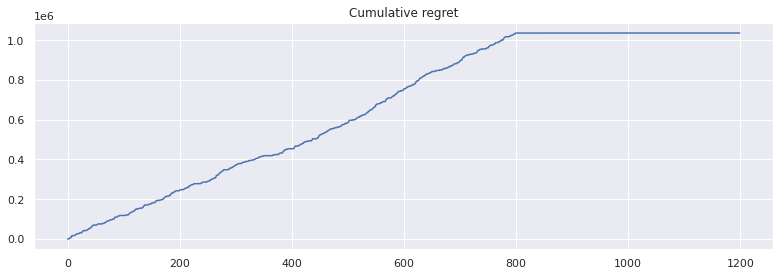

In [32]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(t, mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
    
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('neural_ucb_linear.pdf')

Text(0.5, 1.0, 'reward')

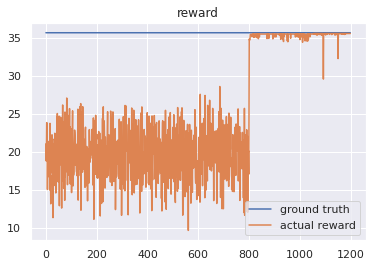

In [37]:
plt.plot([hwithoutconstraints(action)/(np.sqrt(args.card))**1]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

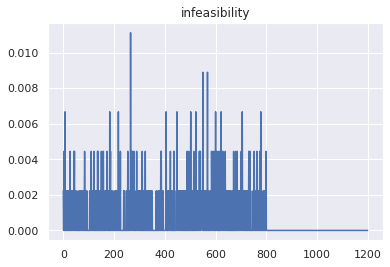

In [38]:
plt.plot(model.feasi)
plt.title('infeasibility')

Text(0.5, 1.0, 'reward')

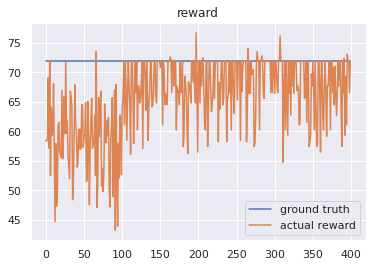

In [207]:
plt.plot([hwithoutconstraints(action)/(np.sqrt(args.card))]*T)
plt.plot(model.rewards_list)
plt.legend(['ground truth','actual reward'])
plt.title('reward')

Text(0.5, 1.0, 'infeasibility')

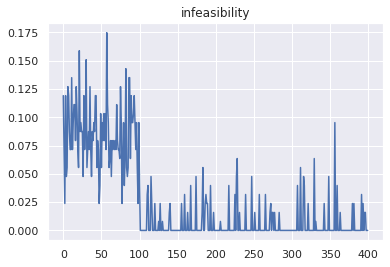

In [208]:
plt.plot(model.feasi)
plt.title('infeasibility')

In [209]:
hwithoutconstraints(action)/(np.sqrt(args.card))

71.87235975985492